In [104]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

説明

サンタンデールの使命は、人々や企業の繁栄を支援することです。私たちは、お客様がご自身の財務状況を理解し、どの商品やサービスが金銭的目標の達成に役立つかを見極めるための方法を常に模索しています。

データサイエンスチームは、機械学習アルゴリズムに絶えず挑戦し、世界のデータサイエンス・コミュニティと協力して、最も一般的な課題である「顧客は満足しているか」、「顧客満足度はどうか」といった二値分類問題を解決する新しい方法をより正確に特定できるように努めています。お客さまはこの商品を買ってくれるだろうか？お客さまはこのローンを払えますか？

このチャレンジでは、Kagglerに、取引金額に関係なく、どの顧客が将来的に特定の取引を行うかを特定するのを手伝ってもらいます。このコンペティションで提供されるデータは、私たちがこの問題を解決するために利用できる実際のデータと同じ構造を持っています。

あなたには、数値特徴変数、バイナリターゲット列、文字列ID_code列を含む匿名化されたデータセットが提供される。

タスクは、テストセットにおけるターゲットカラムの値を予測することである。

ファイルの説明
train.csv - 訓練セット．
test.csv - テストセット. テストセットには、スコアリングに含まれない行がいくつか含まれる。
sample_submission.csv - 正しいフォーマットのサンプル提出ファイル。

www.DeepL.com/Translator（無料版）で翻訳しました。

In [106]:
train.shape, test.shape

((200000, 202), (200000, 201))

In [107]:
train.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [108]:
test.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [110]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [111]:
train.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [112]:
test.describe()

var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.658737      -1.624244      10.707452       6.788214   
std         3.036716       4.040509       2.633888       2.052724   
min         0.188700     -15.043400       2.355200      -0.022400   
25%         8.442975      -4.700125       8.735600       5.230500   
50%        10.513800      -1.590500      10.560700       6.822350   
75%        12.739600       1.343400      12.495025       8.327600   
max        22.323400       9.385100      18.714100      13.142000   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.076399      -5.050558       5.415164      16.529143   
std         1.616456       7.869293       0.864686       3.424482   
min         5.484400     -27.767000       2.216400       5.713700   
25%         9.891075     -11.201400       4.772600      13.933900   
50%        11.099750      -4.834100       5.391600      16.422700   
75%        12.253400       0.942575       6.005800      19.094550   
max        16.037100      17.253700       8.302500      28.292800   

               var_8          var_9  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean        0.277135       7.569407  ...       3.189766       7.458269   
std         3.333375       1.231865  ...       4.551239       3.025189   
min        -9.956000       4.243300  ...     -14.093300      -2.407000   
25%        -2.303900       6.623800  ...      -0.095000       5.166500   
50%         0.372000       7.632000  ...       3.162400       7.379000   
75%         2.930025       8.584825  ...       6.336475       9.531100   
max         9.665500      11.003600  ...      20.359000      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.925944       3.322016      17.996967      -0.133657   
std         1.479966       3.995599       3.140652       1.429678   
min        -3.340900     -11.413100       9.382800      -4.911900   
25%         0.882975       0.587600      15.634775      -1.160700   
50%         1.892600       3.428500      17.977600      -0.162000   
75%         2.956000       6.174200      20.391725       0.837900   
max         8.005000      17.632600      27.947800       4.545400   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.290899       8.912428      15.869184      -3.246342  
std         5.446346       0.920904       3.008717      10.398589  
min       -13.944200       6.169600       6.584000     -39.457800  
25%        -1.948600       8.260075      13.847275     -11.124000  
50%         2.403600       8.892800      15.943400      -2.725950  
75%         6.519800       9.595900      18.045200       4.935400  
max        15.920700      12.275800      26.538400      27.907400  

[8 rows x 200 columns]

- 訓練データとテストデータの統計量はよく似ている

In [113]:
#訓練データ型をfloat64からfloat32に変換する
#計算コストを圧縮するため

float_col = [i for i in train.columns if train[i].dtype == 'float64']

train[float_col] = train[float_col].apply(lambda x: x.astype('float32'))

In [114]:
train.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193    var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.522699  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.430500   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.604200   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.034700  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.287600  -1.5121   

   var_196  var_197    var_198  var_199  
0   7.8784   8.5635  12.780300  -1.0914  
1   8.1267   8.7889  18.356001   1.9518  
2  -6.5213   8.2675  14.722200   0.3965  
3  -2.9275  10.2922  17.969700  -8.9996  
4   3.9267   9.5031  17.997400  -8.8104  

[5 rows x 202 columns]

In [115]:
#テストデータもfloat32に変換
test[float_col] = test[float_col].apply(lambda x: x.astype('float32'))

In [116]:
test.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

       var_7   var_8  ...  var_190  var_191  var_192  var_193    var_194  \
0  18.267500  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.711200   
1  18.631599 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.576500   
2  20.253700  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.981300   
3  20.566000  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.187400   
4  10.604800  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.554199   

   var_195  var_196  var_197    var_198    var_199  
0   2.4669   4.3654  10.7200  15.472200  -8.719700  
1   0.4773  -1.4852   9.8714  19.129299 -20.976000  
2   2.1281  -7.1086   7.0618  19.895599 -23.179399  
3   3.1656   3.9567   9.2295  13.016800  -4.210800  
4  -0.2860  -5.1612   7.2882  13.926000  -9.184600  

[5 rows x 201 columns]

In [117]:
count = []

desc = train.describe()

for i in desc.columns:
    if desc[i]['min'] < 0:
        count.append(i)
len(count)/201

0.6517412935323383

- 特徴量の65%がマイナスの値を持つ

In [118]:
#特徴量は0か1
train['target'].unique()

array([0, 1])

In [119]:
#1:取引を行う、0：取引を行わない
#訓練データの約10%が１の模様
print(train['target'].value_counts())
print(train['target'].value_counts()/train['target'].value_counts().sum())

0    179902
1     20098
Name: target, dtype: int64
0    0.89951
1    0.10049
Name: target, dtype: float64


In [120]:
#特徴量の傾向を確認する
vares = [i for i in train.columns if train[i].dtype != 'object' and i != 'target']

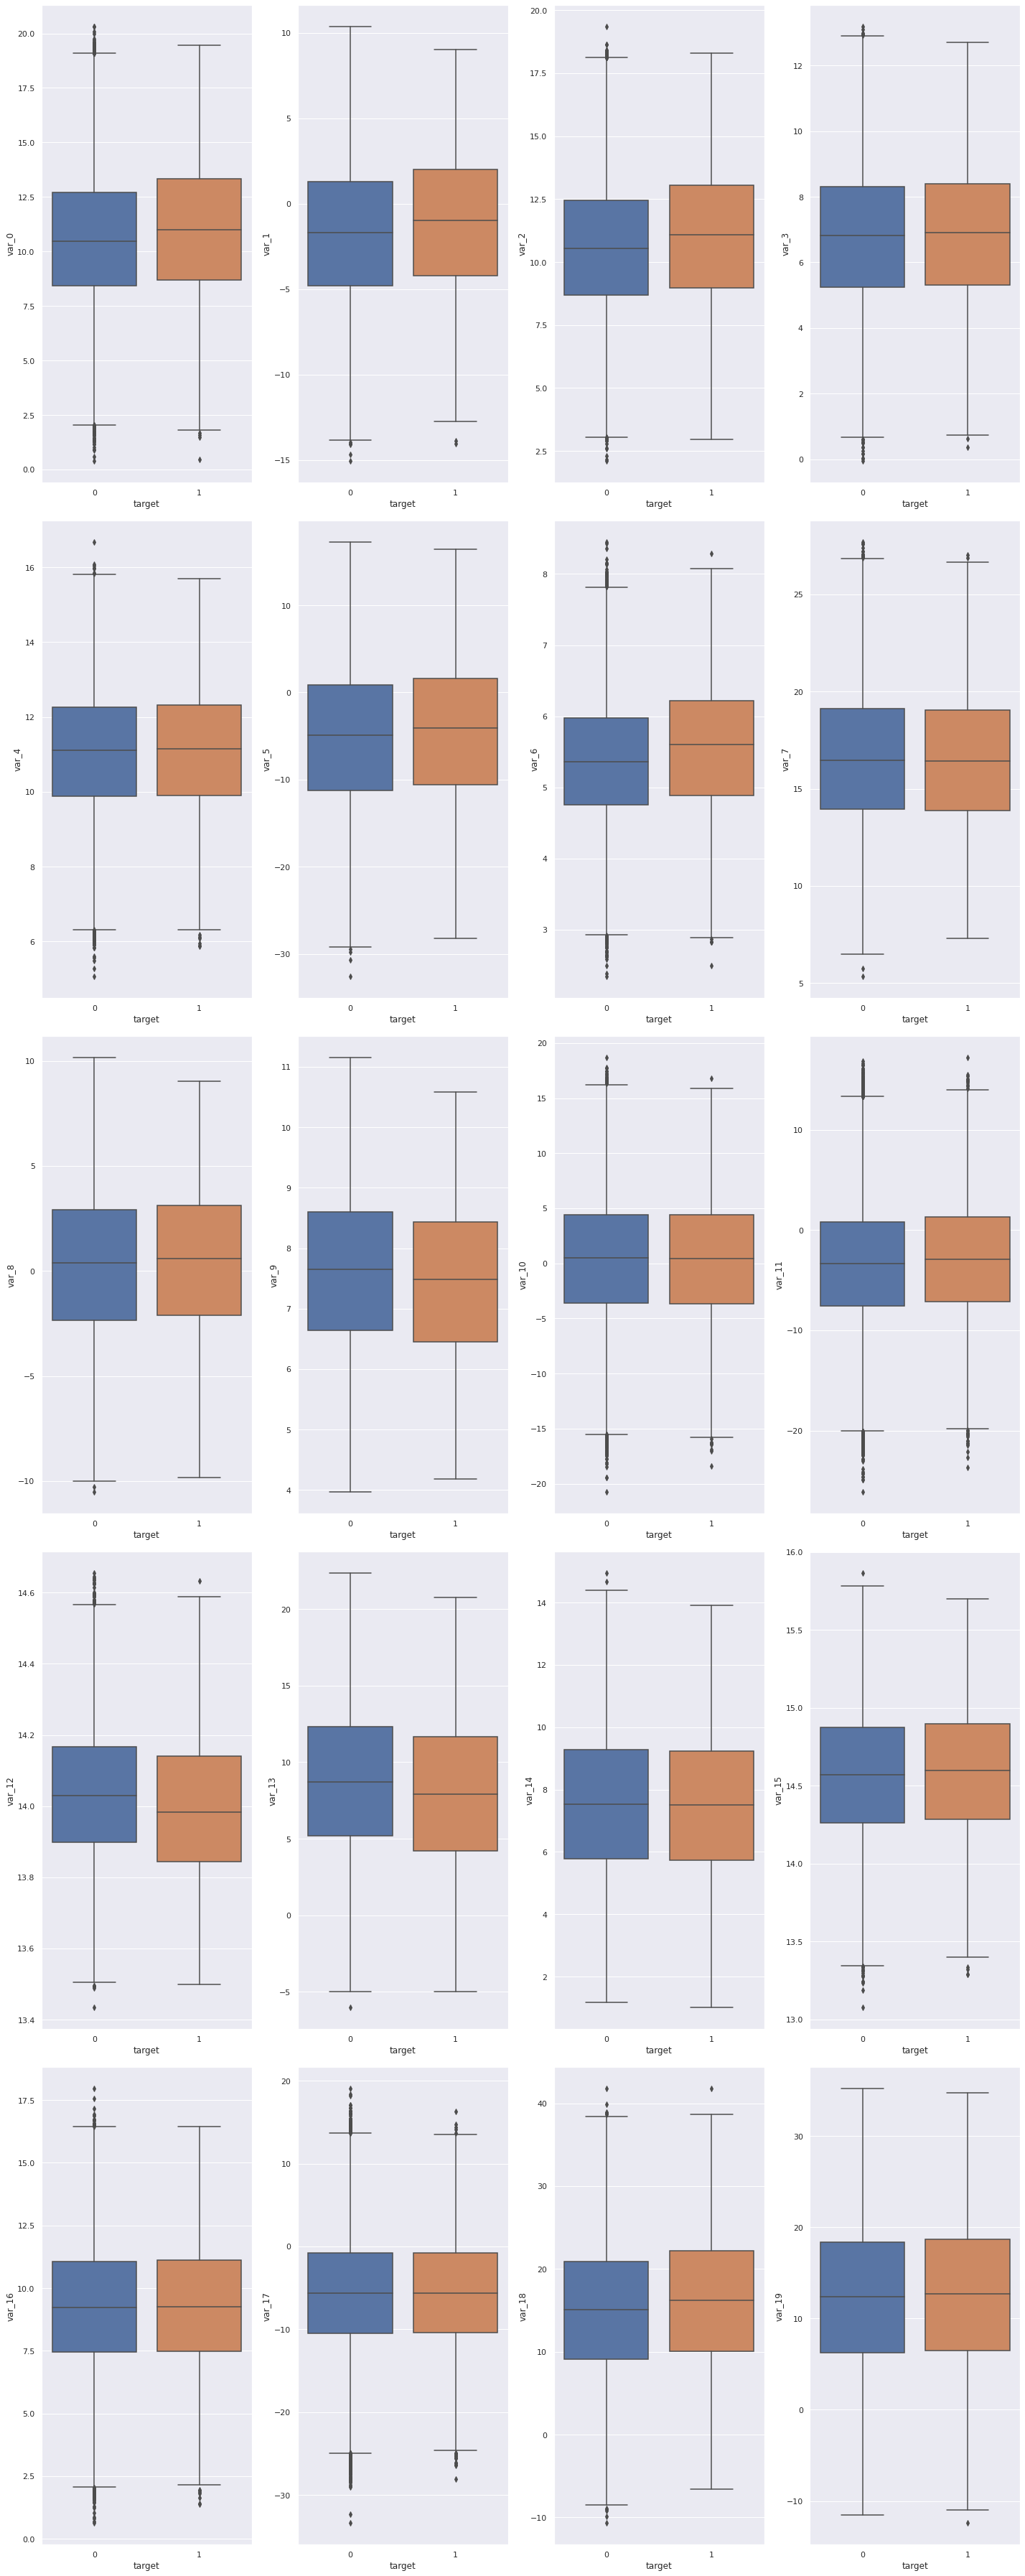

In [121]:
#箱ひげ図
fig, axes = plt.subplots(5, 4, figsize=(20, 50))

for v, ax in zip(vares[:20], axes.ravel()):
    sns.boxplot(x=train['target'], y=train[v], ax=ax)
    ax.set_xlabel('target')
    ax.set_ylabel(v)
plt.tight_layout()
plt.show()

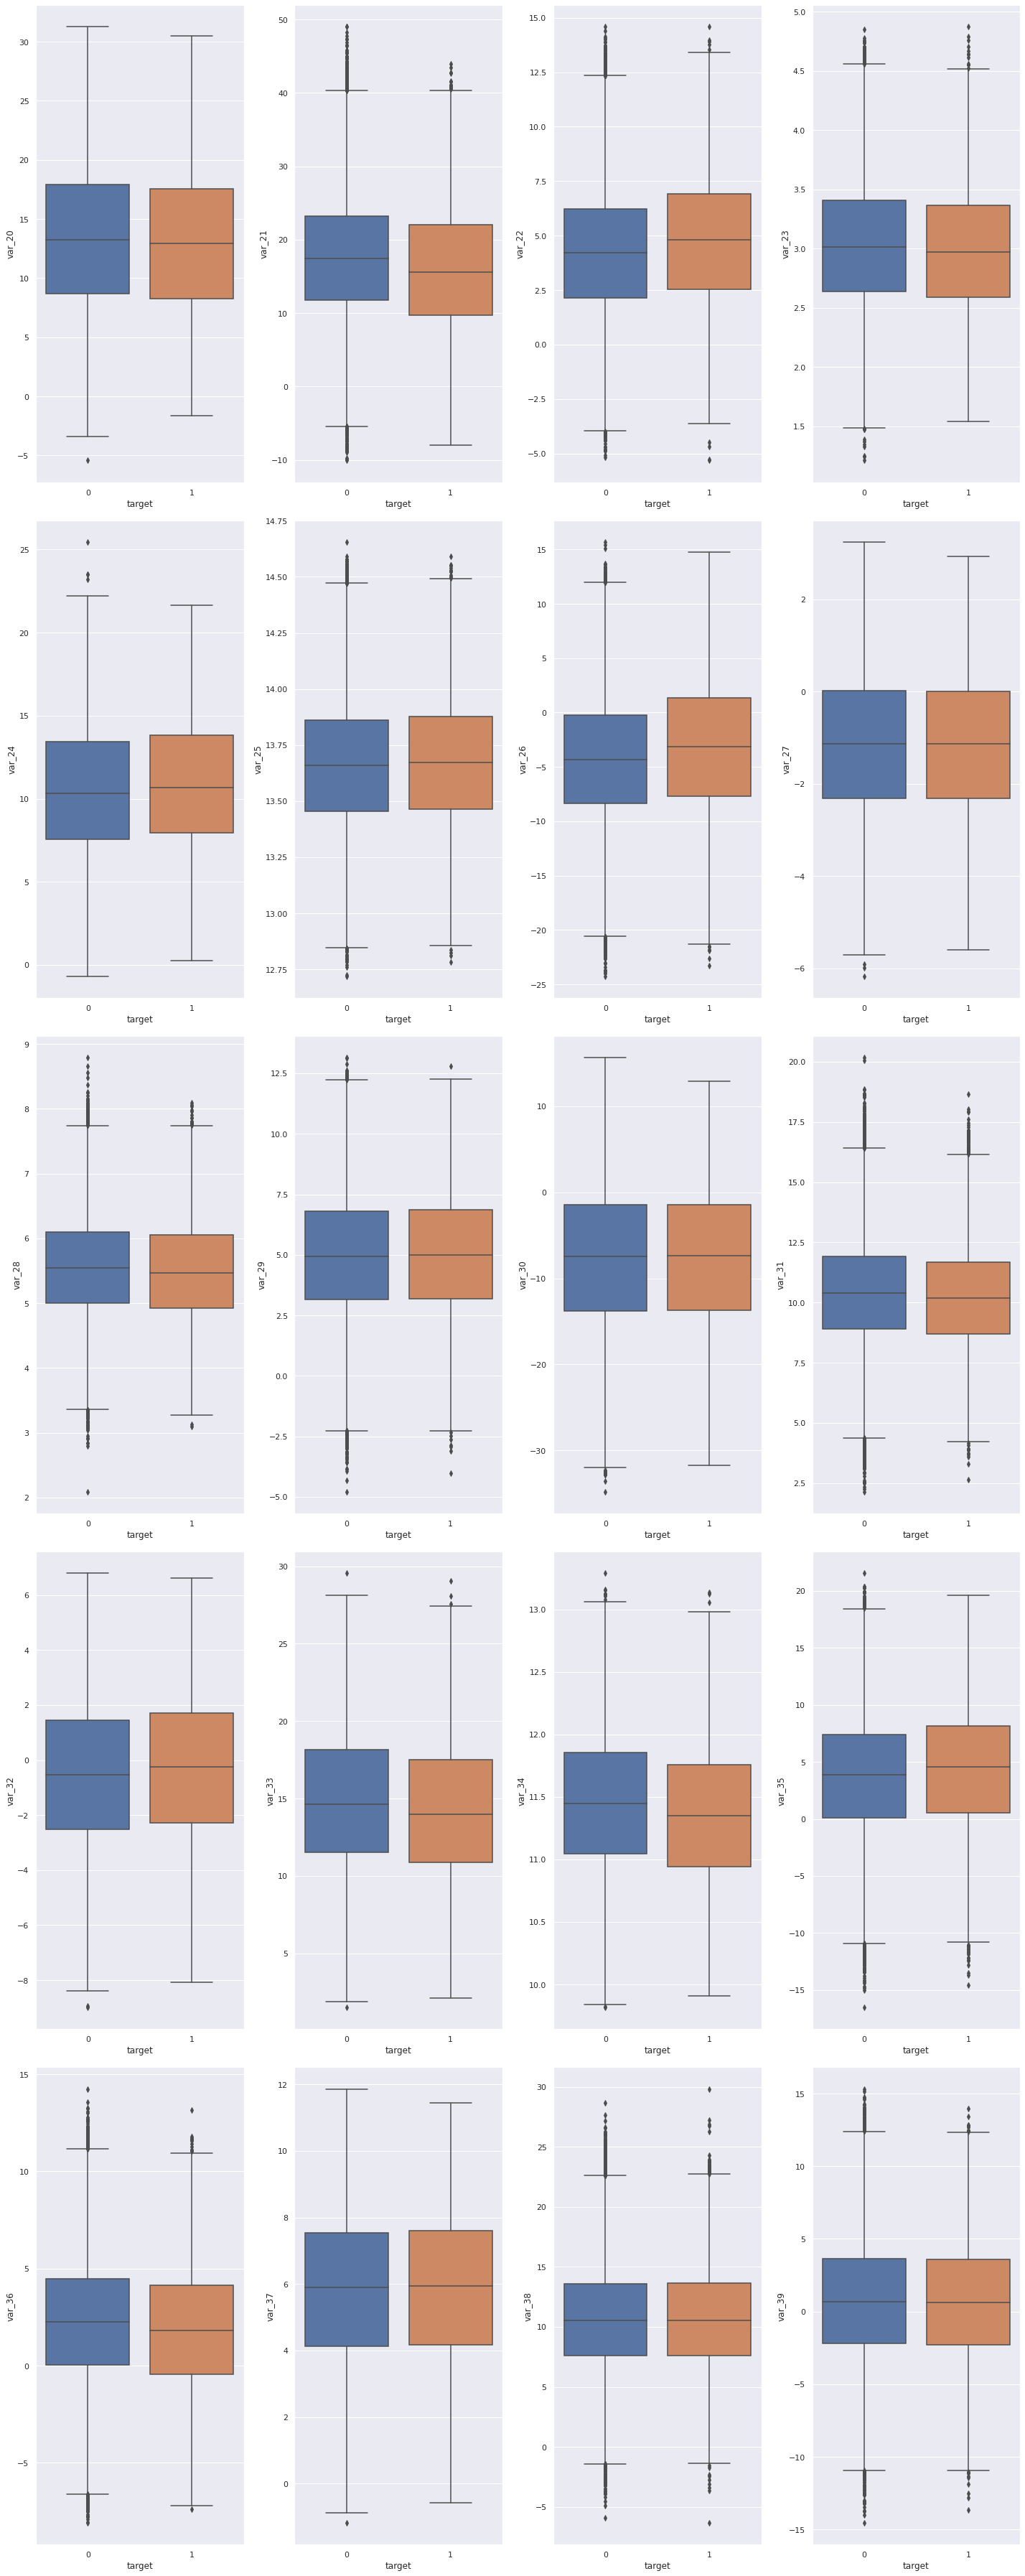

In [122]:
#箱ひげ図
fig, axes = plt.subplots(5, 4, figsize=(20, 50))

for v, ax in zip(vares[20:40], axes.ravel()):
    sns.boxplot(x=train['target'], y=train[v], ax=ax)
    ax.set_xlabel('target')
    ax.set_ylabel(v)
plt.tight_layout()
plt.show()

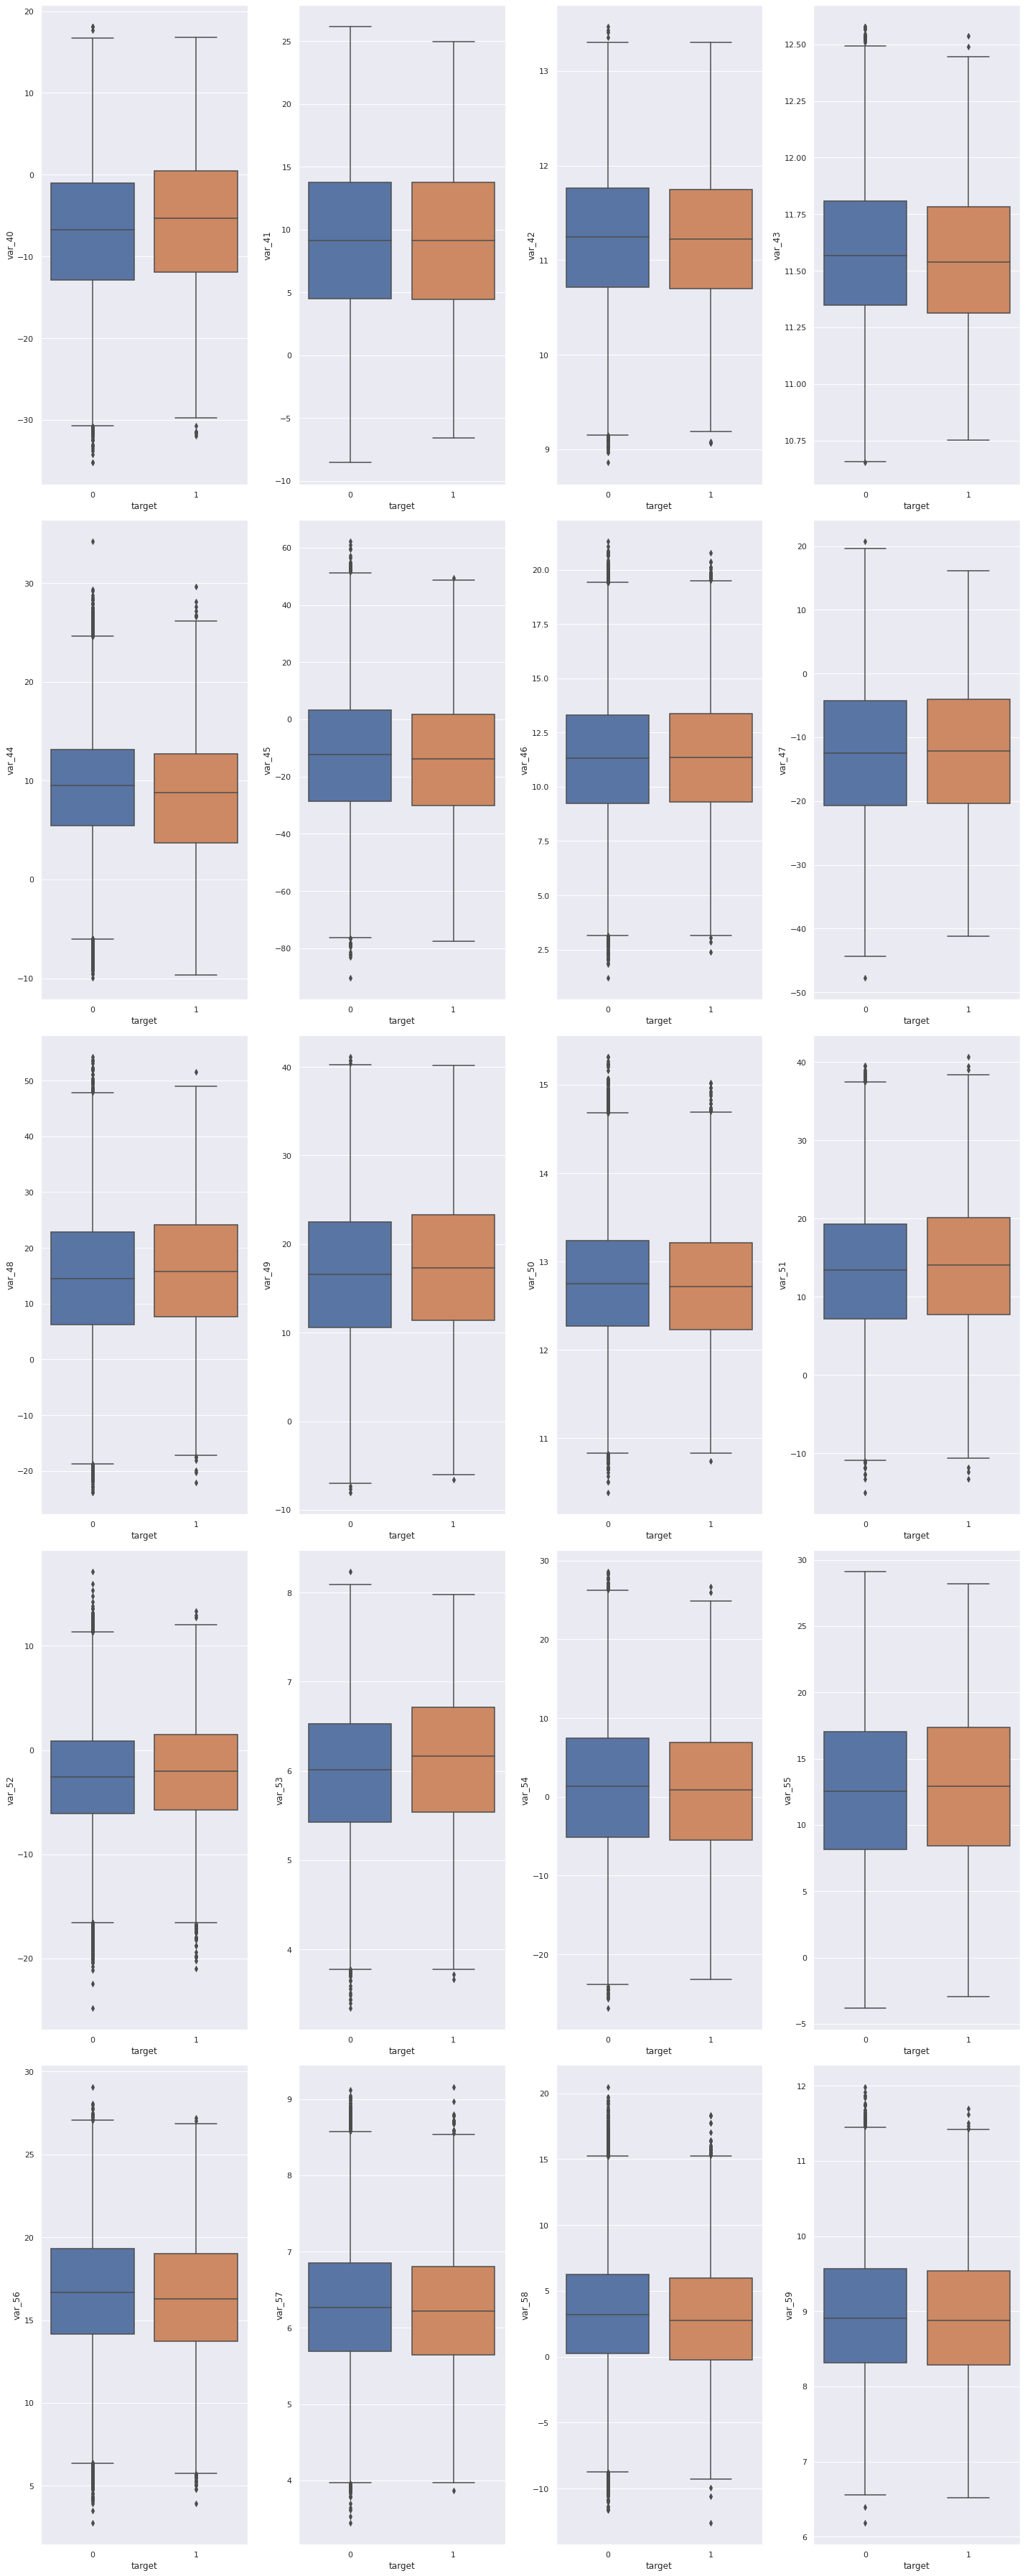

In [123]:
# 箱ひげ図
fig, axes = plt.subplots(5, 4, figsize=(20, 50))

for v, ax in zip(vares[40:60], axes.ravel()):
    sns.boxplot(x=train['target'], y=train[v], ax=ax)
    ax.set_xlabel('target')
    ax.set_ylabel(v)
plt.tight_layout()
plt.show()

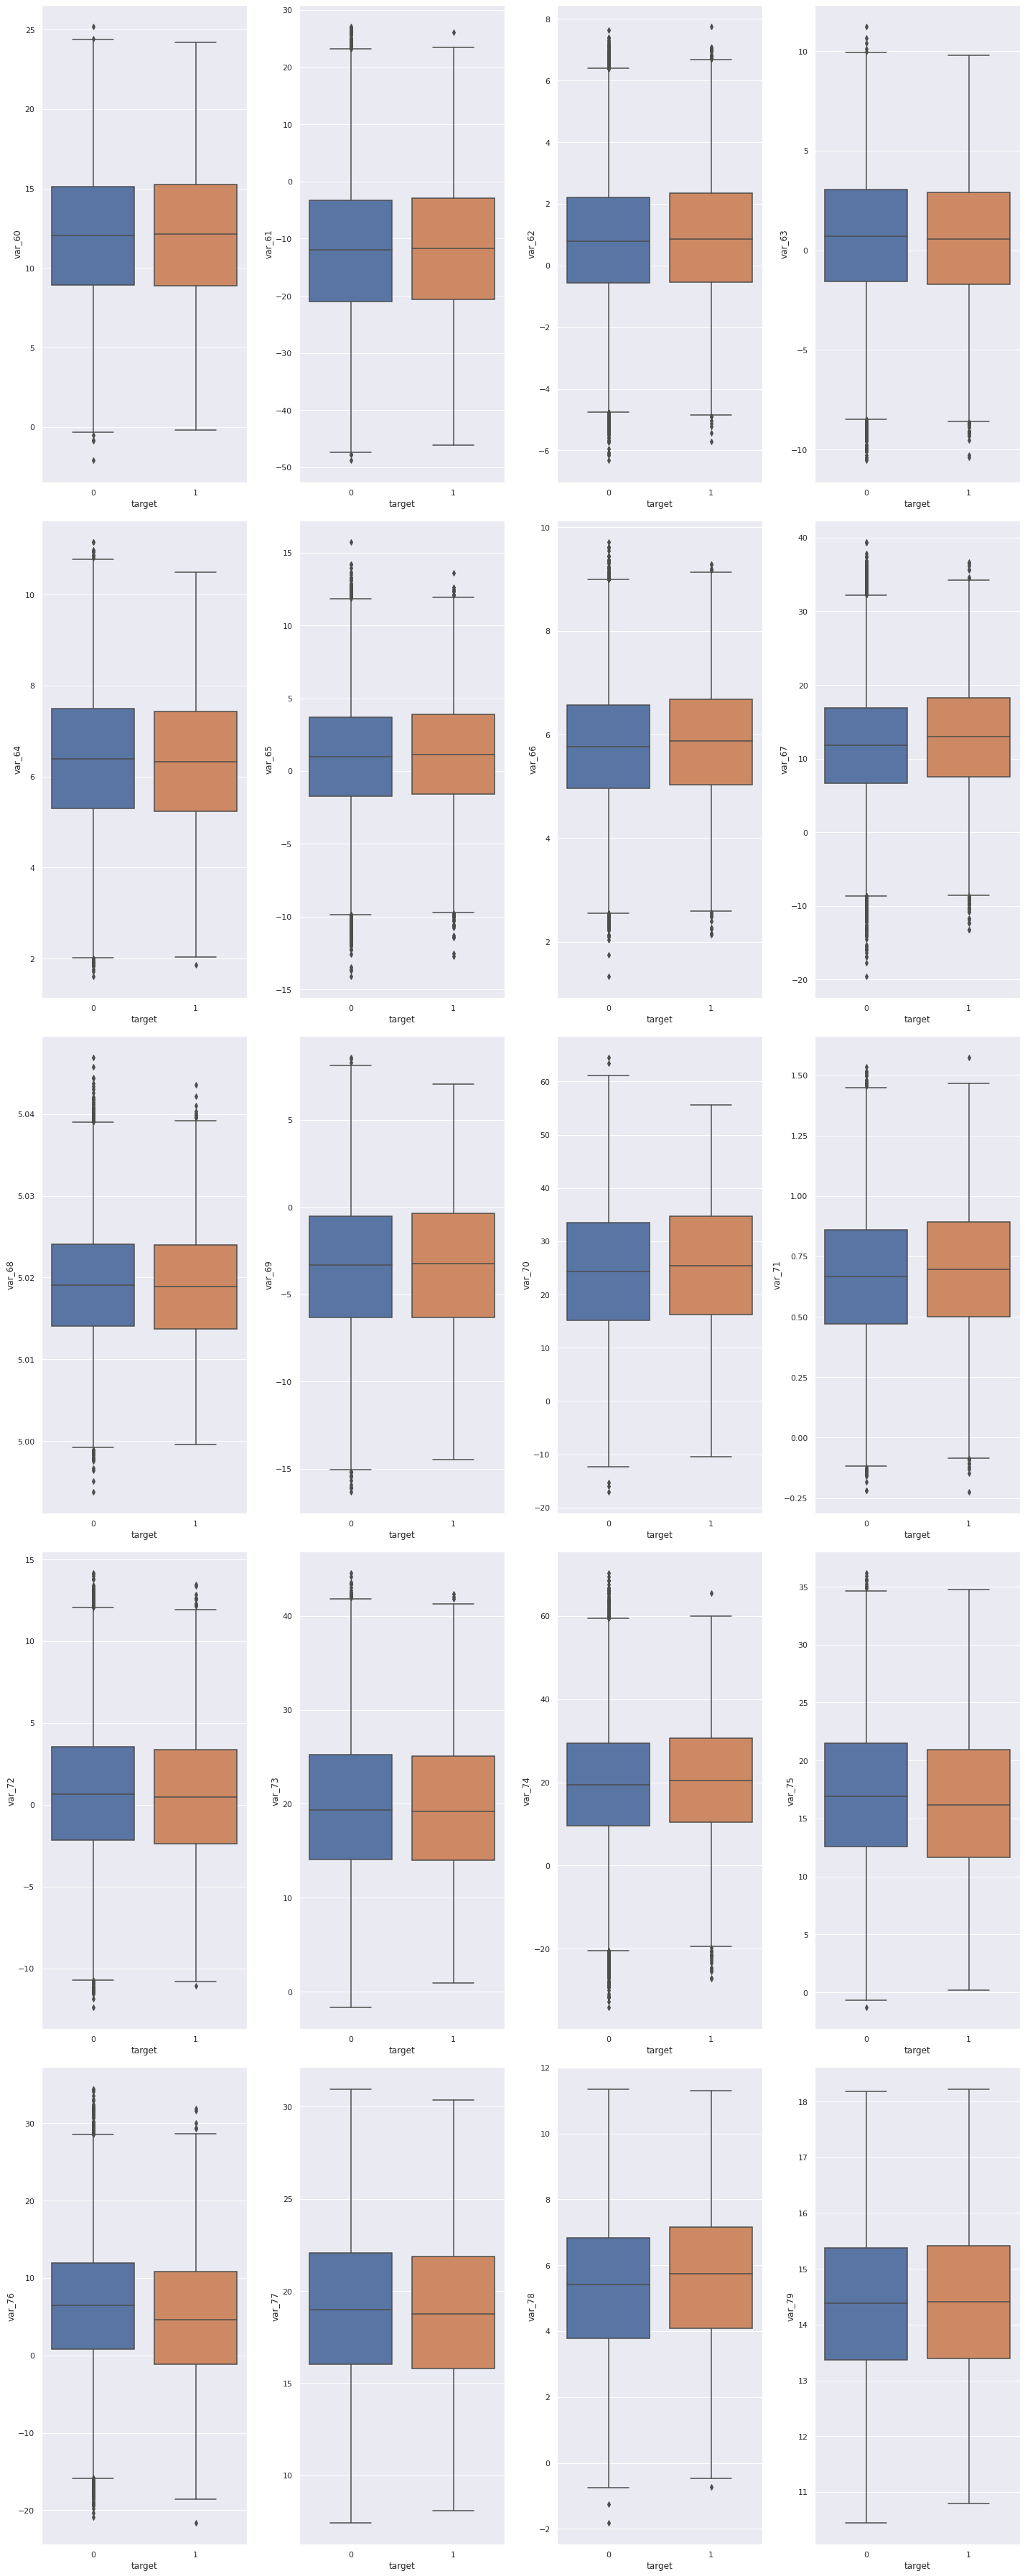

In [124]:
# 箱ひげ図
fig, axes = plt.subplots(5, 4, figsize=(20, 50))

for v, ax in zip(vares[60:80], axes.ravel()):
    sns.boxplot(x=train['target'], y=train[v], ax=ax)
    ax.set_xlabel('target')
    ax.set_ylabel(v)
plt.tight_layout()
plt.show()

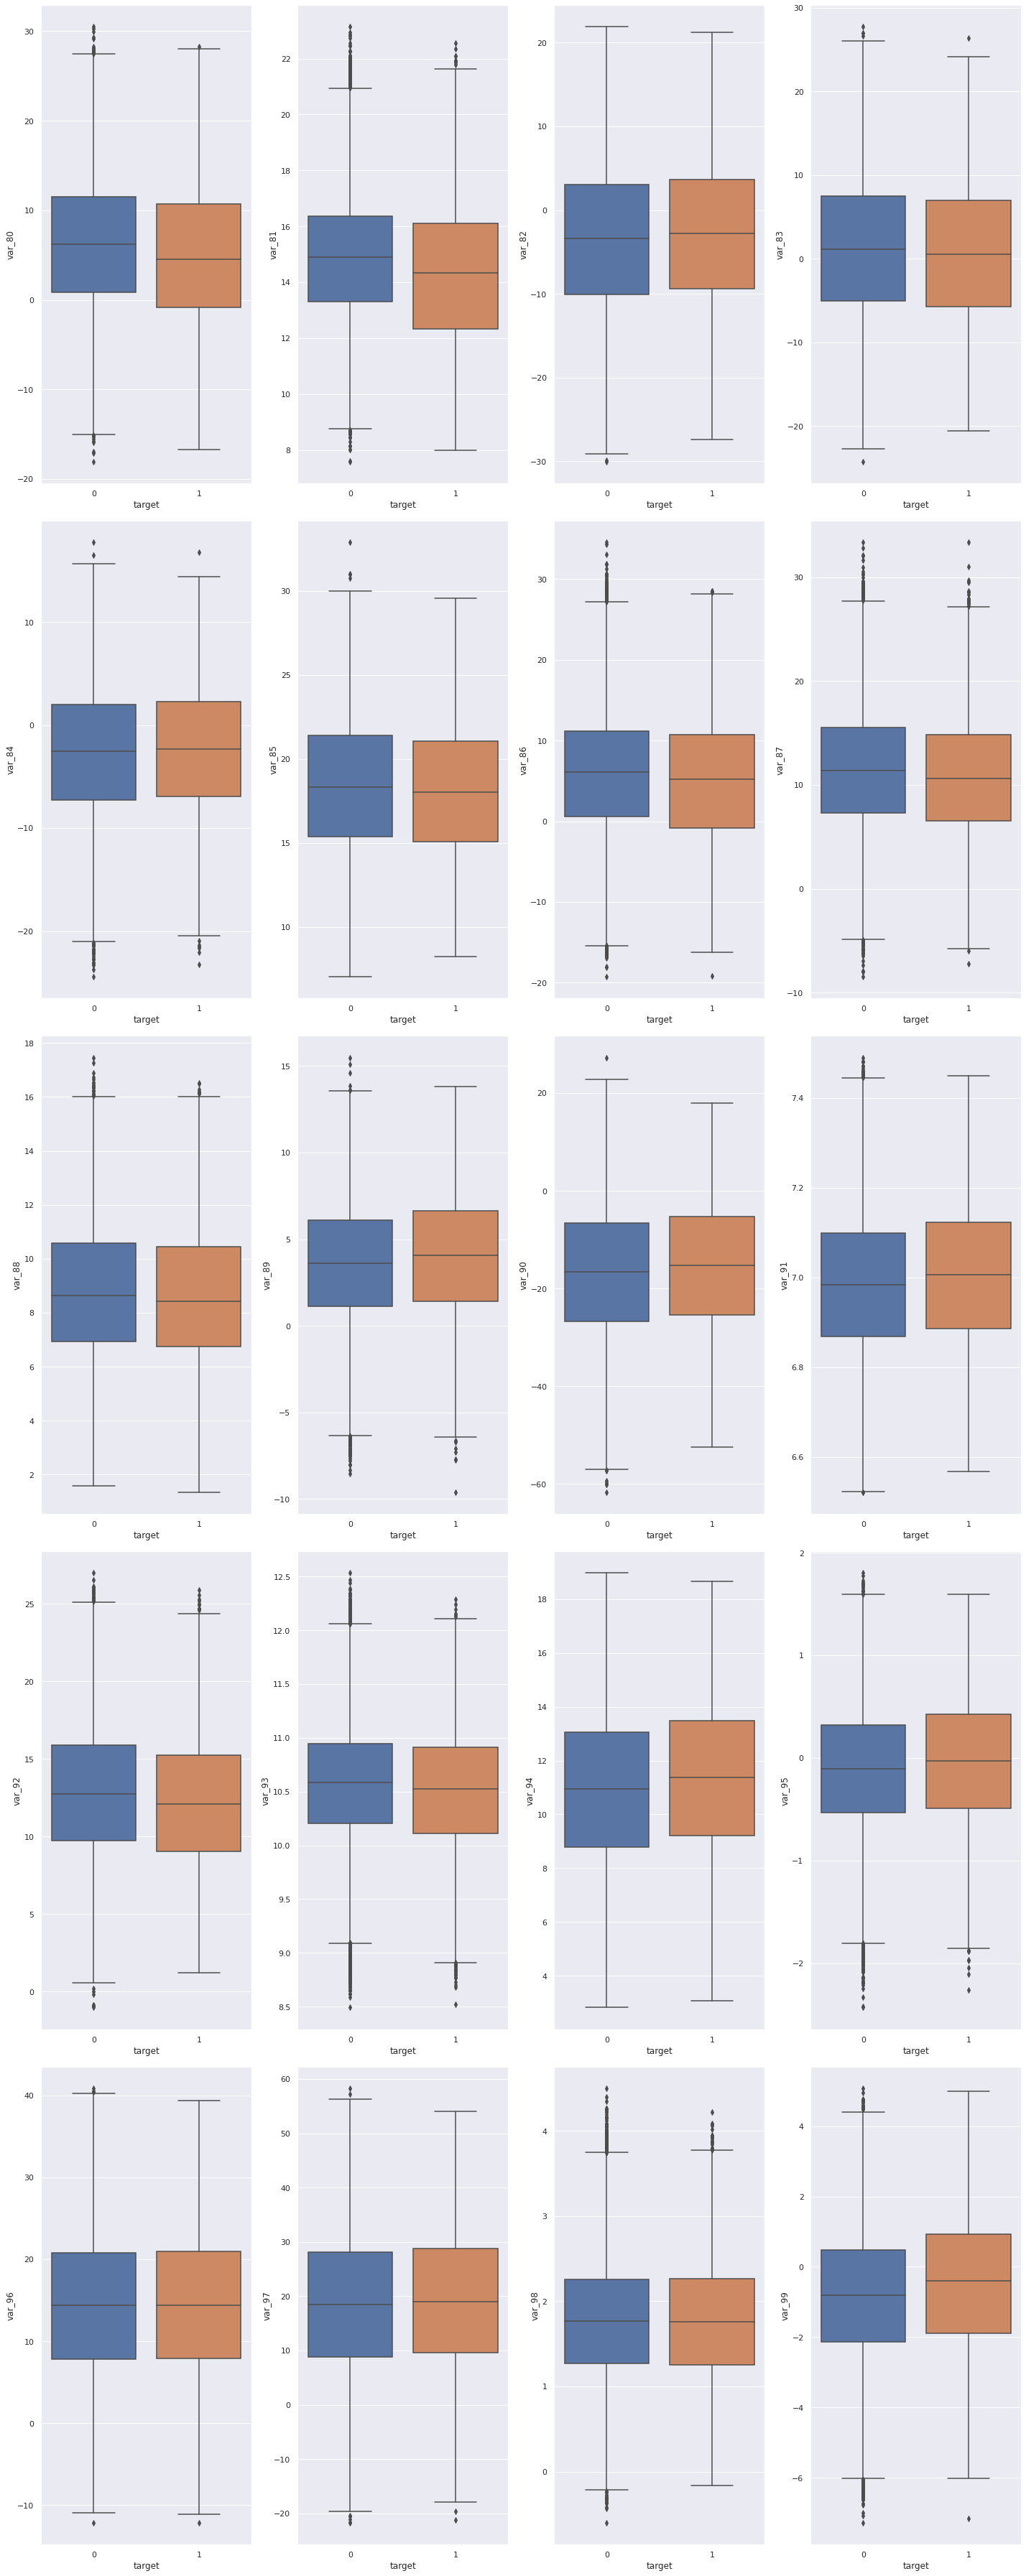

In [125]:
# 箱ひげ図
fig, axes = plt.subplots(5, 4, figsize=(20, 50))

for v, ax in zip(vares[80:100], axes.ravel()):
    sns.boxplot(x=train['target'], y=train[v], ax=ax)
    ax.set_xlabel('target')
    ax.set_ylabel(v)
plt.tight_layout()
plt.show()

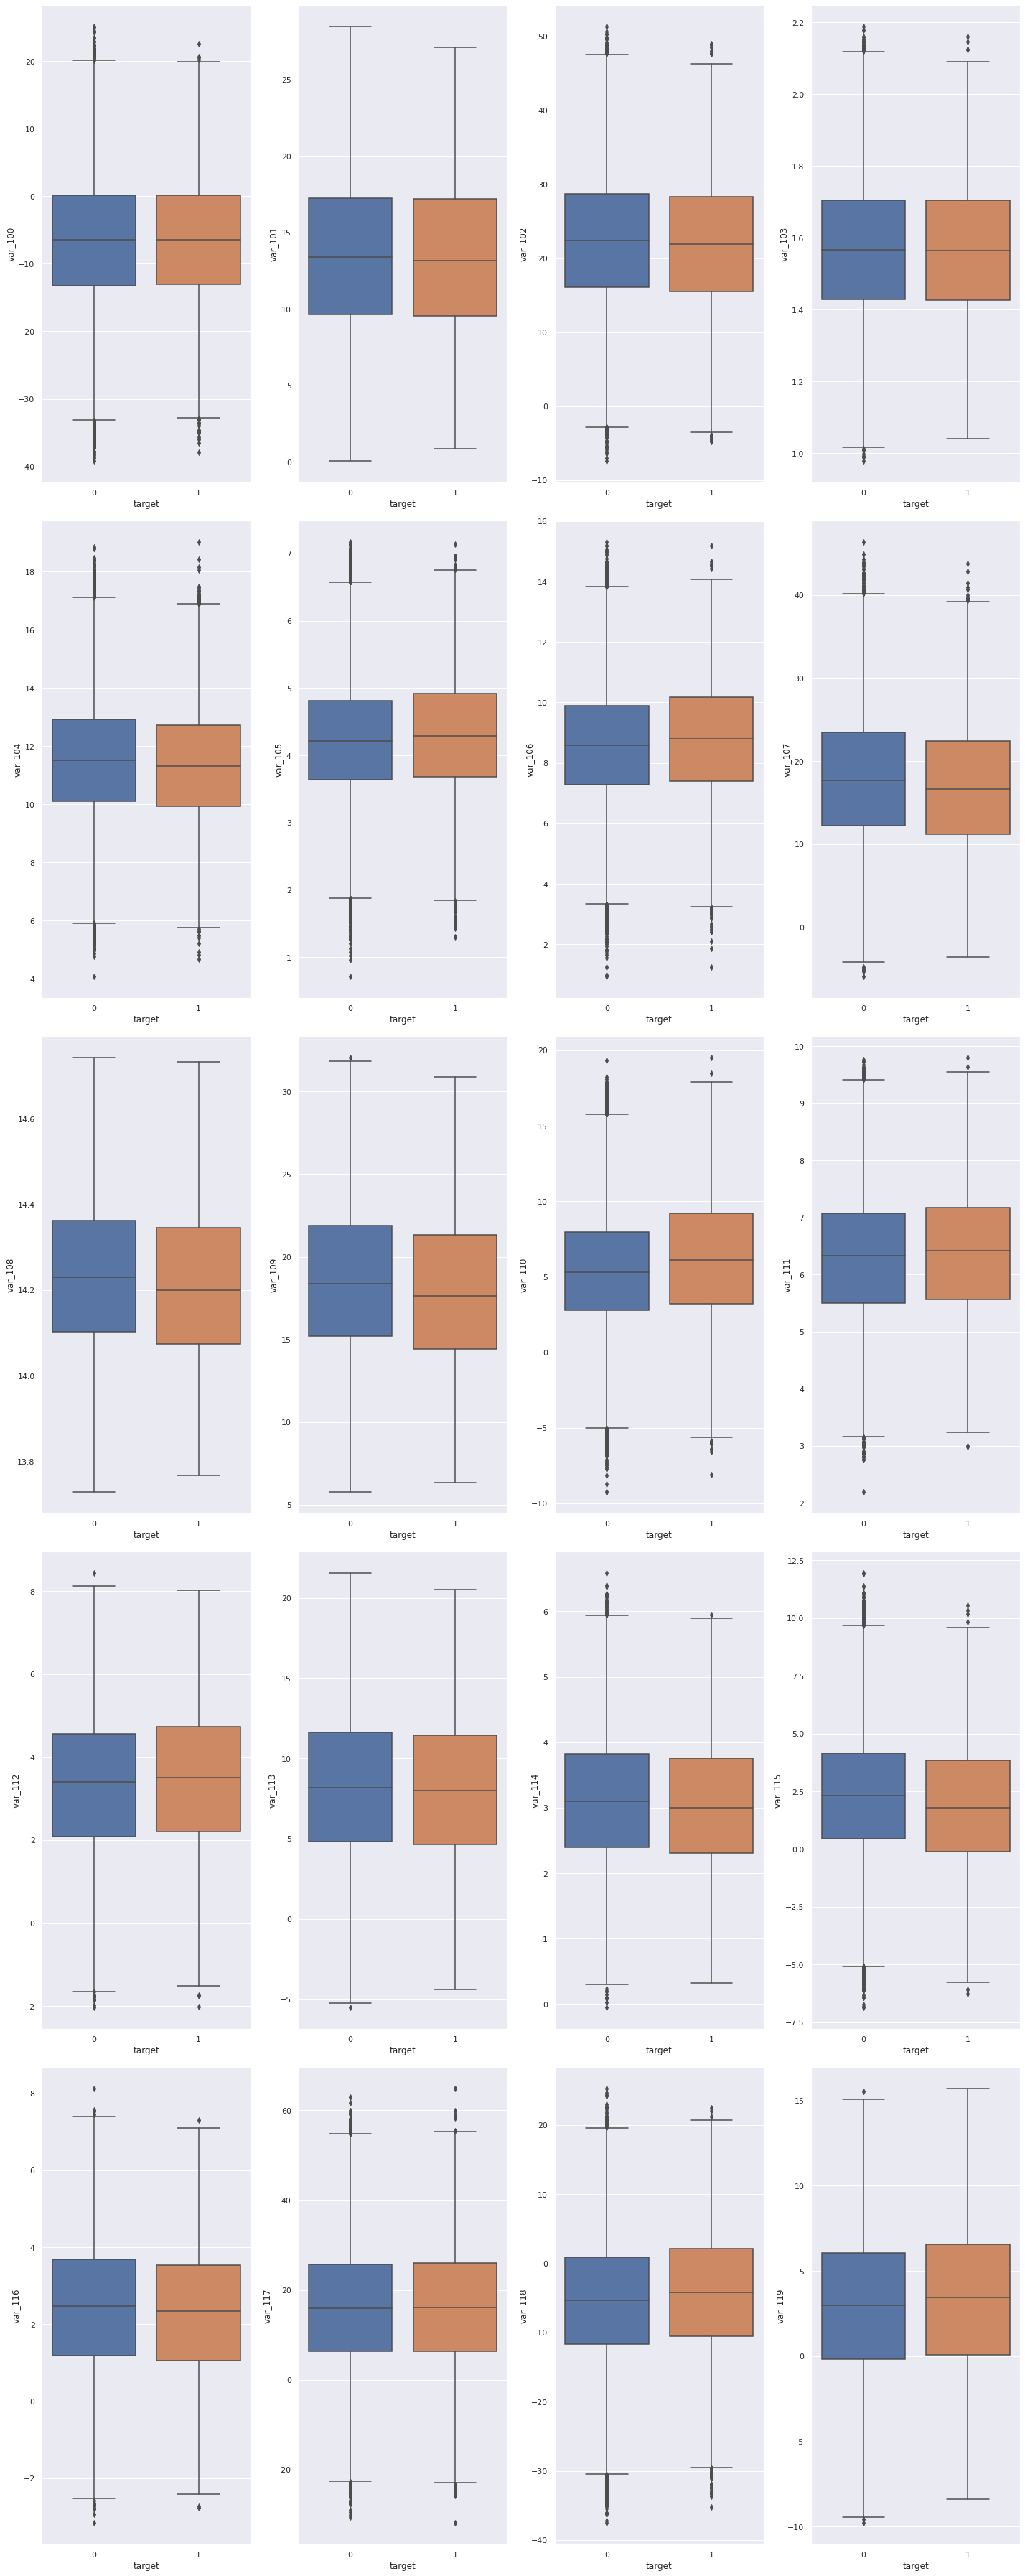

In [126]:
# 箱ひげ図
fig, axes = plt.subplots(5, 4, figsize=(20, 50))

for v, ax in zip(vares[100:120], axes.ravel()):
    sns.boxplot(x=train['target'], y=train[v], ax=ax)
    ax.set_xlabel('target')
    ax.set_ylabel(v)
plt.tight_layout()
plt.show()

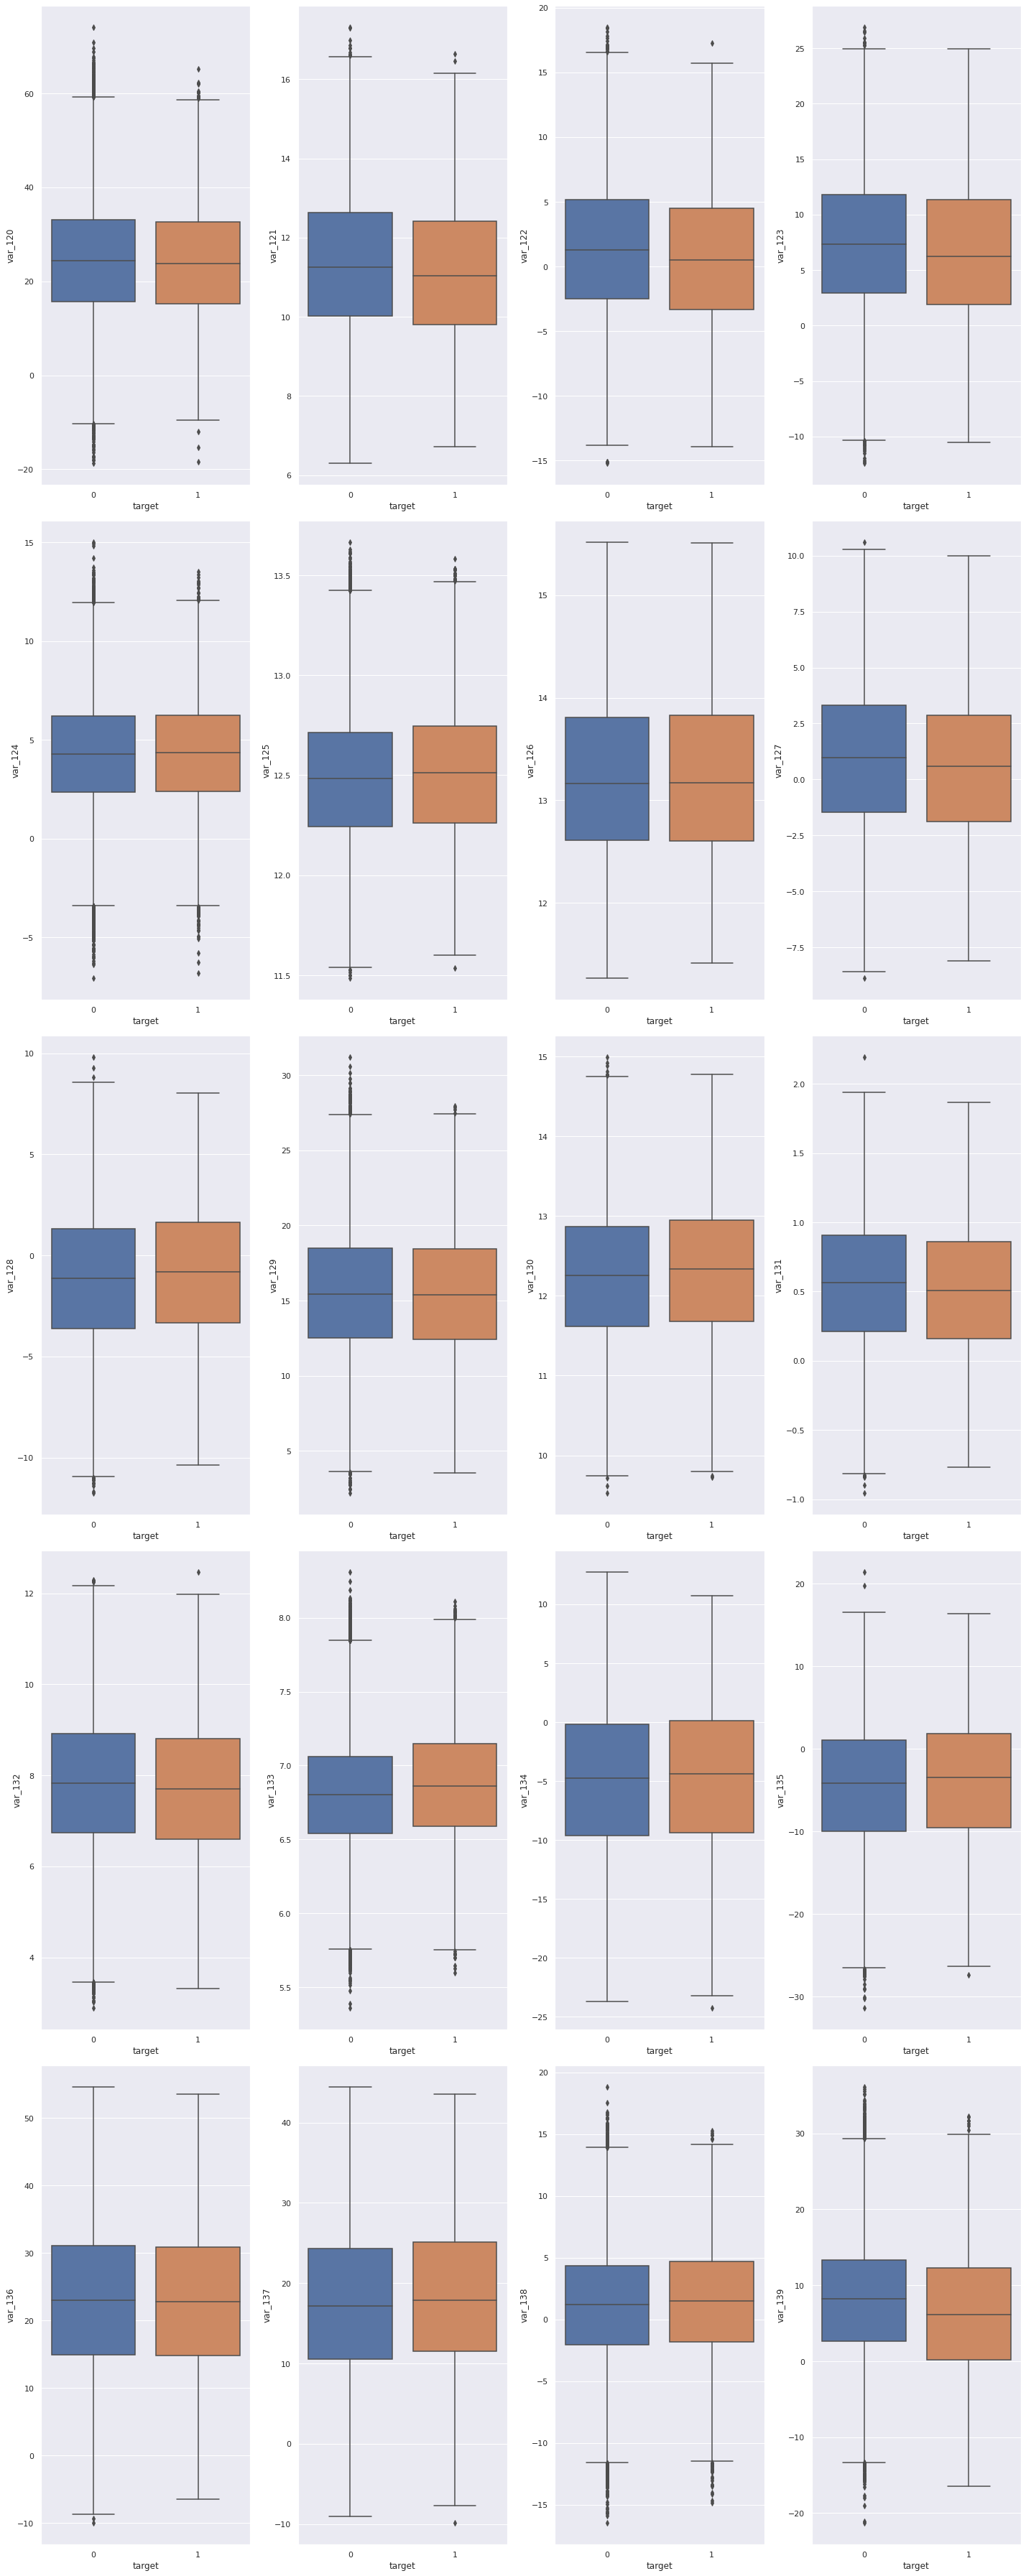

In [127]:
# 箱ひげ図
fig, axes = plt.subplots(5, 4, figsize=(20, 50))

for v, ax in zip(vares[120:140], axes.ravel()):
    sns.boxplot(x=train['target'], y=train[v], ax=ax)
    ax.set_xlabel('target')
    ax.set_ylabel(v)
plt.tight_layout()
plt.show()

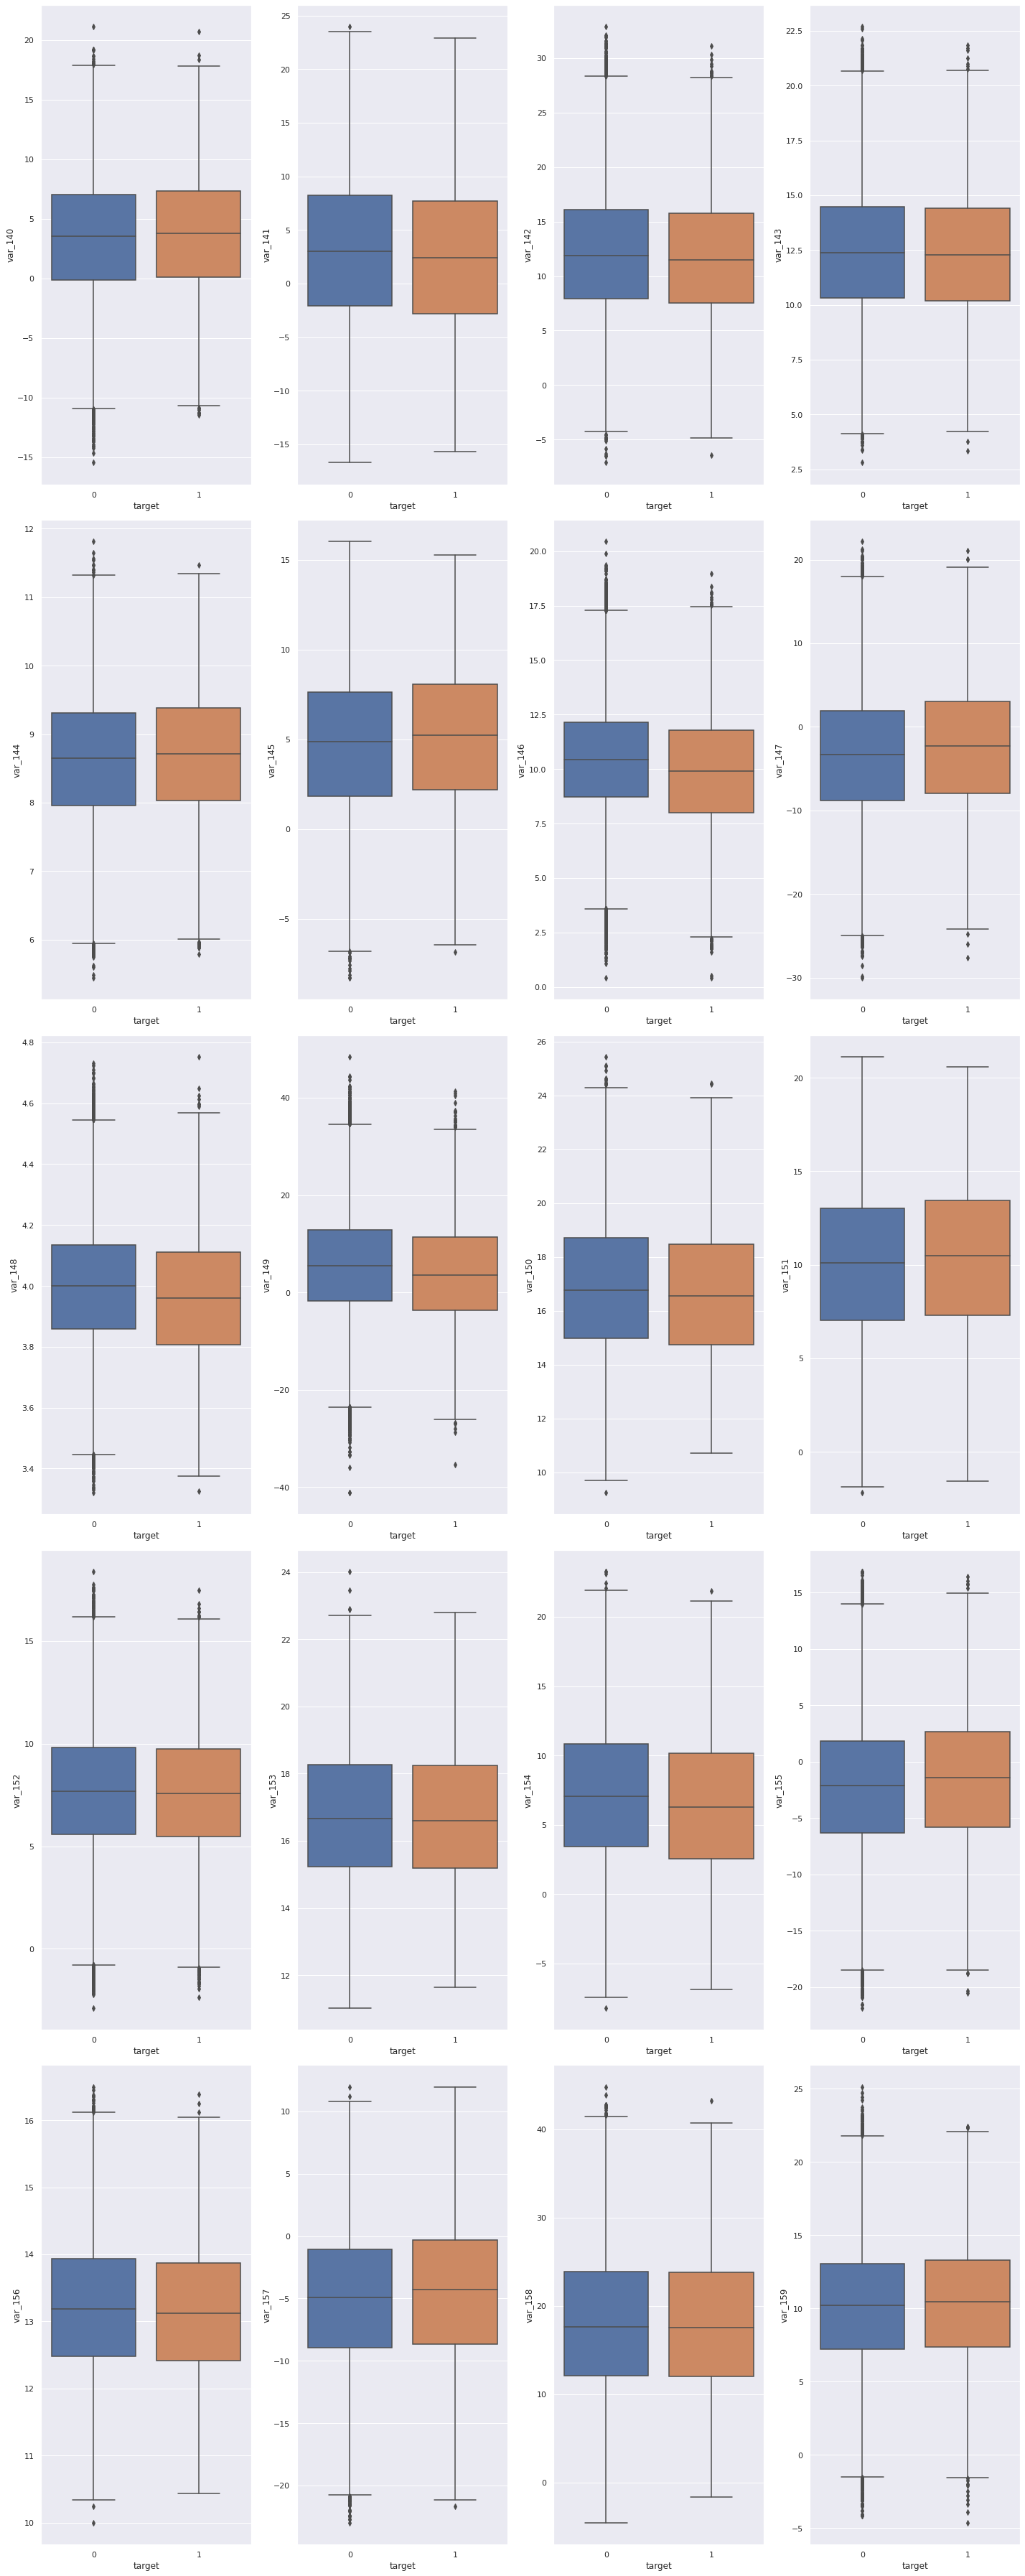

In [128]:
# 箱ひげ図
fig, axes = plt.subplots(5, 4, figsize=(20, 50))

for v, ax in zip(vares[140:160], axes.ravel()):
    sns.boxplot(x=train['target'], y=train[v], ax=ax)
    ax.set_xlabel('target')
    ax.set_ylabel(v)
plt.tight_layout()
plt.show()

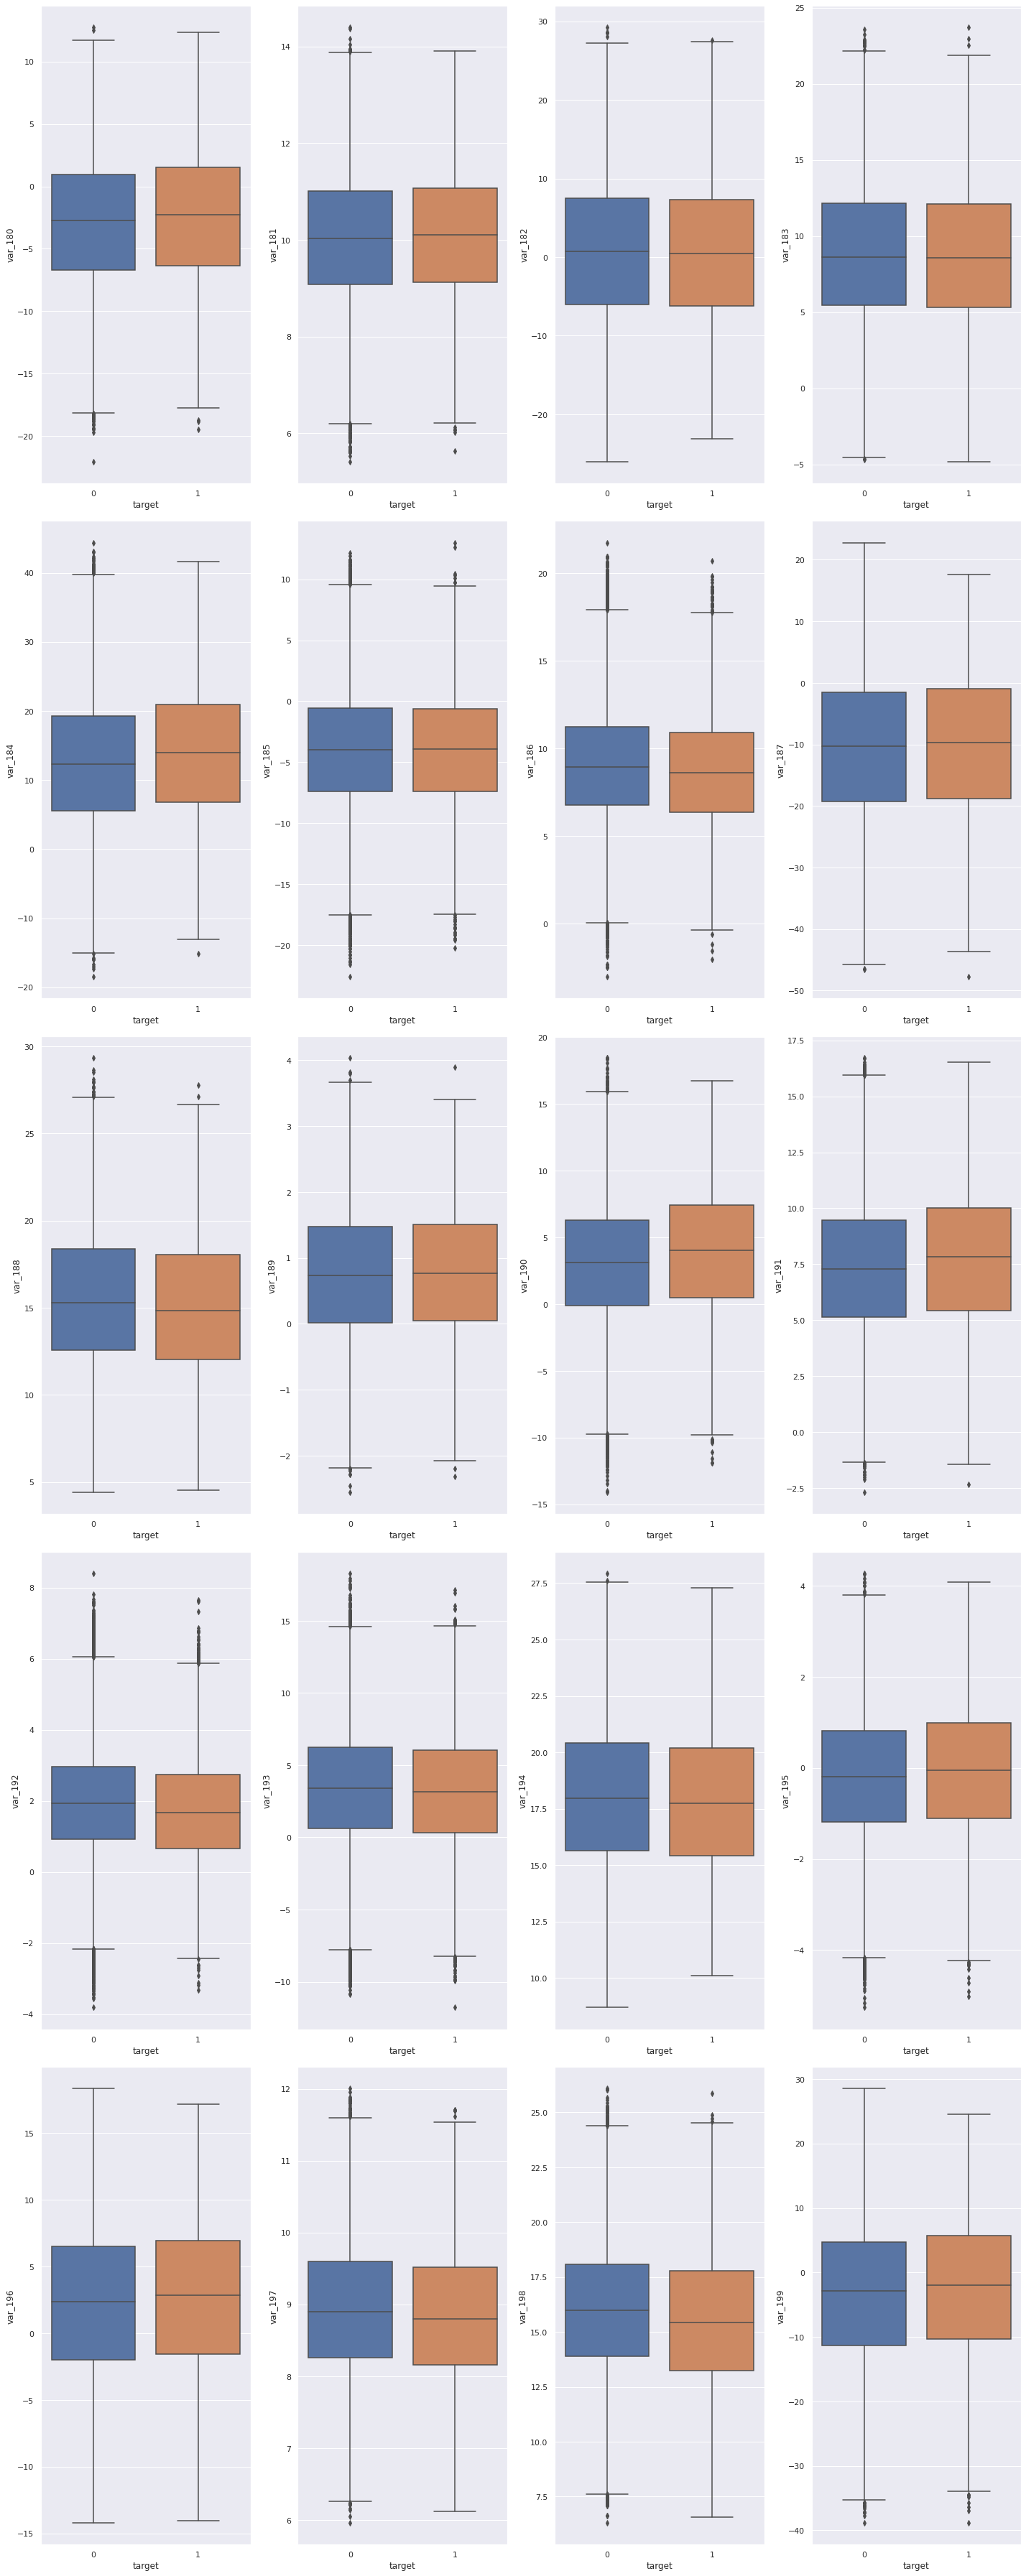

In [129]:
# 箱ひげ図
fig, axes = plt.subplots(5, 4, figsize=(20, 50))

for v, ax in zip(vares[180:200], axes.ravel()):
    sns.boxplot(x=train['target'], y=train[v], ax=ax)
    ax.set_xlabel('target')
    ax.set_ylabel(v)
plt.tight_layout()
plt.show()

- 箱ひげ図から、targetが1でも0でも第1四分位から第3四分位のおおよそ中間に第2四分位(中央値)がある。
- 第1～第3四分位の中でデータの集中個所はなさそう
- データによって、target=0よりもtarget=1の中央値が低かったり高かったりするものがある
- また、target=0と1で中央値にあまり差がなく、第1~第3四分位範囲がおおよそ同じデータも複数みられる
- 実際のデータ分布について、target=1と0でヒストグラムを作り比較する

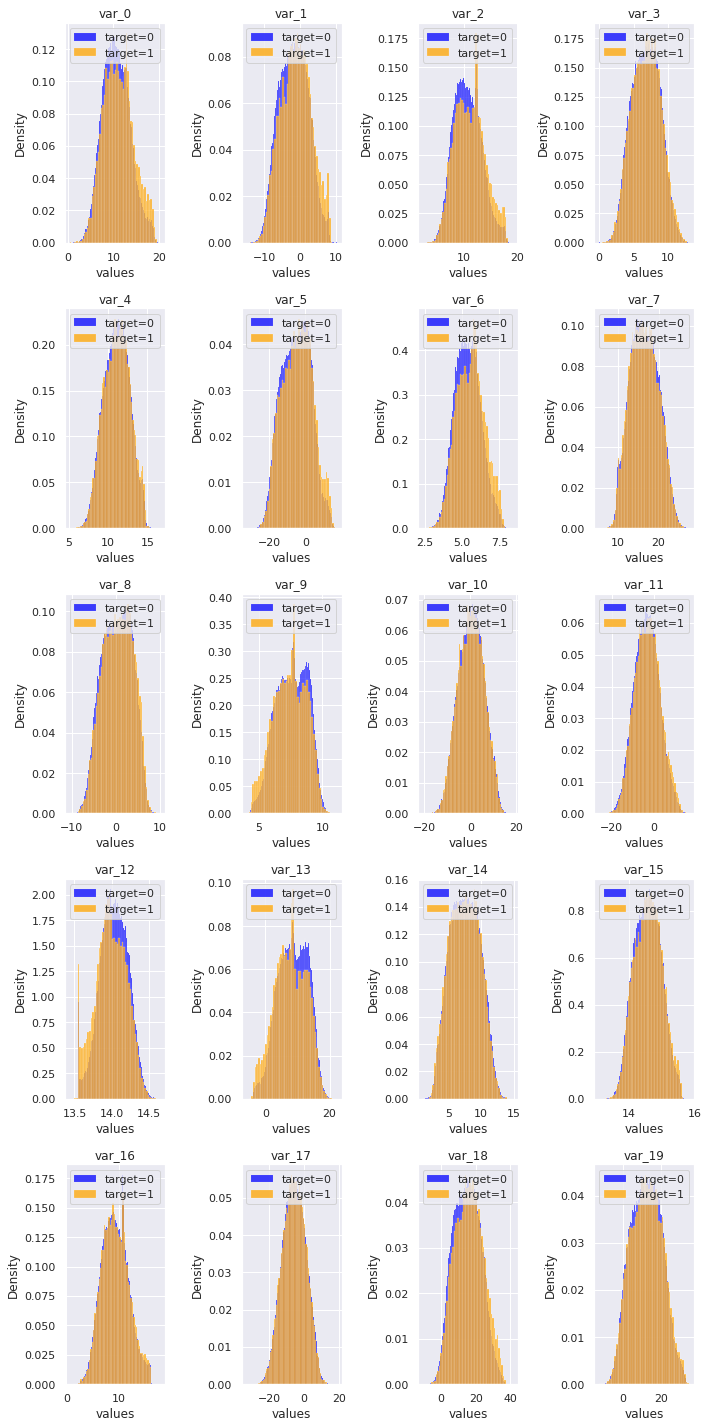

In [130]:
#ヒストグラムの比較
fig, axes = plt.subplots(5, 4, figsize=(10, 20))

targets = [0, 1]
color = ['blue', 'orange']

for v, ax in zip(vares[:20], axes.ravel()):
    for i in targets:
        sns.histplot(train[train['target'] == i], x=v, stat='density',
                     label='target='+str(i), color=color[i], ax=ax)
        ax.set_xlabel('values')
        ax.set_title(v)
    ax.legend()
plt.tight_layout()
plt.show()

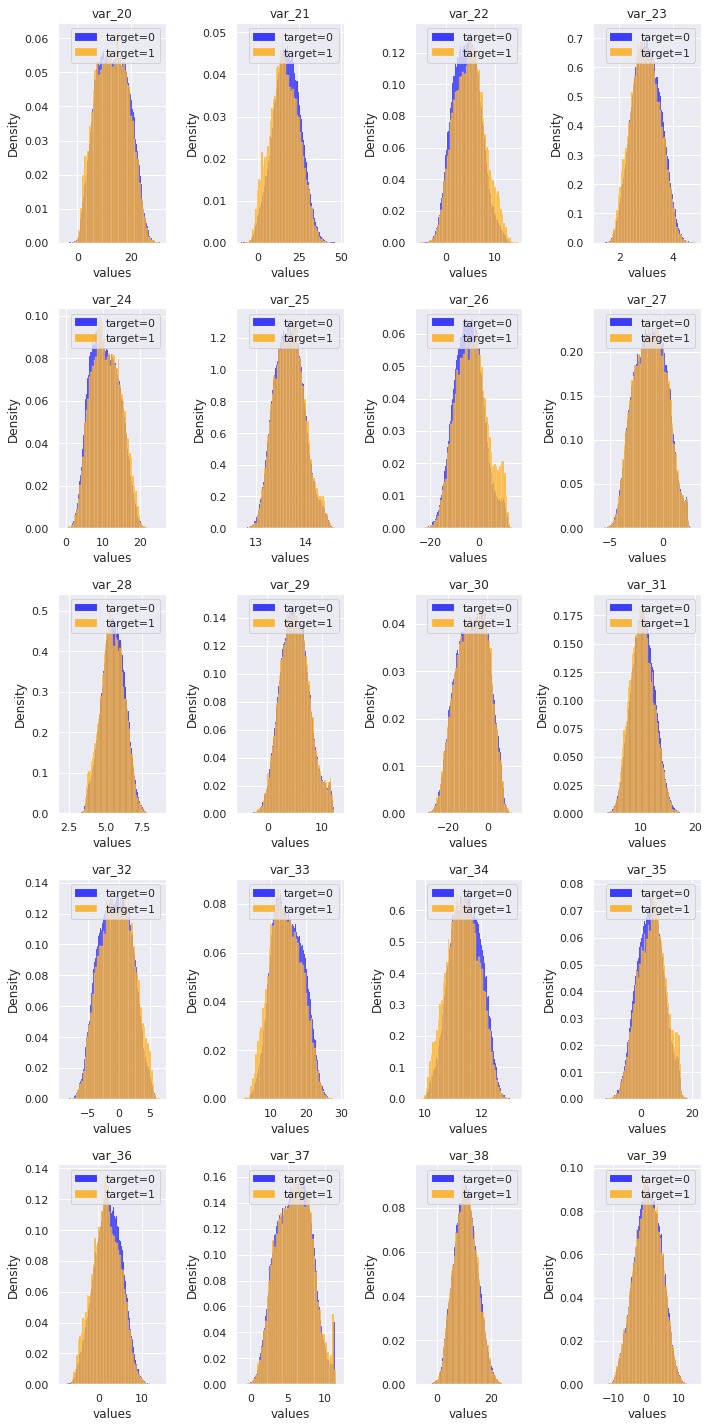

In [131]:
#ヒストグラムの比較
fig, axes = plt.subplots(5, 4, figsize=(10, 20))

targets = [0, 1]
color = ['blue', 'orange']

for v, ax in zip(vares[20:40], axes.ravel()):
    for i in targets:
        sns.histplot(train[train['target'] == i], x=v, stat='density',
                     label='target='+str(i), color=color[i], ax=ax)
        ax.set_xlabel('values')
        ax.set_title(v)
    ax.legend()
plt.tight_layout()
plt.show()

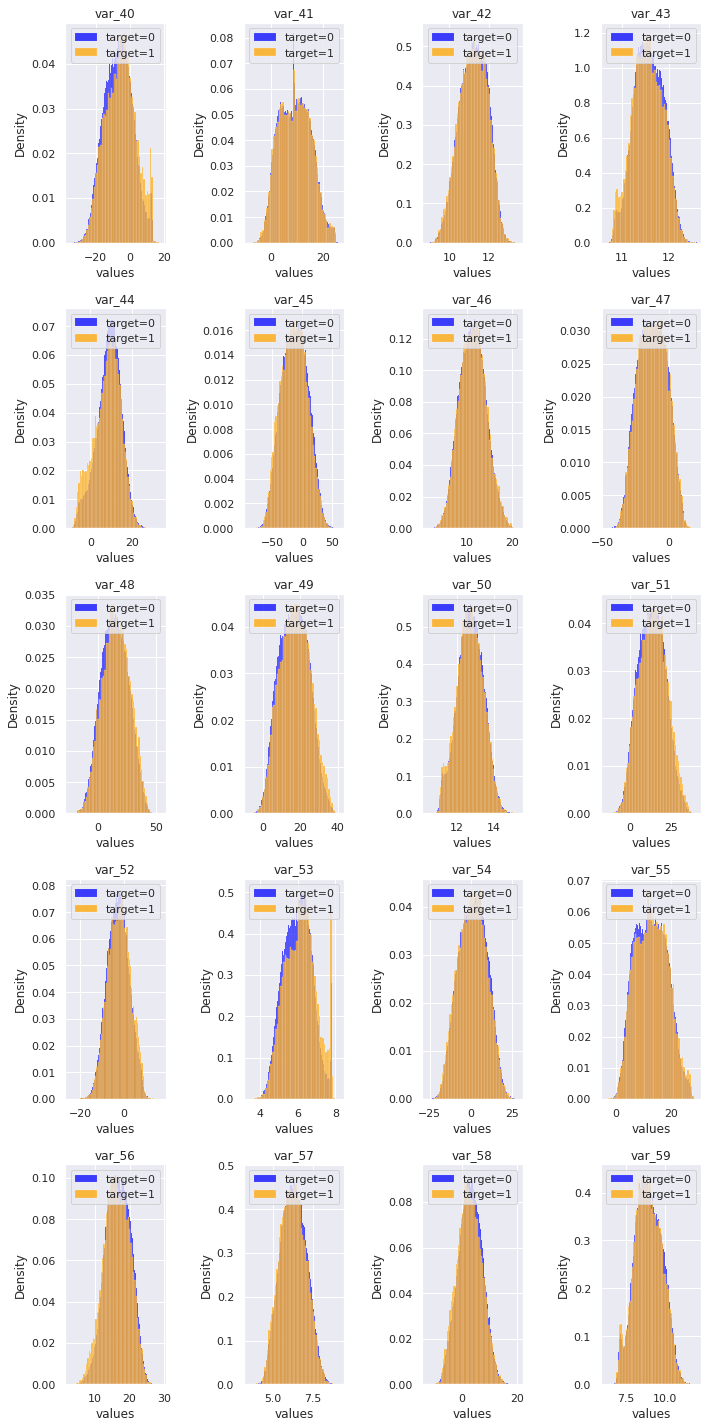

In [132]:
#ヒストグラムの比較
fig, axes = plt.subplots(5, 4, figsize=(10, 20))

targets = [0, 1]
color = ['blue', 'orange']

for v, ax in zip(vares[40:60], axes.ravel()):
    for i in targets:
        sns.histplot(train[train['target'] == i], x=v, stat='density',
                     label='target='+str(i), color=color[i], ax=ax)
        ax.set_xlabel('values')
        ax.set_title(v)
    ax.legend()
plt.tight_layout()
plt.show()

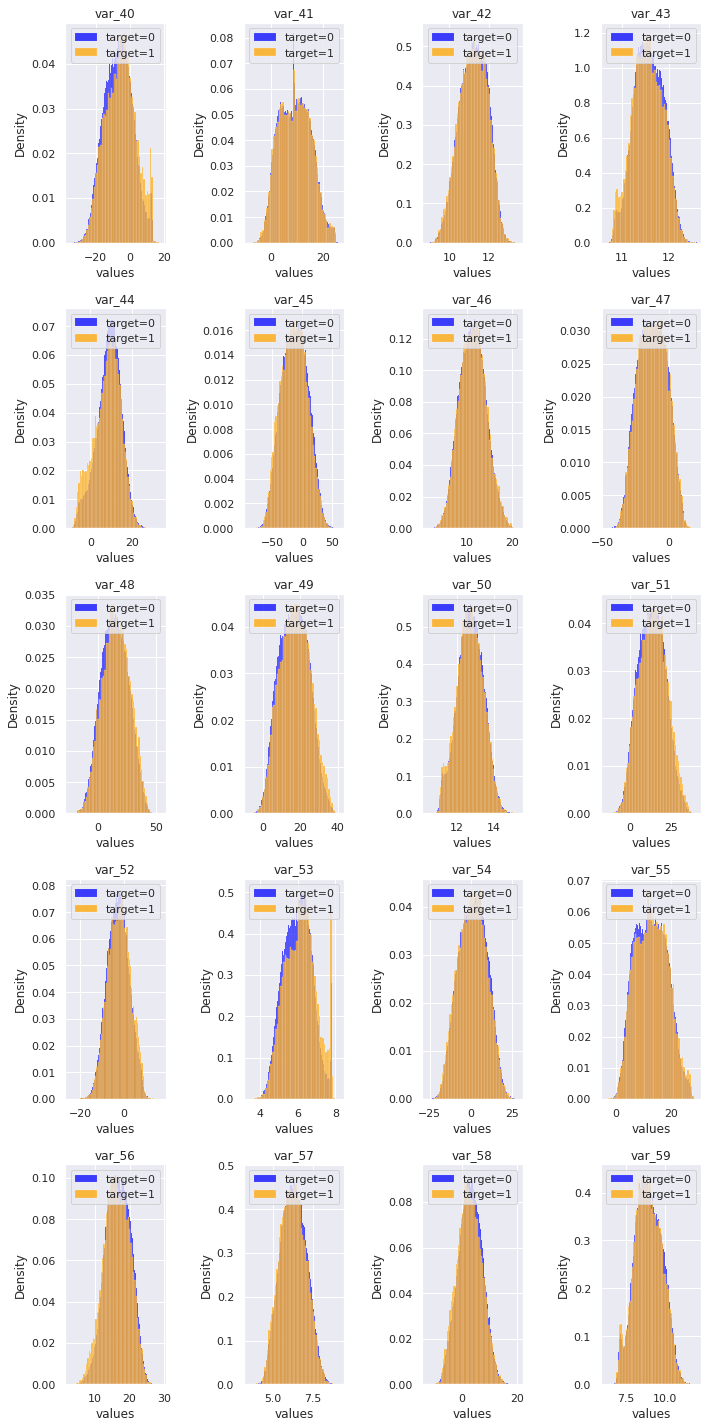

In [133]:
#ヒストグラムの比較
fig, axes = plt.subplots(5, 4, figsize=(10, 20))

targets = [0, 1]
color = ['blue', 'orange']

for v, ax in zip(vares[40:60], axes.ravel()):
    for i in targets:
        sns.histplot(train[train['target'] == i], x=v, stat='density',
                     label='target='+str(i), color=color[i], ax=ax)
        ax.set_xlabel('values')
        ax.set_title(v)
    ax.legend()
plt.tight_layout()
plt.show()

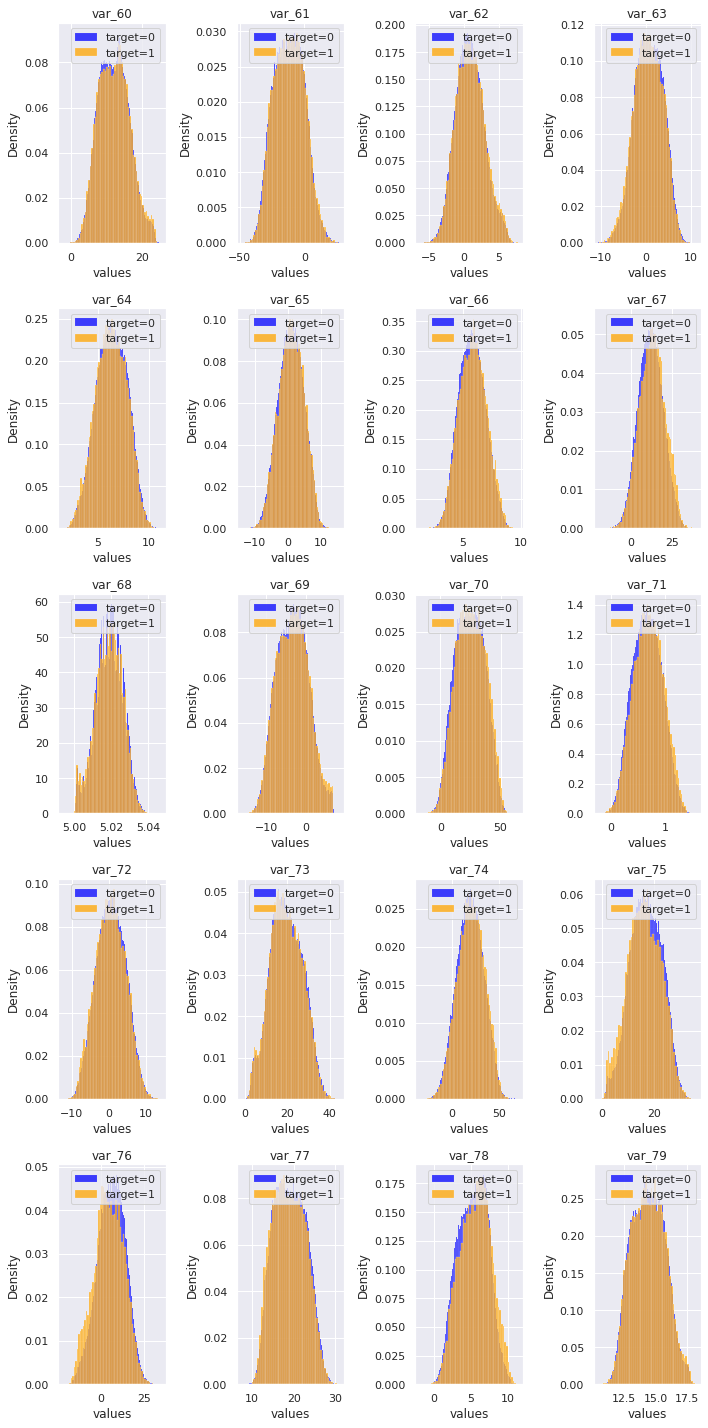

In [134]:
#ヒストグラムの比較
fig, axes = plt.subplots(5, 4, figsize=(10, 20))

targets = [0, 1]
color = ['blue', 'orange']

for v, ax in zip(vares[60:80], axes.ravel()):
    for i in targets:
        sns.histplot(train[train['target'] == i], x=v, stat='density',
                     label='target='+str(i), color=color[i], ax=ax)
        ax.set_xlabel('values')
        ax.set_title(v)
    ax.legend()
plt.tight_layout()
plt.show()

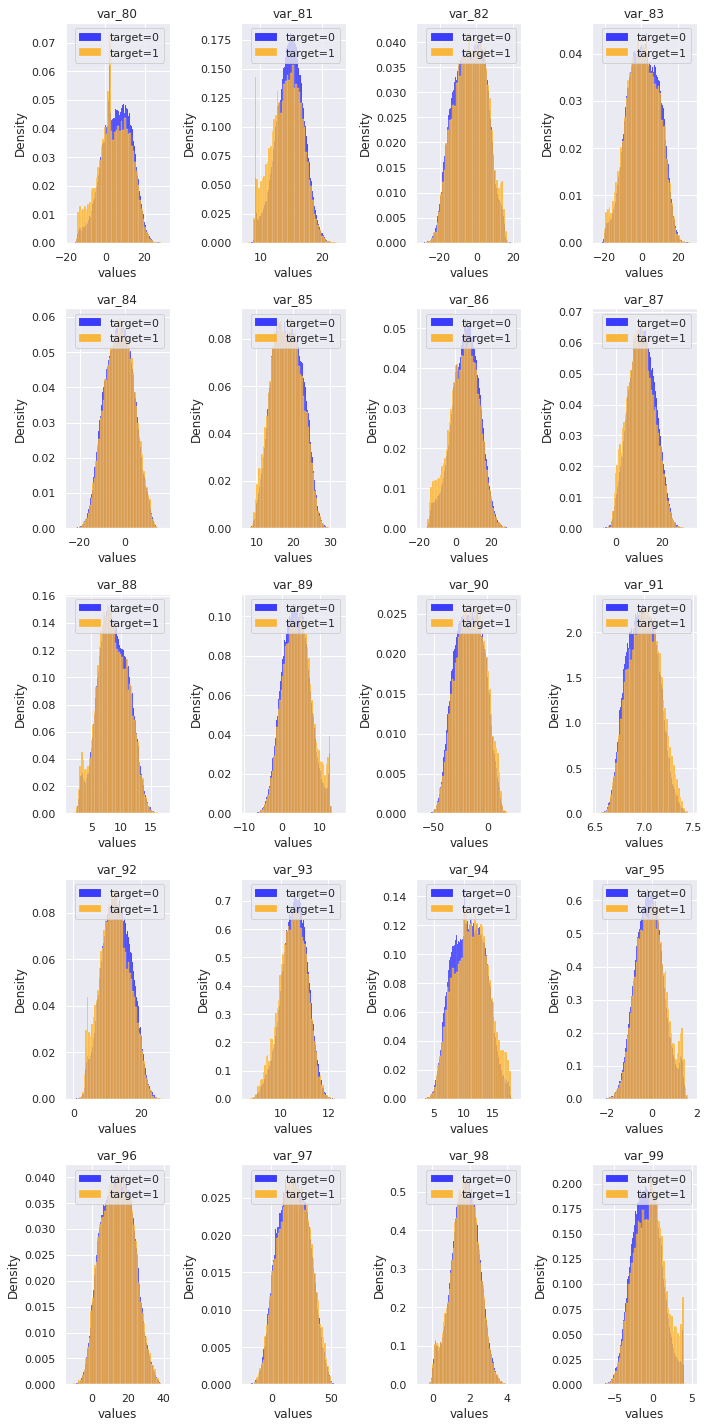

In [135]:
#ヒストグラムの比較
fig, axes = plt.subplots(5, 4, figsize=(10, 20))

targets = [0, 1]
color = ['blue', 'orange']

for v, ax in zip(vares[80:100], axes.ravel()):
    for i in targets:
        sns.histplot(train[train['target'] == i], x=v, stat='density',
                     label='target='+str(i), color=color[i], ax=ax)
        ax.set_xlabel('values')
        ax.set_title(v)
    ax.legend()
plt.tight_layout()
plt.show()

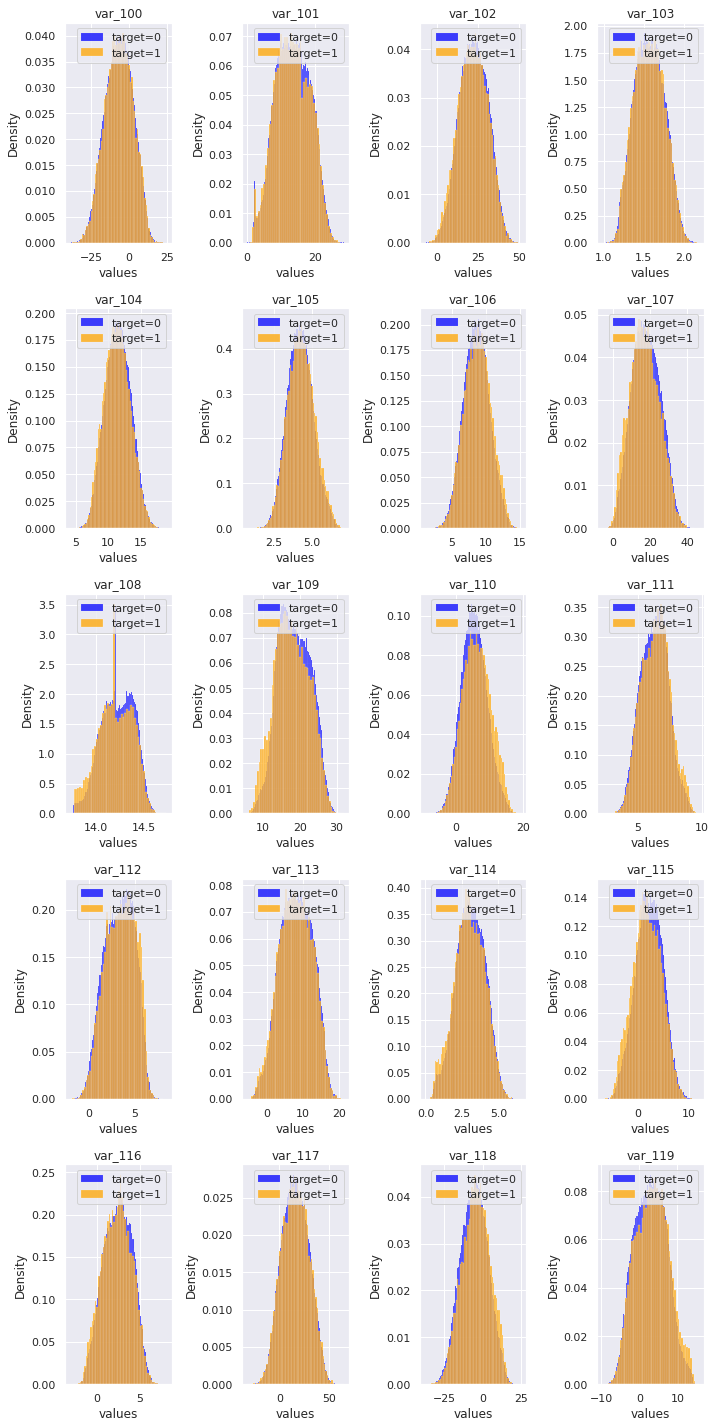

In [136]:
#ヒストグラムの比較
fig, axes = plt.subplots(5, 4, figsize=(10, 20))

targets = [0, 1]
color = ['blue', 'orange']

for v, ax in zip(vares[100:120], axes.ravel()):
    for i in targets:
        sns.histplot(train[train['target'] == i], x=v, stat='density',
                     label='target='+str(i), color=color[i], ax=ax)
        ax.set_xlabel('values')
        ax.set_title(v)
    ax.legend()
plt.tight_layout()
plt.show()

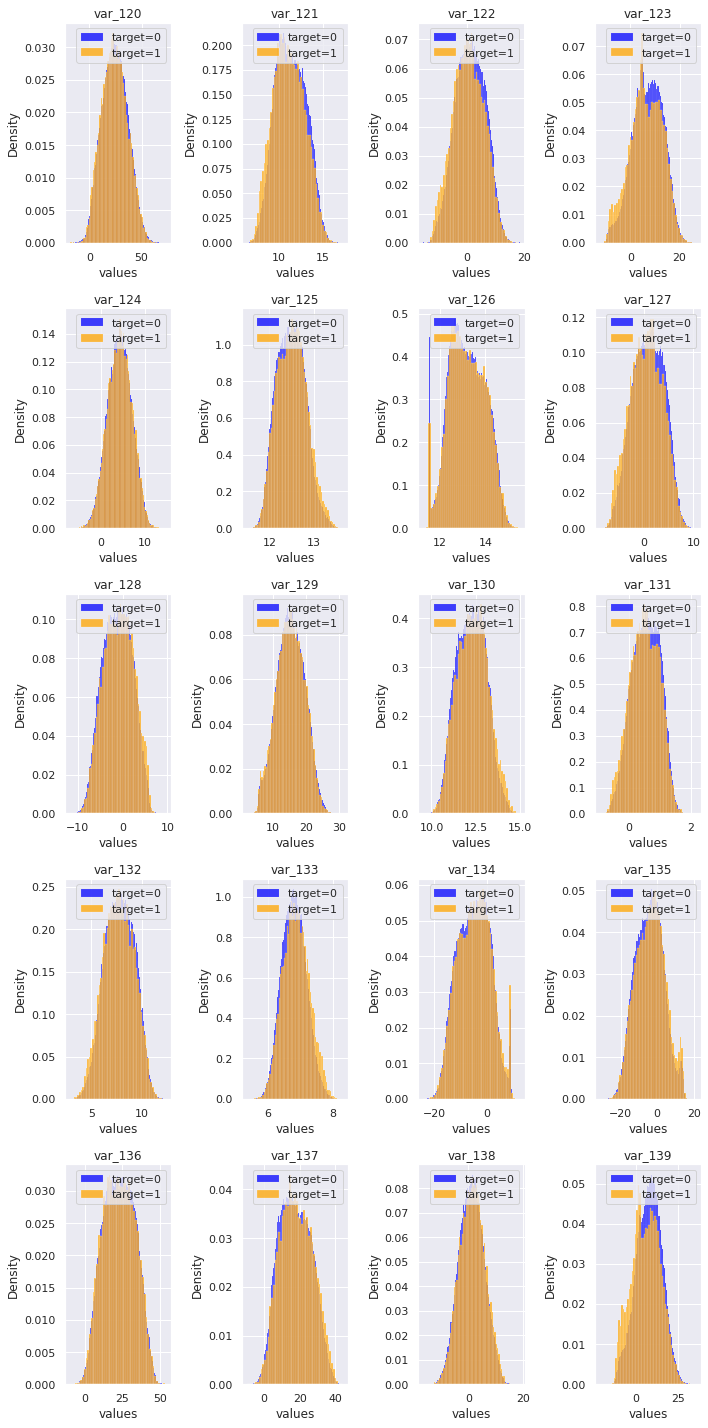

In [137]:
#ヒストグラムの比較
fig, axes = plt.subplots(5, 4, figsize=(10, 20))

targets = [0, 1]
color = ['blue', 'orange']

for v, ax in zip(vares[120:140], axes.ravel()):
    for i in targets:
        sns.histplot(train[train['target'] == i], x=v, stat='density',
                     label='target='+str(i), color=color[i], ax=ax)
        ax.set_xlabel('values')
        ax.set_title(v)
    ax.legend()
plt.tight_layout()
plt.show()

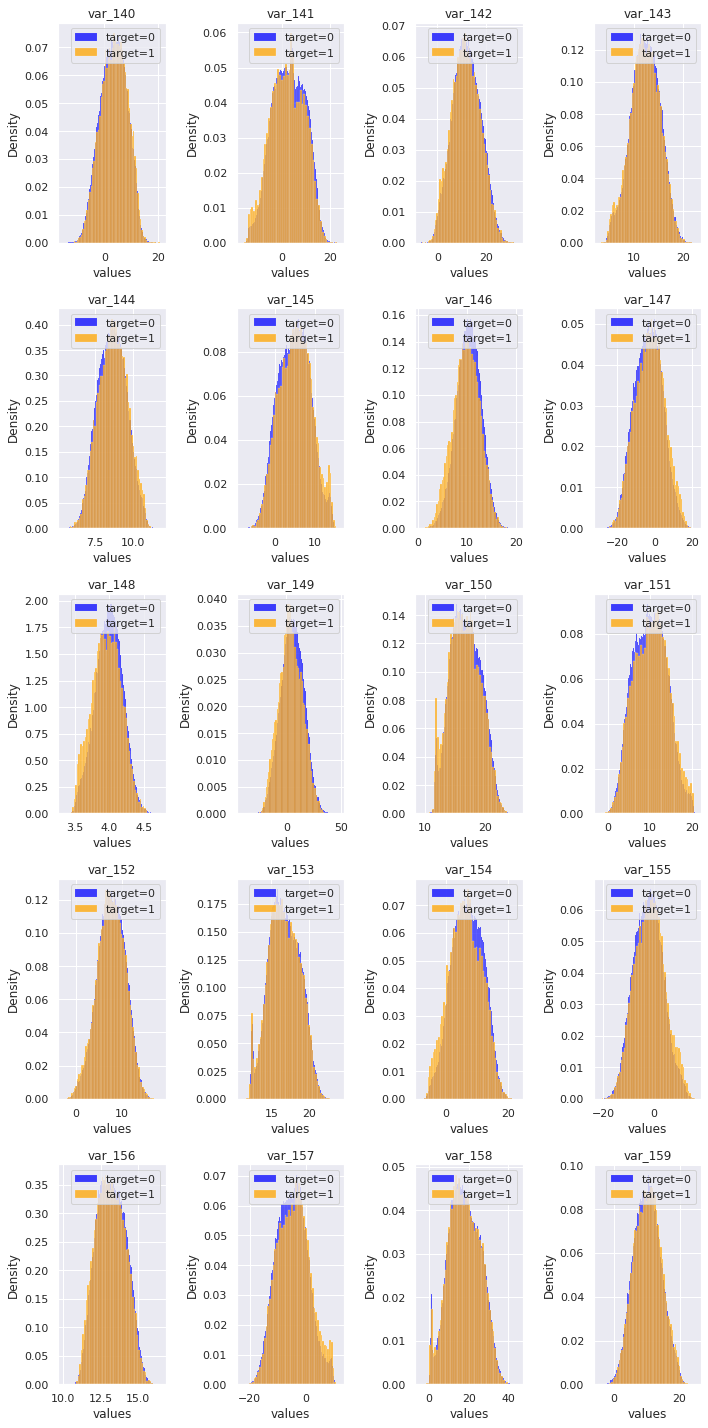

In [138]:
#ヒストグラムの比較
fig, axes = plt.subplots(5, 4, figsize=(10, 20))

targets = [0, 1]
color = ['blue', 'orange']

for v, ax in zip(vares[140:160], axes.ravel()):
    for i in targets:
        sns.histplot(train[train['target'] == i], x=v, stat='density',
                     label='target='+str(i), color=color[i], ax=ax)
        ax.set_xlabel('values')
        ax.set_title(v)
    ax.legend()
plt.tight_layout()
plt.show()

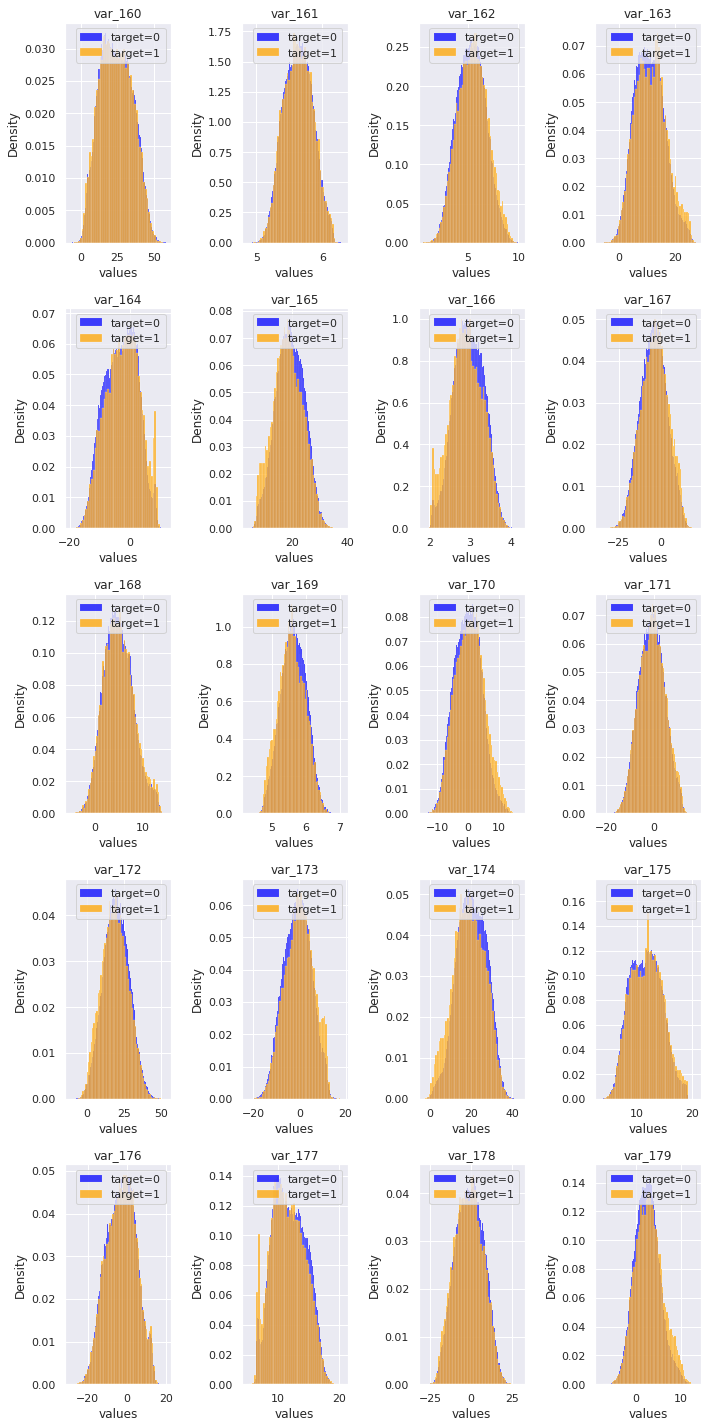

In [139]:
#ヒストグラムの比較
fig, axes = plt.subplots(5, 4, figsize=(10, 20))

targets = [0, 1]
color = ['blue', 'orange']

for v, ax in zip(vares[160:180], axes.ravel()):
    for i in targets:
        sns.histplot(train[train['target'] == i], x=v, stat='density',
                     label='target='+str(i), color=color[i], ax=ax)
        ax.set_xlabel('values')
        ax.set_title(v)
    ax.legend()
plt.tight_layout()
plt.show()

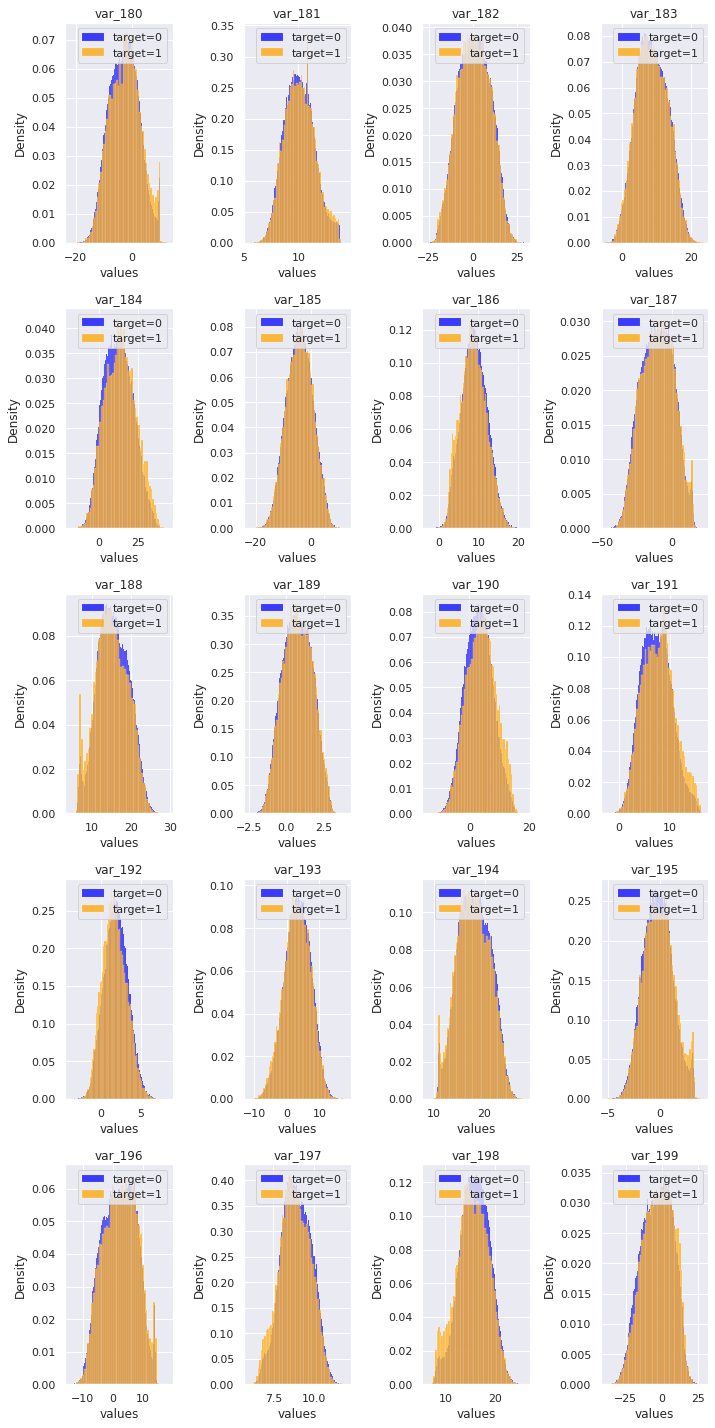

In [140]:
#ヒストグラムの比較
fig, axes = plt.subplots(5, 4, figsize=(10, 20))

targets = [0, 1]
color = ['blue', 'orange']

for v, ax in zip(vares[180:200], axes.ravel()):
    for i in targets:
        sns.histplot(train[train['target'] == i], x=v, stat='density',
                     label='target='+str(i), color=color[i], ax=ax)
        ax.set_xlabel('values')
        ax.set_title(v)
    ax.legend()
plt.tight_layout()
plt.show()

- ヒストグラムを確認すると、おおよその形は似通っている
- 一方で、target=0とはグラフの形が異なる=数値が異なる部分が存在するデータが複数存在
- target=0と1で何らかの差がありそうなのは、
- var_0,1, 2,5,6,9,12,13,18,21,22,26,40,41,44,53,55,75,76,80,81,86,88,89,94,95,99,108,109,110,115,123,131,139,141,148,150,154,157,163,164,165,166,174,177,179,180,184,188,191,195,198
- target=0と比較して、target=1のvar_が、
- 値が大きいもの：0,1,2,5,6,18,22,26,35,40,53(最大値付近突出),78,89,94,95,99,110,119,134(最大値付近突出),135,145,151,155,157,163,164,165,170,173,179,180(最大値付近突出) ,184,190,191,195,
- うち、マイナス値があるもの：1,5,22,26,35,40,89,95,99,119,135,145,155,157,163,164,170,173,179,180,184,190,195
- 値が小さいもの：9,12,13,21,34,43,44,75,76,80,81,86,88,92,108,109,115,123,131,139,141,146,148,150(最小値付近突出),154,166,169,174,177(最小値付近突出),188(最小値付近突出),194(最小値付近突出),197,198
- うち、マイナス値があるもの：13,21,44,76,80,86,115,123,131,139,141,154

In [141]:
from scipy import stats

- 訓練データでのQ-Qプロット

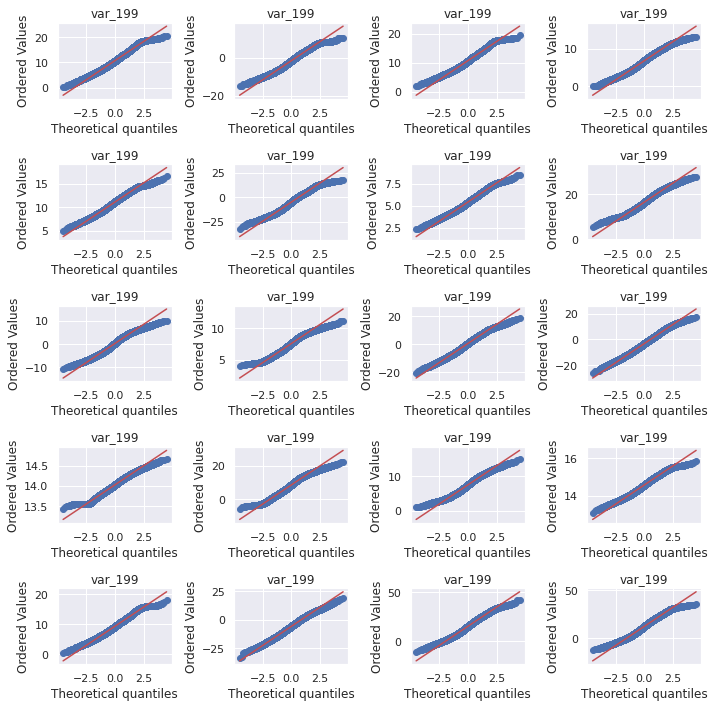

In [142]:
#Q-Qプロットを見てみる
#Q-Qプロット：得られたデータと理論分布を比較し、類似度を調べる
fig, axes = plt.subplots(5, 4, figsize=(10,10))
color = ['blue', 'orange']
targets = [0, 1]

for i, ax in zip(vares[:20], axes.ravel()):
    stats.probplot(train[i], plot=ax)
    ax.set_title(v)
plt.tight_layout()
plt.show()

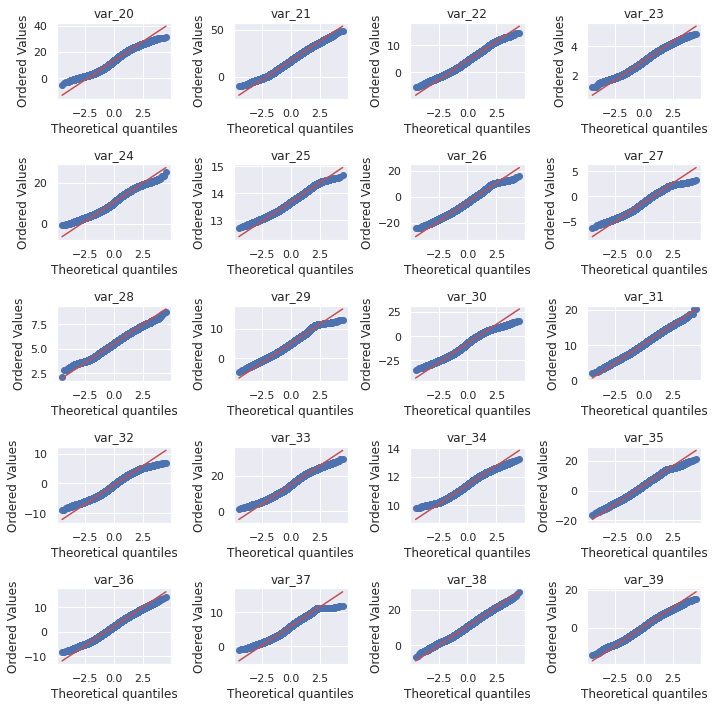

In [143]:
#Q-Qプロットを見てみる
#Q-Qプロット：得られたデータと理論分布を比較し、類似度を調べる
fig, axes = plt.subplots(5, 4, figsize=(10,10))

for i, ax in zip(vares[20:40], axes.ravel()):
    stats.probplot(train[i], plot=ax)
    ax.set_title(i)
plt.tight_layout()
plt.show()

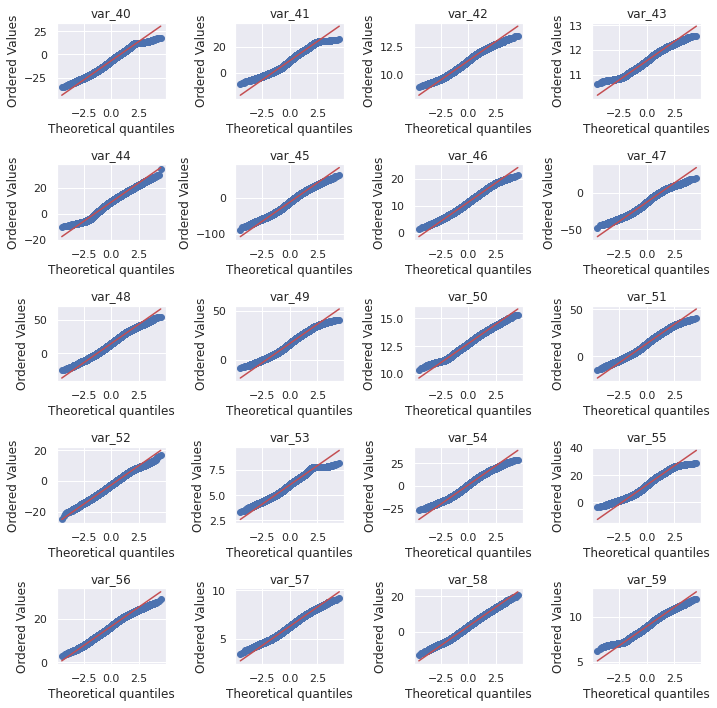

In [144]:
#Q-Qプロットを見てみる
#Q-Qプロット：得られたデータと理論分布を比較し、類似度を調べる
fig, axes = plt.subplots(5, 4, figsize=(10,10))

for i, ax in zip(vares[40:60], axes.ravel()):
    stats.probplot(train[i], plot=ax)
    ax.set_title(i)
plt.tight_layout()
plt.show()

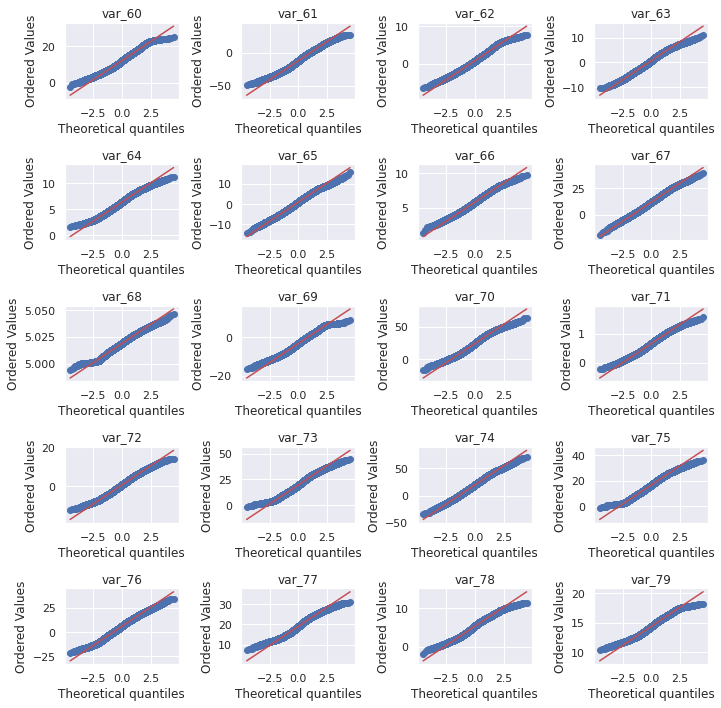

In [145]:
#Q-Qプロットを見てみる
#Q-Qプロット：得られたデータと理論分布を比較し、類似度を調べる
fig, axes = plt.subplots(5, 4, figsize=(10,10))

for i, ax in zip(vares[60:80], axes.ravel()):
    stats.probplot(train[i], plot=ax)
    ax.set_title(i)
plt.tight_layout()
plt.show()

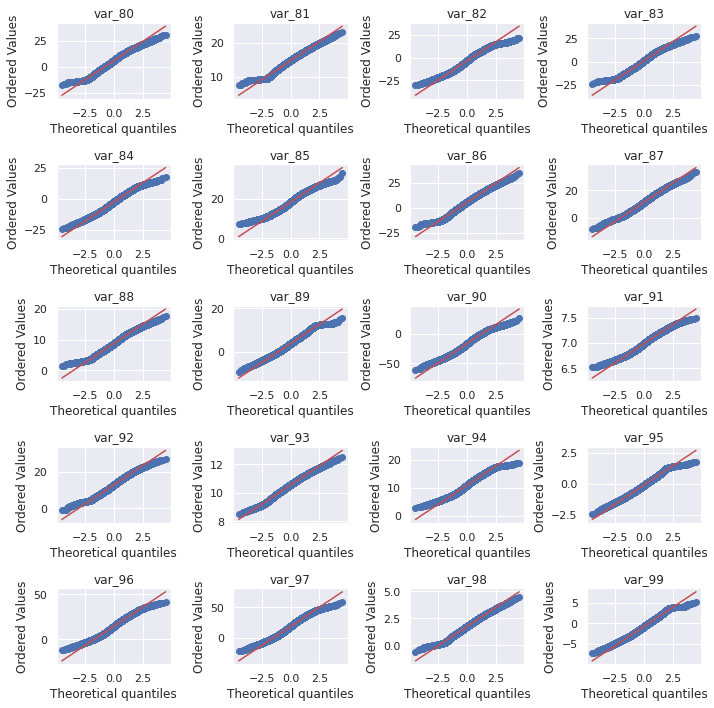

In [146]:
#Q-Qプロットを見てみる
#Q-Qプロット：得られたデータと理論分布を比較し、類似度を調べる
fig, axes = plt.subplots(5, 4, figsize=(10,10))

for i, ax in zip(vares[80:100], axes.ravel()):
    stats.probplot(train[i], plot=ax)
    ax.set_title(i)
plt.tight_layout()
plt.show()

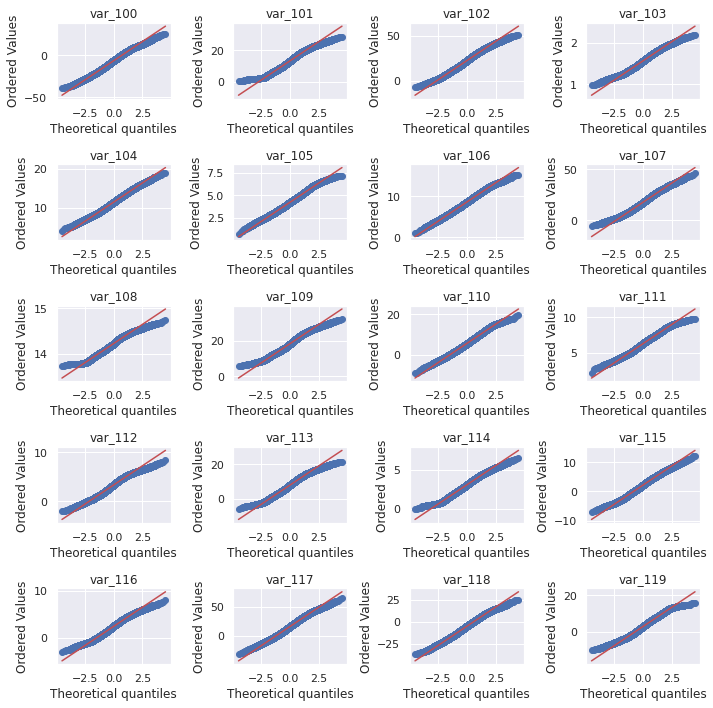

In [147]:
#Q-Qプロットを見てみる
#Q-Qプロット：得られたデータと理論分布を比較し、類似度を調べる
fig, axes = plt.subplots(5, 4, figsize=(10,10))

for i, ax in zip(vares[100:120], axes.ravel()):
    stats.probplot(train[i], plot=ax)
    ax.set_title(i)
plt.tight_layout()
plt.show()

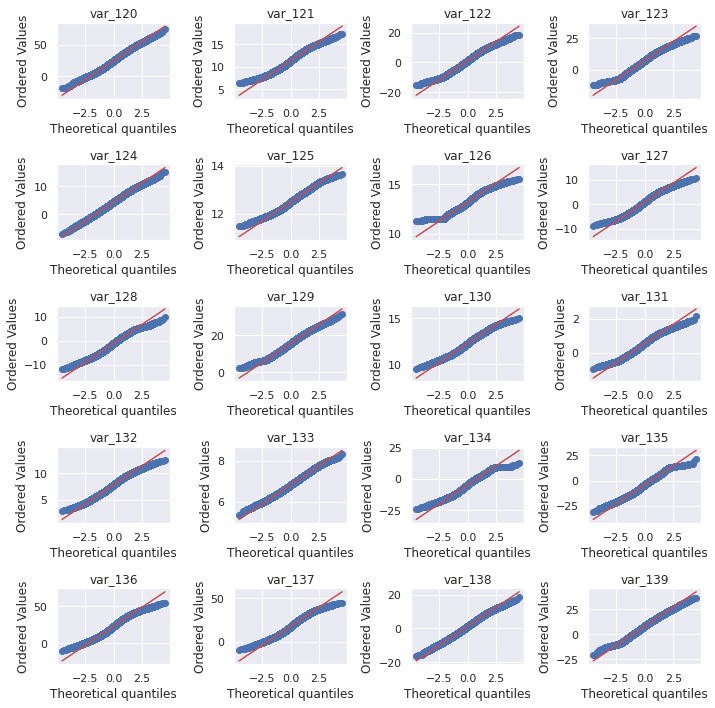

In [148]:
#Q-Qプロットを見てみる
#Q-Qプロット：得られたデータと理論分布を比較し、類似度を調べる
fig, axes = plt.subplots(5, 4, figsize=(10,10))

for i, ax in zip(vares[120:140], axes.ravel()):
    stats.probplot(train[i], plot=ax)
    ax.set_title(i)
plt.tight_layout()
plt.show()

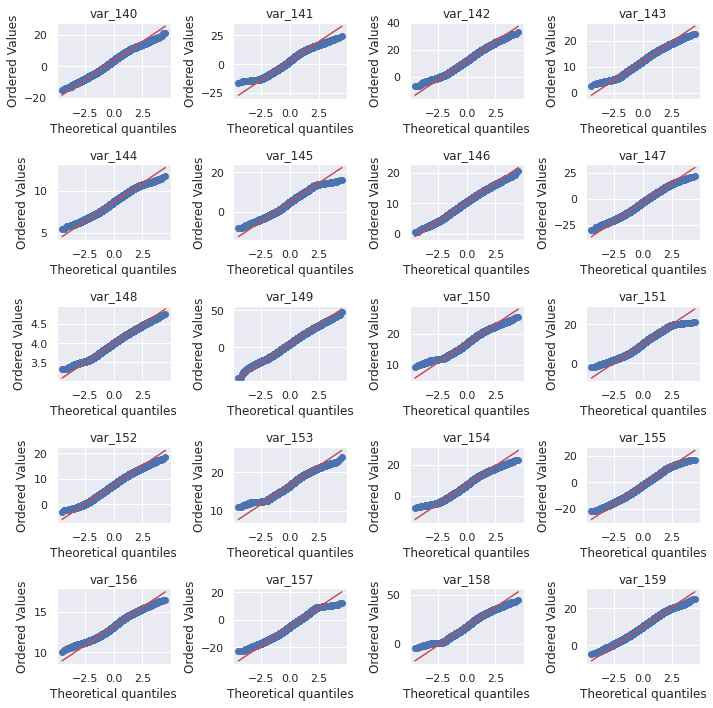

In [149]:
#Q-Qプロットを見てみる
#Q-Qプロット：得られたデータと理論分布を比較し、類似度を調べる
fig, axes = plt.subplots(5, 4, figsize=(10,10))

for i, ax in zip(vares[140:160], axes.ravel()):
    stats.probplot(train[i], plot=ax)
    ax.set_title(i)
plt.tight_layout()
plt.show()

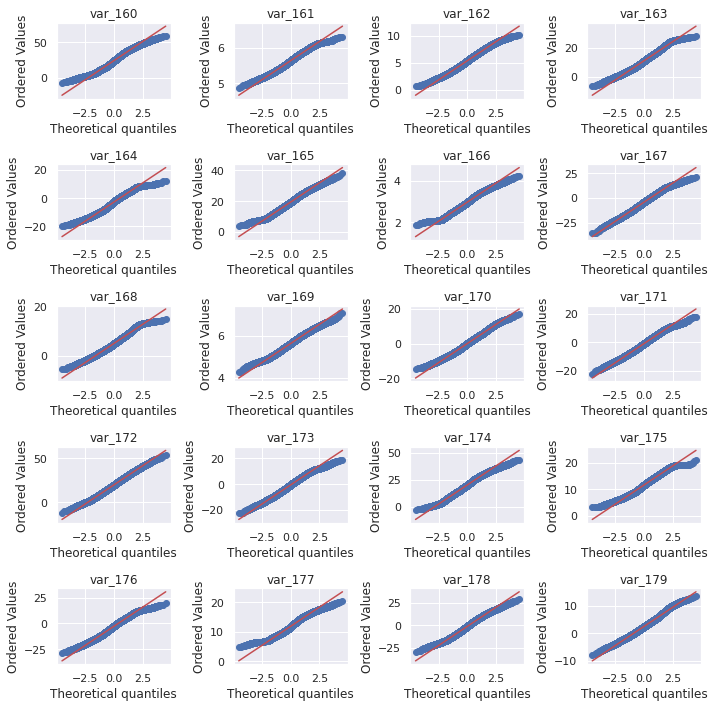

In [150]:
#Q-Qプロットを見てみる
#Q-Qプロット：得られたデータと理論分布を比較し、類似度を調べる
fig, axes = plt.subplots(5, 4, figsize=(10,10))

for i, ax in zip(vares[160:180], axes.ravel()):
    stats.probplot(train[i], plot=ax)
    ax.set_title(i)
plt.tight_layout()
plt.show()

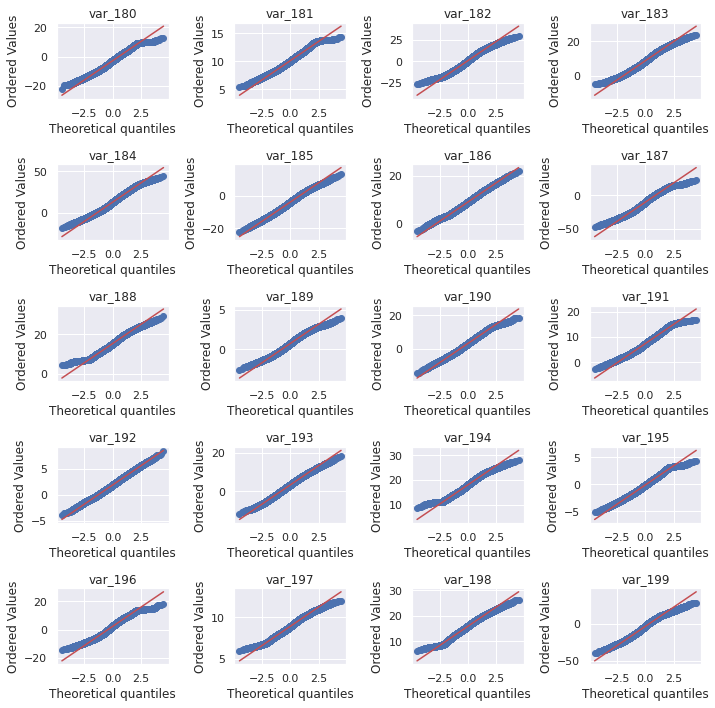

In [151]:
#Q-Qプロットを見てみる
#Q-Qプロット：得られたデータと理論分布を比較し、類似度を調べる
fig, axes = plt.subplots(5, 4, figsize=(10,10))

for i, ax in zip(vares[180:200], axes.ravel()):
    stats.probplot(train[i], plot=ax)
    ax.set_title(i)
plt.tight_layout()
plt.show()

- テストデータでのQ-Qプロット

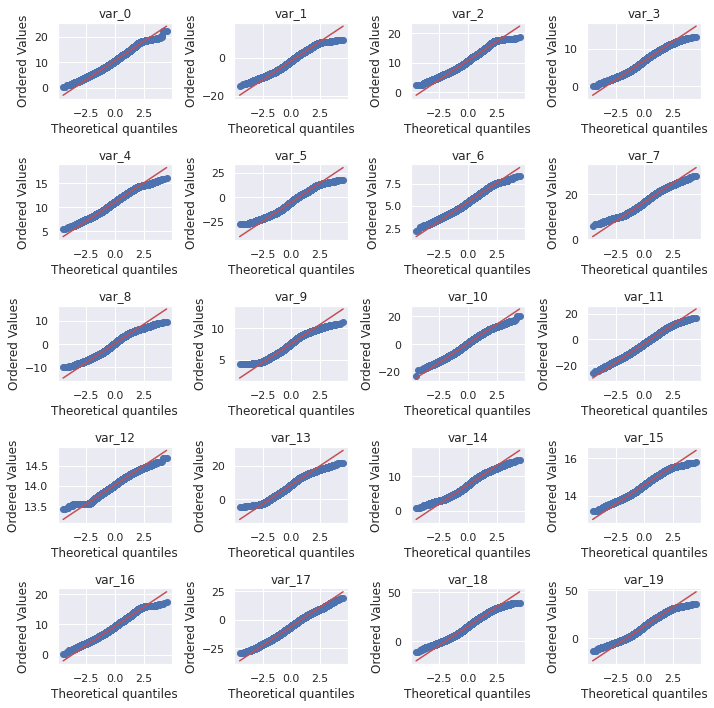

In [152]:
#Q-Qプロットを見てみる
#Q-Qプロット：得られたデータと理論分布を比較し、類似度を調べる
fig, axes = plt.subplots(5, 4, figsize=(10,10))

for i, ax in zip(vares[:20], axes.ravel()):
    stats.probplot(test[i], plot=ax)
    ax.set_title(i)
plt.tight_layout()
plt.show()

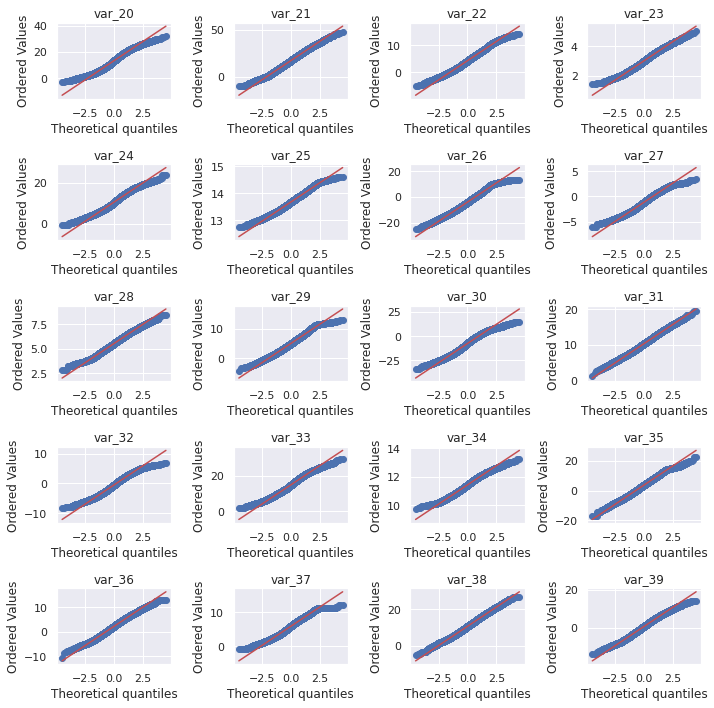

In [153]:
#Q-Qプロットを見てみる
#Q-Qプロット：得られたデータと理論分布を比較し、類似度を調べる
fig, axes = plt.subplots(5, 4, figsize=(10,10))

for i, ax in zip(vares[20:40], axes.ravel()):
    stats.probplot(test[i], plot=ax)
    ax.set_title(i)
plt.tight_layout()
plt.show()

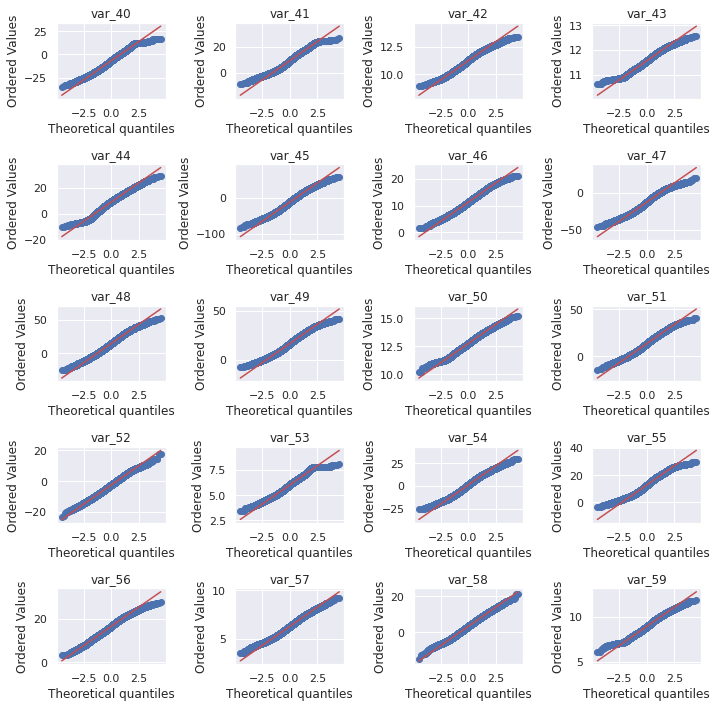

In [154]:
#Q-Qプロットを見てみる
#Q-Qプロット：得られたデータと理論分布を比較し、類似度を調べる
fig, axes = plt.subplots(5, 4, figsize=(10,10))

for i, ax in zip(vares[40:60], axes.ravel()):
    stats.probplot(test[i], plot=ax)
    ax.set_title(i)
plt.tight_layout()
plt.show()

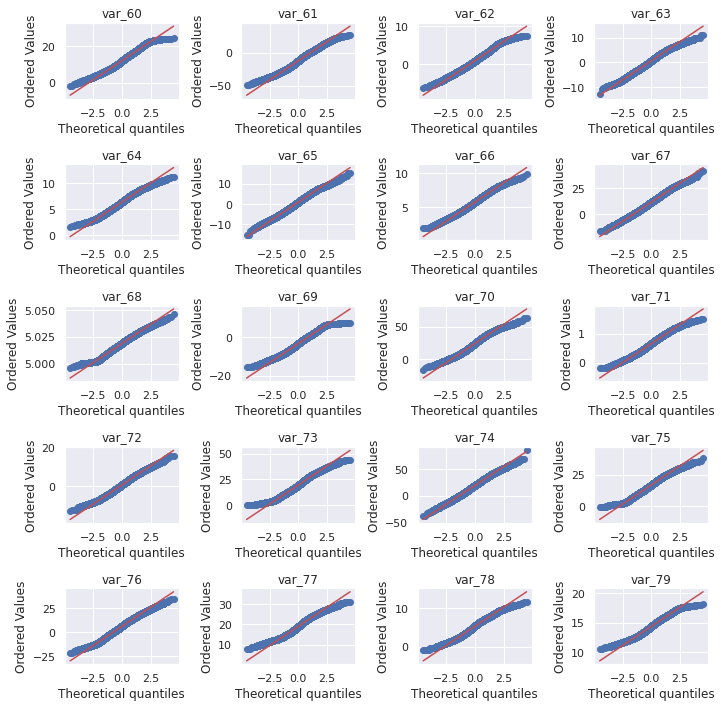

In [155]:
#Q-Qプロットを見てみる
#Q-Qプロット：得られたデータと理論分布を比較し、類似度を調べる
fig, axes = plt.subplots(5, 4, figsize=(10,10))

for i, ax in zip(vares[60:80], axes.ravel()):
    stats.probplot(test[i], plot=ax)
    ax.set_title(i)
plt.tight_layout()
plt.show()

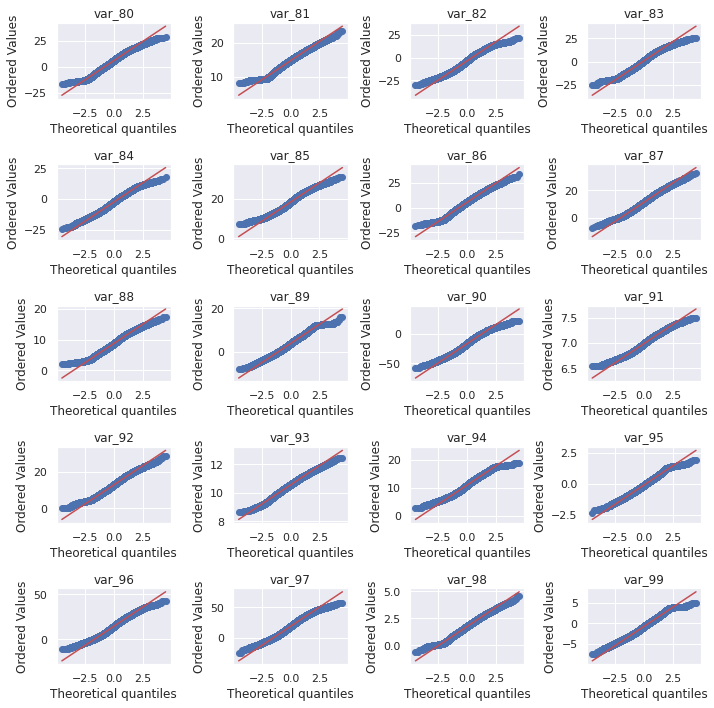

In [156]:
#Q-Qプロットを見てみる
#Q-Qプロット：得られたデータと理論分布を比較し、類似度を調べる
fig, axes = plt.subplots(5, 4, figsize=(10,10))

for i, ax in zip(vares[80:100], axes.ravel()):
    stats.probplot(test[i], plot=ax)
    ax.set_title(i)
plt.tight_layout()
plt.show()

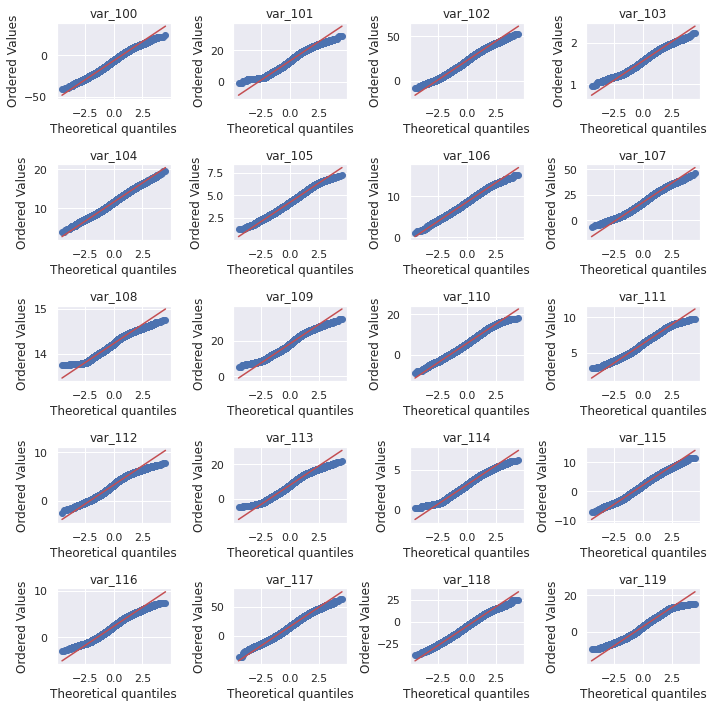

In [157]:
#Q-Qプロットを見てみる
#Q-Qプロット：得られたデータと理論分布を比較し、類似度を調べる
fig, axes = plt.subplots(5, 4, figsize=(10,10))

for i, ax in zip(vares[100:120], axes.ravel()):
    stats.probplot(test[i], plot=ax)
    ax.set_title(i)
plt.tight_layout()
plt.show()

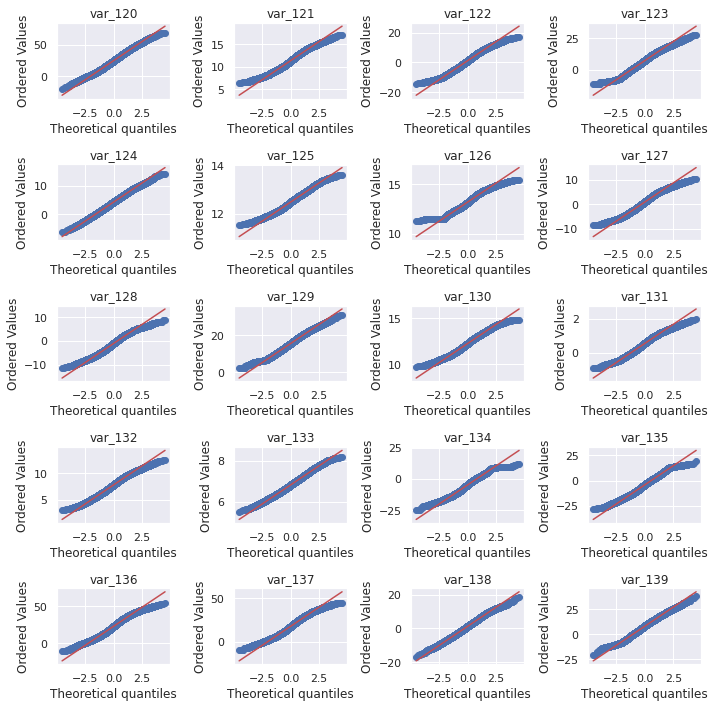

In [158]:
#Q-Qプロットを見てみる
#Q-Qプロット：得られたデータと理論分布を比較し、類似度を調べる
fig, axes = plt.subplots(5, 4, figsize=(10,10))

for i, ax in zip(vares[120:140], axes.ravel()):
    stats.probplot(test[i], plot=ax)
    ax.set_title(i)
plt.tight_layout()
plt.show()

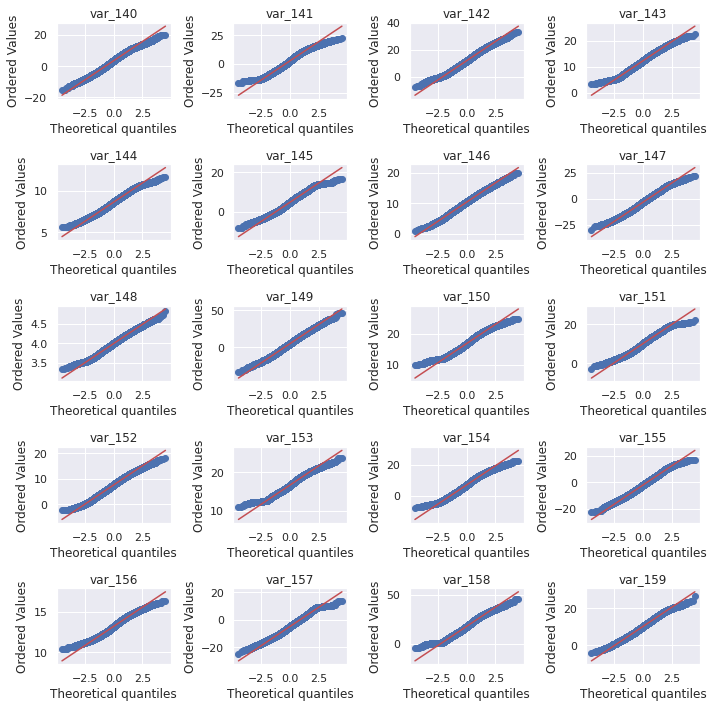

In [159]:
#Q-Qプロットを見てみる
#Q-Qプロット：得られたデータと理論分布を比較し、類似度を調べる
fig, axes = plt.subplots(5, 4, figsize=(10,10))

for i, ax in zip(vares[140:160], axes.ravel()):
    stats.probplot(test[i], plot=ax)
    ax.set_title(i)
plt.tight_layout()
plt.show()

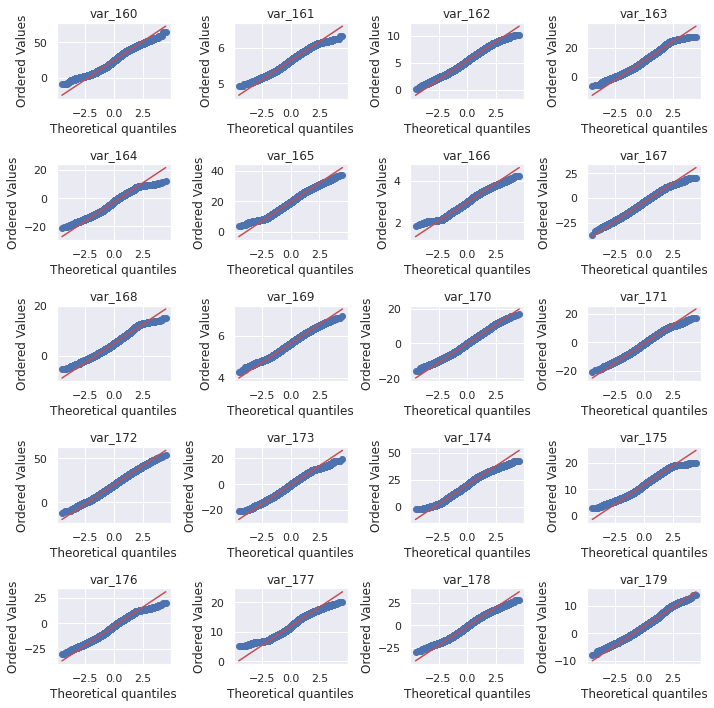

In [160]:
#Q-Qプロットを見てみる
#Q-Qプロット：得られたデータと理論分布を比較し、類似度を調べる
fig, axes = plt.subplots(5, 4, figsize=(10,10))

for i, ax in zip(vares[160:180], axes.ravel()):
    stats.probplot(test[i], plot=ax)
    ax.set_title(i)
plt.tight_layout()
plt.show()

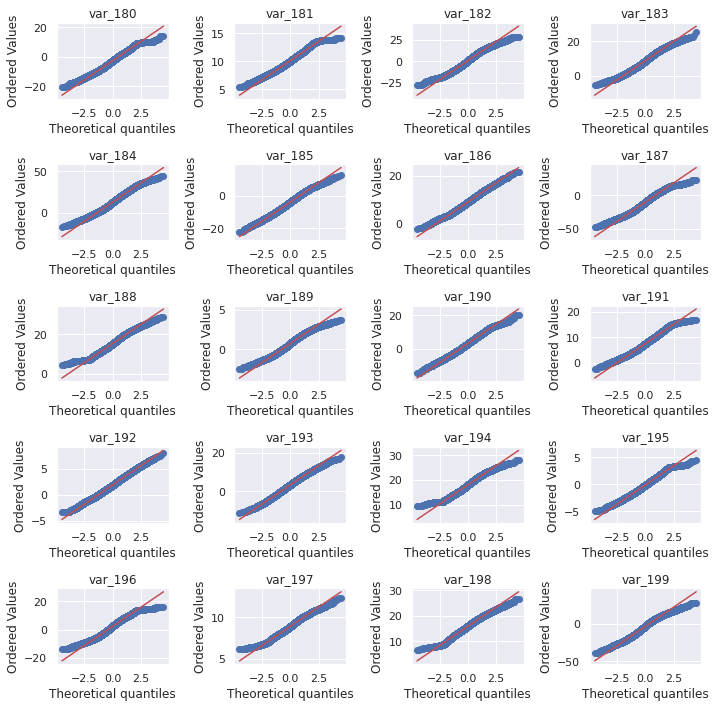

In [161]:
#Q-Qプロットを見てみる
#Q-Qプロット：得られたデータと理論分布を比較し、類似度を調べる
fig, axes = plt.subplots(5, 4, figsize=(10,10))

for i, ax in zip(vares[180:200], axes.ravel()):
    stats.probplot(test[i], plot=ax)
    ax.set_title(i)
plt.tight_layout()
plt.show()

- 訓練データ、テストデータともに最大値と最小値に近いあたりで、理論的な正規分布から外れるような挙動を示す
- 元データはもっとヒストグラムが右や左に裾が広かったりした可能性。
- つまり、元データから何らかの対数変換が施されていることも考えられる

サンタンデール銀行
- スペイン・マドリードに本拠を置く商業銀行グループである。同国最大手の銀行グループであると共に、ラテンアメリカ地域全般、アメリカ合衆国北東部、ポーランドなどで店舗を展開する多国籍企業となっている。
- 取引とは、・お金を貸す(融資など)・お金を支払う・ローンを組む・お金を預ける
- ・保険を購入・投資信託を購入・国債を購入・クレジットカード(作成、引き落とし、決済)・資産運用(個人、預金)などある
- 事業運営(起業、個人事業、会社経営)などの運転資金操作

仮説を立てていく
- 前提：銀行の特定の取引について、取引する(target=1)か取引しない(target=0)を判別・予測するもの
- 数値：整数ではなく、実数のみ。プラスだけのものとマイナスからプラスまで幅をもつものあり。プラス値とマイナス値の幅が同じものや、ほとんどマイナス値でプラス値幅小さい、もしくはほどんどプラス値でマイナス値幅小さい、などの特徴量あり
- 特徴量ヒストグラム：ほぼ形が同じものが多くあるが、プラス値かマイナス値かに山の形がずれているものも複数あり
- 実際に動いた金額がサービスごとに割り振られている可能性
- サービス評価についてのカテゴリ変数も難読化されている可能性
- 0～10前後のプラスのみの数値は、利用回数、アンケート評価、利用サービスなどのカテゴリ的な変数を変換したものと考えてみる(出題者は、顧客満足度の特定に努めていると前置きにあり)

- マイナスとは、どこから見た基準でマイナスか？(顧客か銀行か)
- 【顧客視点】
- 銀行取引で、マイナスとして表現しそうなもの→出金(カード引き落とし、ローン支払い、利息の支払い、保険料支払い、投資信託購入、国債購入、など)
- 銀行取引で、プラスとして表現しそうなもの→入金(預金、投資信託売り、国債売り、保険料受け取り、投資信託配当金受け取り、金利受け取り、など)
- 【銀行視点】
- 銀行側にマイナス→出金(融資、保険料支払い、投資信託配当金支払い、金利支払い、その他金融商品売却、など)
- 銀行側にプラス→入金(融資の利息、投資信託購入、保険商品購入、預金、国債購入、送金手数料)

仮説

- 各レコードは、個人または団体に関する利用履歴及び顧客個人情報(年齢、資産額、負債額、利用年数や利用回数、利用金額、住所など？)、満足度アンケートなどを数値化したものと仮定
- レコードはプラスマイナス100以内のため、いくらかの特徴量は割合(%)に変換されている可能性
- 顧客視点の利用履歴として考える
- マイナスが大きくなっている人がtarget=1となっている→利息の支払い、送金による資金減少などと仮定
- プラスが大きくなっている人がtarget=1となっている→利用回数、借入金額(貸借対照表における負債など)、運転資金運用、その他金融商品購入
- しかしながら、どの特徴量が何なのかは依然として不明

In [162]:
numeric_col = [i for i in train.columns if train[i].dtype != 'object']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'var_6'),
  Text(1, 0, 'var_110'),
  Text(2, 0, 'var_53'),
  Text(3, 0, 'var_26'),
  Text(4, 0, 'var_22'),
  Text(5, 0, 'var_99'),
  Text(6, 0, 'var_190'),
  Text(7, 0, 'var_2'),
  Text(8, 0, 'var_133'),
  Text(9, 0, 'var_0'),
  Text(10, 0, 'var_1'),
  Text(11, 0, 'var_179'),
  Text(12, 0, 'var_40'),
  Text(13, 0, 'var_184'),
  Text(14, 0, 'var_78'),
  Text(15, 0, 'var_170'),
  Text(16, 0, 'var_191'),
  Text(17, 0, 'var_94'),
  Text(18, 0, 'var_67'),
  Text(19, 0, 'var_18'),
  Text(20, 0, 'var_173'),
  Text(21, 0, 'var_164'),
  Text(22, 0, 'var_118'),
  Text(23, 0, 'var_147'),
  Text(24, 0, 'var_91'),
  Text(25, 0, 'var_89'),
  Text(26, 0, 'var_95'),
  Text(27, 0, 'var_155'),
  Text(28, 0, 'var_35'),
  Text(29, 0, 'var_71'),
  Text(30, 0, 'var_106'),
  Te

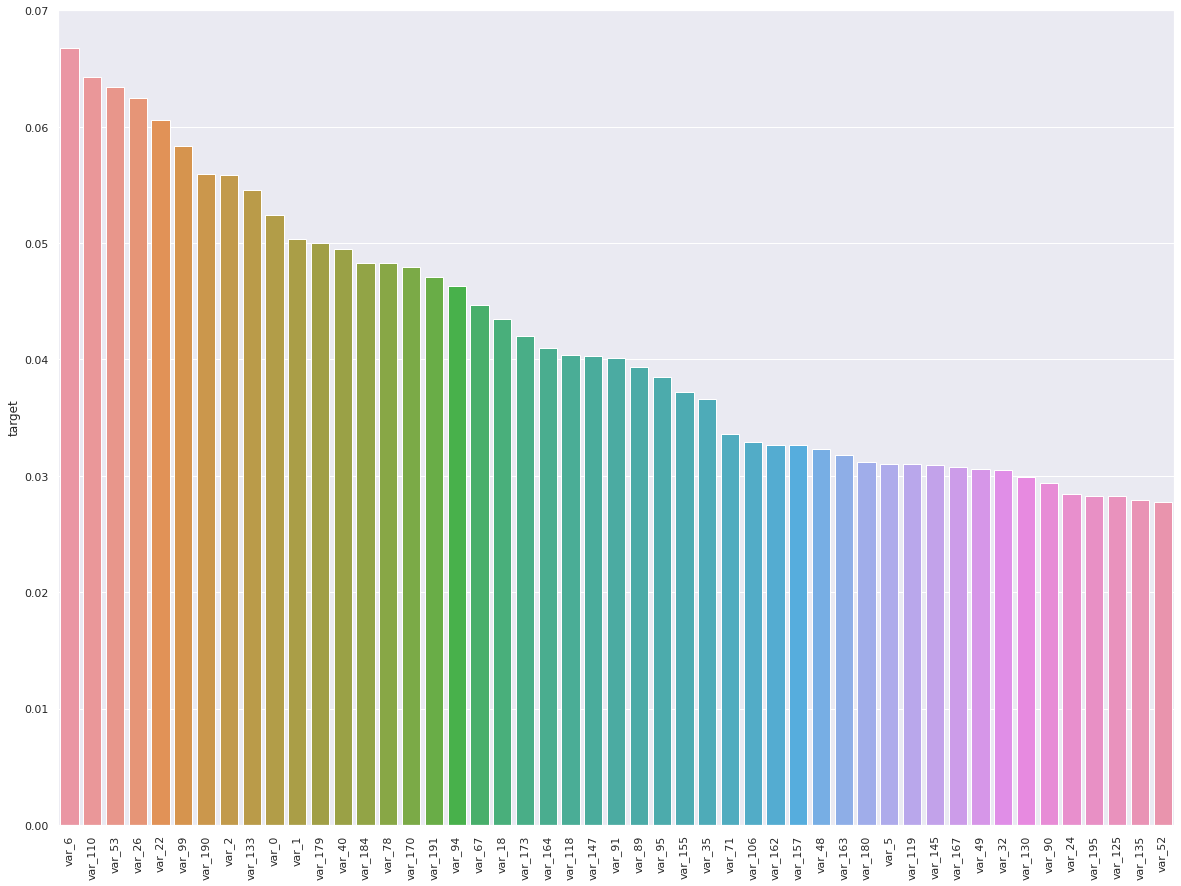

In [163]:
#相関関係についてみる 
#targetとプラスの関係上位50
corrmat = train[numeric_col].corr().sort_values('target', ascending=False)
plt.subplots(figsize=(20,15))
sns.barplot(x=corrmat[1:50].index, y=corrmat['target'][1:50])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'var_132'),
  Text(1, 0, 'var_85'),
  Text(2, 0, 'var_23'),
  Text(3, 0, 'var_31'),
  Text(4, 0, 'var_150'),
  Text(5, 0, 'var_114'),
  Text(6, 0, 'var_104'),
  Text(7, 0, 'var_43'),
  Text(8, 0, 'var_141'),
  Text(9, 0, 'var_186'),
  Text(10, 0, 'var_131'),
  Text(11, 0, 'var_188'),
  Text(12, 0, 'var_56'),
  Text(13, 0, 'var_93'),
  Text(14, 0, 'var_197'),
  Text(15, 0, 'var_87'),
  Text(16, 0, 'var_177'),
  Text(17, 0, 'var_172'),
  Text(18, 0, 'var_75'),
  Text(19, 0, 'var_36'),
  Text(20, 0, 'var_127'),
  Text(21, 0, 'var_86'),
  Text(22, 0, 'var_121'),
  Text(23, 0, 'var_107'),
  Text(24, 0, 'var_123'),
  Text(25, 0, 'var_122'),
  Text(26, 0, 'var_9'),
  Text(27, 0, 'var_192'),
  Text(28, 0, 'var_33'),
  Text(29, 0, 'var_108'),
  Text(30, 0, 'va

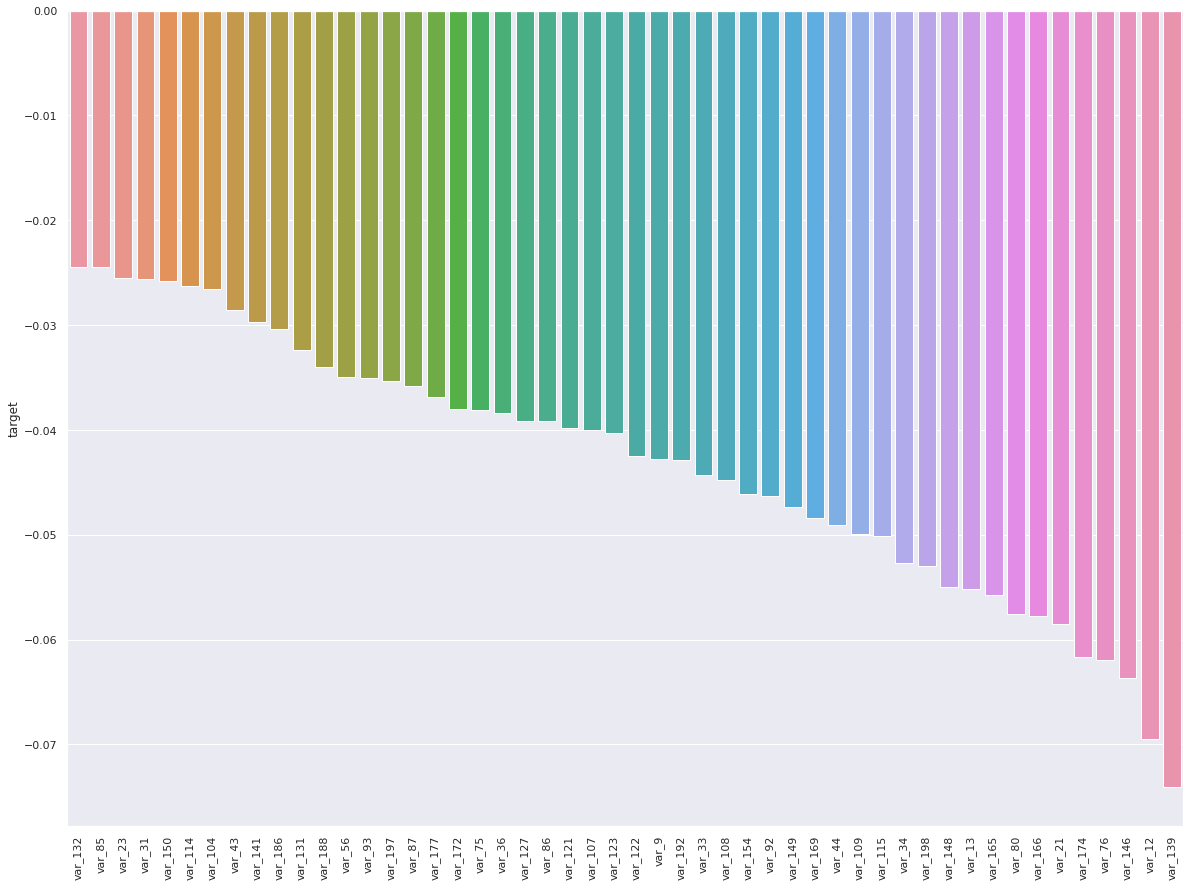

In [164]:
#相関関係についてみる 
#targetとマイナスの関係上位50
corrmat = train[numeric_col].corr().sort_values('target', ascending=False)
plt.subplots(figsize=(20,15))
sns.barplot(x=corrmat[150:200].index, y=corrmat['target'][150:200])
plt.xticks(rotation=90)

- targetとの線形的な相関は低いことがうかがえる

In [165]:
#targetとの相互情報量を見てみる
#訓練データ
from sklearn.feature_selection import mutual_info_regression

def make_mi_score(X, y):
    mi_scores = mutual_info_regression(X, y, discrete_features='auto')
    mi_scores = pd.Series(mi_scores, name='MI Score', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_score(train[vares], train['target'])
mi_scores

var_81     0.004734
var_139    0.004021
var_12     0.003916
var_80     0.003842
var_110    0.003097
             ...   
var_30     0.000000
var_33     0.000000
var_120    0.000000
var_38     0.000000
var_100    0.000000
Name: MI Score, Length: 200, dtype: float64

In [166]:
#相互情報量の関係をグラフ化する
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')

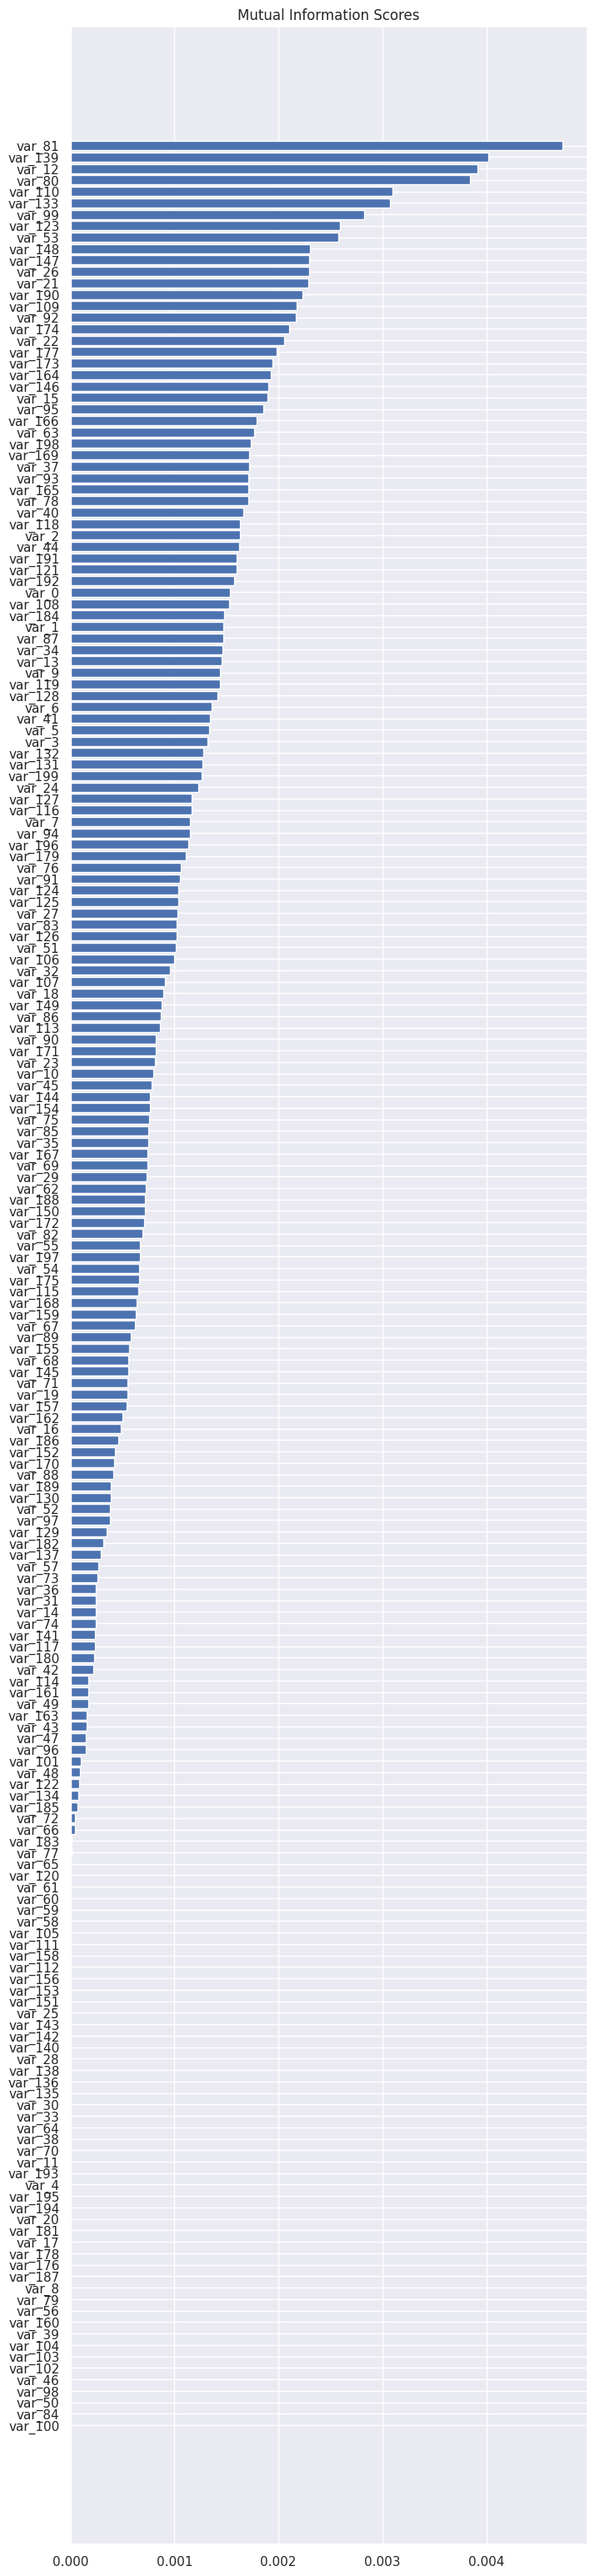

In [167]:
plt.figure(dpi=100, figsize=(8,40))
plot_mi_scores(mi_scores)

- targetとの相互特徴量は最大でも0.004を超える程度で、強い相関がある、とはいいにくい

- 新たな特徴量作成の手がかりとするため、特徴量同士の相関関係を見てみる

In [168]:
corr_var = train[vares].corr().abs()

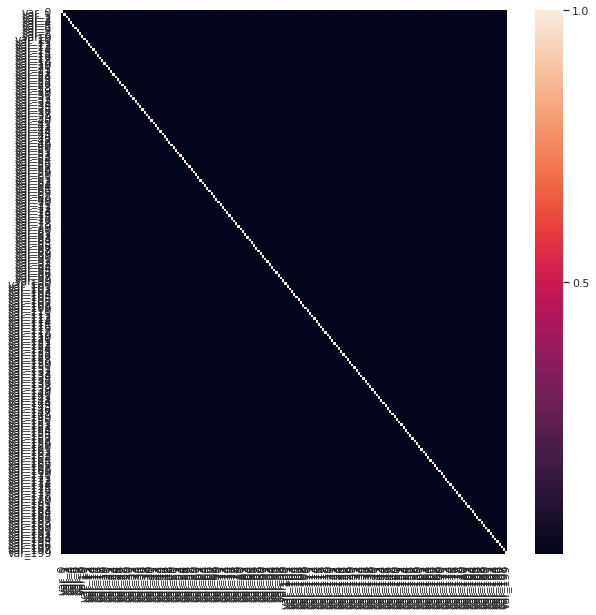

In [169]:
sns.heatmap(corr_var, xticklabels=corr_var.columns.values, yticklabels=corr_var.columns.values)
sns.set(rc={'figure.figsize':(300,300)}, font_scale=10)
# plt.tight_layout()
plt.show()

- 特徴量同士の相関はほぼない

ベースモデルの作成
- 線形的な関係が見込まれないため、決定木系のアルゴリズムを中心に検討

In [170]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import roc_auc_score, log_loss
import time
import tqdm

In [171]:
#訓練データの分割、テストデータの作成
X_train = train[vares]
y_train = train['target']
y_test = test[vares]
test_id = test.pop('ID_code')

In [172]:
X_train.shape, y_train.shape, y_test.shape, test_id.shape

((200000, 200), (200000,), (200000, 200), (200000,))

In [32]:
#検証用の関数
def cv_auc(X_train, y_train, model, n_splits):
    scores_logloss = []
    auc_score = []
    mean_los = 0
    mean_auc = 0
    i = 1
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    for tr_idx, va_idx in tqdm.tqdm(kf.split(X_train)):
        tr_X, va_X = X_train.iloc[tr_idx], X_train.iloc[va_idx]
        tr_y, va_y = y_train.iloc[tr_idx], y_train.iloc[va_idx]
        print('分割完了')
        mdl = model
        mdl.fit(tr_X, tr_y)
        print('モデルフィット完了')
        
        va_pred = mdl.predict_proba(va_X)[:, 1]
        logloss = log_loss(va_y, va_pred)
        scores_logloss.append(logloss)
        auc = roc_auc_score(va_y, va_pred)
        auc_score.append(auc)
        print(str(i)+'回目終了')
        i + 1
    mean_loss = np.mean(scores_logloss)
    mean_auc = np.mean(auc_score)
    return print(f'mean_logloss:{mean_loss:.4f}, mean_auc{mean_auc:.4f}')
    

In [33]:
#2値分類のためランダムフォレストを試す
%time
rf_result = cv_auc(X_train=X_train, y_train=y_train, model=RandomForestClassifier(n_estimators=150, max_leaf_nodes=5, min_samples_leaf=10), n_splits=4)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs


0it [00:00, ?it/s]

分割完了
モデルフィット完了


1it [02:20, 140.79s/it]

1回目終了
分割完了
モデルフィット完了


2it [04:41, 140.77s/it]

1回目終了
分割完了
モデルフィット完了


3it [07:03, 141.48s/it]

1回目終了
分割完了
モデルフィット完了


4it [09:25, 141.42s/it]

1回目終了
mean_logloss:0.3134, mean_auc0.7630


In [34]:
#勾配ブｰスティングを試す
%time
rf_result = cv_auc(X_train=X_train, y_train=y_train, model=GradientBoostingClassifier(n_estimators=150, max_leaf_nodes=5, min_samples_leaf=10), n_splits=4)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs


0it [00:00, ?it/s]

分割完了
モデルフィット完了


1it [30:22, 1822.33s/it]

1回目終了
分割完了
モデルフィット完了


2it [1:00:47, 1824.12s/it]

1回目終了
分割完了
モデルフィット完了


3it [1:30:53, 1815.75s/it]

1回目終了
分割完了
モデルフィット完了


4it [2:01:42, 1825.73s/it]

1回目終了
mean_logloss:0.2590, mean_auc0.8455


In [36]:
#xgboostを試す
kf = KFold(n_splits=4, shuffle=True, random_state=0)
for tr_idx, va_idx in kf.split(X_train):
    tr_x, va_x = X_train.iloc[tr_idx], X_train.iloc[va_idx]
    tr_y, va_y = y_train.iloc[tr_idx], y_train.iloc[va_idx]
    
    dtrain = xgb.DMatrix(tr_x, label=tr_y)
    dvalid = xgb.DMatrix(va_x, label=va_y)
    # dtest = xgb.DMatrix(tmp_test)
    
    params = {'objective':'binary:logistic', 'learning_rate':0.01, 'random_state':0, 'eval_metric':'logloss'}
    num_round = 500
    
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    model = xgb.train(params, dtrain, num_round, evals=watchlist, early_stopping_rounds=1800)
    
    va_pred = model.predict(dvalid, ntree_limit=model.best_ntree_limit)
    score = log_loss(va_y, va_pred)
    auc = roc_auc_score(va_y, va_pred)
    print(f'logloss: {score:.4f} auc: {auc:.4f}')

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	train-logloss:0.68656	eval-logloss:0.68670
[1]	train-logloss:0.68016	eval-logloss:0.68030
[2]	train-logloss:0.67390	eval-logloss:0.67408
[3]	train-logloss:0.66760	eval-logloss:0.66799
[4]	train-logloss:0.66152	eval-logloss:0.66198
[5]	train-logloss:0.65555	eval-logloss:0.65611
[6]	train-logloss:0.64974	eval-logloss:0.65036
[7]	train-logloss:0.64408	eval-logloss:0.64467
[8]	train-logloss:0.63849	eval-logloss:0.63915
[9]	train-logloss:0.63304	eval-logloss:0.63373
[10]	train-logloss:0.62759	eval-logloss:0.62833
[11]	train-logloss:0.62220	eval-logloss:0.62312
[12]	train-logloss:0.61712	eval-logloss:0.61796
[13]	train-logloss:0.61189	eval-logloss:0.61291
[14]	train-logloss:0.60693	eval-logloss:0.60795
[15]	train-logloss:0.60194	eval-logloss:0.60313
[16]	train-logloss:0.59718	eval-logloss:0.59831
[17]	train-logloss:0.59230	eval-logloss:0.59365
[18]	train-logloss:0.58761	eval-logloss:0.58904
[19]	train-logloss:0.58309	eval-logloss:0.58452
[20]	train-logloss:0.57861	eval-logloss:0.58003
[2

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


logloss: 0.2777 auc: 0.8314


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	train-logloss:0.68651	eval-logloss:0.68666
[1]	train-logloss:0.68018	eval-logloss:0.68023
[2]	train-logloss:0.67397	eval-logloss:0.67400
[3]	train-logloss:0.66792	eval-logloss:0.66785
[4]	train-logloss:0.66160	eval-logloss:0.66179
[5]	train-logloss:0.65573	eval-logloss:0.65595
[6]	train-logloss:0.64995	eval-logloss:0.65015
[7]	train-logloss:0.64419	eval-logloss:0.64444
[8]	train-logloss:0.63876	eval-logloss:0.63891
[9]	train-logloss:0.63317	eval-logloss:0.63348
[10]	train-logloss:0.62774	eval-logloss:0.62809
[11]	train-logloss:0.62248	eval-logloss:0.62281
[12]	train-logloss:0.61740	eval-logloss:0.61767
[13]	train-logloss:0.61210	eval-logloss:0.61264
[14]	train-logloss:0.60713	eval-logloss:0.60763
[15]	train-logloss:0.60223	eval-logloss:0.60272
[16]	train-logloss:0.59745	eval-logloss:0.59793
[17]	train-logloss:0.59268	eval-logloss:0.59320
[18]	train-logloss:0.58794	eval-logloss:0.58856
[19]	train-logloss:0.58334	eval-logloss:0.58405
[20]	train-logloss:0.57888	eval-logloss:0.57953
[2

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


logloss: 0.2740 auc: 0.8256


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	train-logloss:0.68637	eval-logloss:0.68669
[1]	train-logloss:0.68012	eval-logloss:0.68034
[2]	train-logloss:0.67397	eval-logloss:0.67414
[3]	train-logloss:0.66777	eval-logloss:0.66799
[4]	train-logloss:0.66173	eval-logloss:0.66192
[5]	train-logloss:0.65583	eval-logloss:0.65607
[6]	train-logloss:0.64997	eval-logloss:0.65029
[7]	train-logloss:0.64418	eval-logloss:0.64472
[8]	train-logloss:0.63861	eval-logloss:0.63911
[9]	train-logloss:0.63303	eval-logloss:0.63367
[10]	train-logloss:0.62757	eval-logloss:0.62835
[11]	train-logloss:0.62237	eval-logloss:0.62316
[12]	train-logloss:0.61710	eval-logloss:0.61795
[13]	train-logloss:0.61207	eval-logloss:0.61292
[14]	train-logloss:0.60698	eval-logloss:0.60796
[15]	train-logloss:0.60206	eval-logloss:0.60307
[16]	train-logloss:0.59711	eval-logloss:0.59834
[17]	train-logloss:0.59247	eval-logloss:0.59364
[18]	train-logloss:0.58778	eval-logloss:0.58902
[19]	train-logloss:0.58312	eval-logloss:0.58450
[20]	train-logloss:0.57865	eval-logloss:0.58002
[2

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


logloss: 0.2766 auc: 0.8277


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	train-logloss:0.68642	eval-logloss:0.68666
[1]	train-logloss:0.68015	eval-logloss:0.68023
[2]	train-logloss:0.67408	eval-logloss:0.67401
[3]	train-logloss:0.66787	eval-logloss:0.66784
[4]	train-logloss:0.66160	eval-logloss:0.66188
[5]	train-logloss:0.65577	eval-logloss:0.65601
[6]	train-logloss:0.64997	eval-logloss:0.65022
[7]	train-logloss:0.64421	eval-logloss:0.64451
[8]	train-logloss:0.63878	eval-logloss:0.63897
[9]	train-logloss:0.63334	eval-logloss:0.63341
[10]	train-logloss:0.62777	eval-logloss:0.62812
[11]	train-logloss:0.62249	eval-logloss:0.62284
[12]	train-logloss:0.61744	eval-logloss:0.61768
[13]	train-logloss:0.61223	eval-logloss:0.61254
[14]	train-logloss:0.60734	eval-logloss:0.60761
[15]	train-logloss:0.60229	eval-logloss:0.60271
[16]	train-logloss:0.59747	eval-logloss:0.59786
[17]	train-logloss:0.59289	eval-logloss:0.59315
[18]	train-logloss:0.58820	eval-logloss:0.58850
[19]	train-logloss:0.58353	eval-logloss:0.58396
[20]	train-logloss:0.57898	eval-logloss:0.57950
[2

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


logloss: 0.2715 auc: 0.8345


In [37]:
#lightbgmを試す
kf = KFold(n_splits=4, shuffle=True, random_state=0)
for tr_idx, va_idx in kf.split(X_train):
    tr_x, va_x = X_train.iloc[tr_idx], X_train.iloc[va_idx]
    tr_y, va_y = y_train.iloc[tr_idx], y_train.iloc[va_idx]
    
    lgb_train = lgb.Dataset(tr_x, tr_y)
    lgb_eval = lgb.Dataset(va_x, va_y)
    
    params = {'objective': 'binary', 'seed': 0, 'verbose': 0, 'metrics': 'binary_logloss'}
    num_round = 500
    
    model = lgb.train(params, lgb_train, num_boost_round=num_round,
                      valid_names=['train','valid'], valid_sets=[lgb_train, lgb_eval])
    va_pred = model.predict(va_x)
    score = log_loss(va_y, va_pred)
    auc = roc_auc_score(va_y, va_pred)
    print(f'logloss: {score:.4f} auc: {auc:.4f}')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.181601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	train's binary_logloss: 0.320606	valid's binary_logloss: 0.325383
[2]	train's binary_logloss: 0.316893	valid's binary_logloss: 0.322026
[3]	train's binary_logloss: 0.313507	valid's binary_logloss: 0.319088
[4]	train's binary_logloss: 0.310424	valid's binary_logloss: 0.316459
[5]	train's binary_logloss: 0.307506	valid's binary_logloss: 0.314053
[6]	train's binary_logloss: 0.304862	valid's binary_logloss: 0.31202
[7]	train's binary_logloss: 0.302217	valid's binary_logloss: 0.309871
[8]	train's binary_logloss: 0.299723	valid's binary_logloss: 0.307862
[9]	train's binary_logloss: 0.297234	valid's binary_logloss: 0.305865
[10]	train's binary_logloss: 0.294961	valid's binary_logloss: 0.304085
[11]	train's binary_logloss: 0.292872	valid's binary_logloss: 0.302481
[12]	train's binary_logloss: 0.290915	valid's binary_logloss: 0.

- モデルの相対比較
- RandomForestClassifierは速度速いが、精度低い(auc_score低く、submitスコア低い)
- GradientBoostingClassifierは速度遅く、精度低い(auc_score高いが、submitスコア低い、学習不足か)
- xgboostは速度遅いが、精度高い
- lightgbmは速度速く、精度高い→lightgbmを採用する
- モデル精度向上のため、特徴量の追加を行う

特徴量エンジニアリング
- 統計量の追加
- クラスタリング

In [173]:
#統計量追加用のデータ作成
tmp = pd.concat([X_train, y_test])

In [174]:
tmp.head()

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200   
1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468   
2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193   
3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609   
4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654   

    var_9  ...  var_190  var_191  var_192  var_193    var_194  var_195  \
0  5.7470  ...   4.4354   3.9642   3.1364   1.6910  18.522699  -2.3978   
1  8.0851  ...   7.6421   7.7214   2.5837  10.9516  15.430500   2.0339   
2  5.9525  ...   2.9057   9.7905   1.6704   1.6858  21.604200   3.1417   
3  8.2450  ...   4.4666   4.7433   0.7178   1.4214  23.034700  -1.2706   
4  7.6784  ...  -1.4905   9.5214  -0.1508   9.1942  13.287600  -1.5121   

   var_196  var_197    var_198  var_199  
0   7.8784   8.5635  12.780300  -1.0914  
1   8.1267   8.7889  18.356001   1.9518  
2  -6.5213   8.2675  14.722200   0.3965  
3  -2.9275  10.2922  17.969700  -8.9996  
4   3.9267   9.5031  17.997400  -8.8104  

[5 rows x 200 columns]

In [175]:
tmp.shape

(400000, 200)

In [176]:
tmp

var_0   var_1    var_2   var_3    var_4    var_5   var_6      var_7  \
0        8.9255 -6.7863  11.9081  5.0930  11.4607  -9.2834  5.1187  18.626600   
1       11.5006 -4.1473  13.8588  5.3890  12.3622   7.0433  5.6208  16.533800   
2        8.6093 -2.7457  12.0805  7.8928  10.5825  -9.0837  6.9427  14.615500   
3       11.0604 -2.1518   8.9522  7.1957  12.5846  -1.8361  5.8428  14.925000   
4        9.8369 -1.4834  12.8746  6.6375  12.2772   2.4486  5.9405  19.251400   
...         ...     ...      ...     ...      ...      ...     ...        ...   
199995  13.1678  1.0136  10.4333  6.7997   8.5974  -4.1641  4.8579  14.762500   
199996   9.7171 -9.1462   7.3443  9.1421  12.8936   3.0191  5.6888  18.886200   
199997  11.6360  2.2769  11.2074  7.7649  12.6796  11.3224  5.3883  18.379400   
199998  13.5745 -0.5134  13.6584  7.4855  11.2241 -11.3037  4.1959  16.827999   
199999  10.4664  1.8070  10.2277  6.0654  10.0258   1.0789  4.8879  14.489200   

         var_8   var_9  ...  var_190  var_191  var_192  var_193    var_194  \
0      -4.9200  5.7470  ...   4.4354   3.9642   3.1364   1.6910  18.522699   
1       3.1468  8.0851  ...   7.6421   7.7214   2.5837  10.9516  15.430500   
2      -4.9193  5.9525  ...   2.9057   9.7905   1.6704   1.6858  21.604200   
3      -5.8609  8.2450  ...   4.4666   4.7433   0.7178   1.4214  23.034700   
4       6.2654  7.6784  ...  -1.4905   9.5214  -0.1508   9.1942  13.287600   
...        ...     ...  ...      ...      ...      ...      ...        ...   
199995 -2.7239  6.9937  ...   2.0544   9.6849   4.6734  -1.3660  12.872100   
199996  5.0915  6.3545  ...   5.0071   6.6548   1.8197   2.4104  18.903700   
199997  1.6603  5.7341  ...   5.1536   2.6498   2.4937  -0.0637  20.060900   
199998  5.3208  8.9032  ...   3.4259   8.5012   2.2713   5.7621  17.005600   
199999 -0.5902  7.8362  ...   0.1398   9.2828   1.3601   4.8985  20.092600   

        var_195  var_196  var_197    var_198    var_199  
0       -2.3978   7.8784   8.5635  12.780300  -1.091400  
1        2.0339   8.1267   8.7889  18.356001   1.951800  
2        3.1417  -6.5213   8.2675  14.722200   0.396500  
3       -1.2706  -2.9275  10.2922  17.969700  -8.999600  
4       -1.5121   3.9267   9.5031  17.997400  -8.810400  
...         ...      ...      ...        ...        ...  
199995   1.2013  -4.6195   9.1568  18.210199   4.880100  
199996  -0.9337   2.9995   9.1112  18.174000 -20.768900  
199997  -1.1742  -4.1524   9.1933  11.790500 -22.276199  
199998   1.1763  -2.3761   8.1079   8.773500  -0.212200  
199999  -1.3048  -2.5981  10.3378  14.334000  -7.709400  

[400000 rows x 200 columns]

In [177]:
#統計量の追加
#targetを除き、レコードごとに「平均、標準偏差、最大値、最小値、合計値、尖度、歪度、中央値」を計算する
#ヒストグラムの形状は訓練データとテストデータでそれぞれおおよそ同じだが、差があるものを何らかの意味があると仮定し、歪度と尖度を考慮する

statics = pd.DataFrame()
for i in tqdm.tqdm(range(0, tmp.shape[0])):
    statics.loc[i, 'mean'] = tmp.iloc[i, :].mean()
    statics.loc[i, 'std'] = tmp.iloc[i, :].std()
    statics.loc[i, 'max'] = tmp.iloc[i, :].max()
    statics.loc[i, 'min'] = tmp.iloc[i, :].min()
    statics.loc[i, 'sum'] = tmp.iloc[i, :].sum()
    statics.loc[i, 'skew'] = tmp.iloc[i, :].skew()
    statics.loc[i, 'kurt'] = tmp.iloc[i, :].kurtosis()
    statics.loc[i, 'med'] = tmp.iloc[i, :].median()

100%|██████████| 400000/400000 [1:19:58<00:00, 83.36it/s]


In [180]:
statics

mean        std        max        min          sum      skew  \
0       7.281590   9.331540  43.112701 -21.449400  1456.318115  0.101580   
1       7.076818  10.336129  40.563202 -47.379700  1415.363525 -0.351734   
2       6.204483   8.753386  33.882000 -22.403799  1240.896606 -0.056957   
3       6.441160   9.594064  38.101501 -35.165901  1288.231934 -0.480116   
4       6.771155  11.287122  41.103699 -65.486298  1354.230957 -1.463426   
...          ...        ...        ...        ...          ...       ...   
399995  7.296561   9.737439  35.324600 -32.688301  1459.312256 -0.350197   
399996  6.413305  10.149714  41.188801 -48.344601  1282.661011 -0.856926   
399997  6.284328   9.672846  45.703602 -22.276199  1256.865723 -0.041529   
399998  6.396548   9.718346  35.001900 -40.050999  1279.309692 -0.627442   
399999  6.537965   9.873420  31.447599 -24.705601  1307.593018 -0.285032   

            kurt      med  
0       1.331023  6.77040  
1       4.110215  7.22315  
2       0.546438  5.89940  
3       2.630499  6.70260  
4       9.787399  6.94735  
...          ...      ...  
399995  2.124364  6.96660  
399996  4.773714  6.39060  
399997  1.682290  6.76620  
399998  2.886006  6.89120  
399999  1.117718  6.12130  

[400000 rows x 8 columns]

10it [00:05,  1.95it/s]


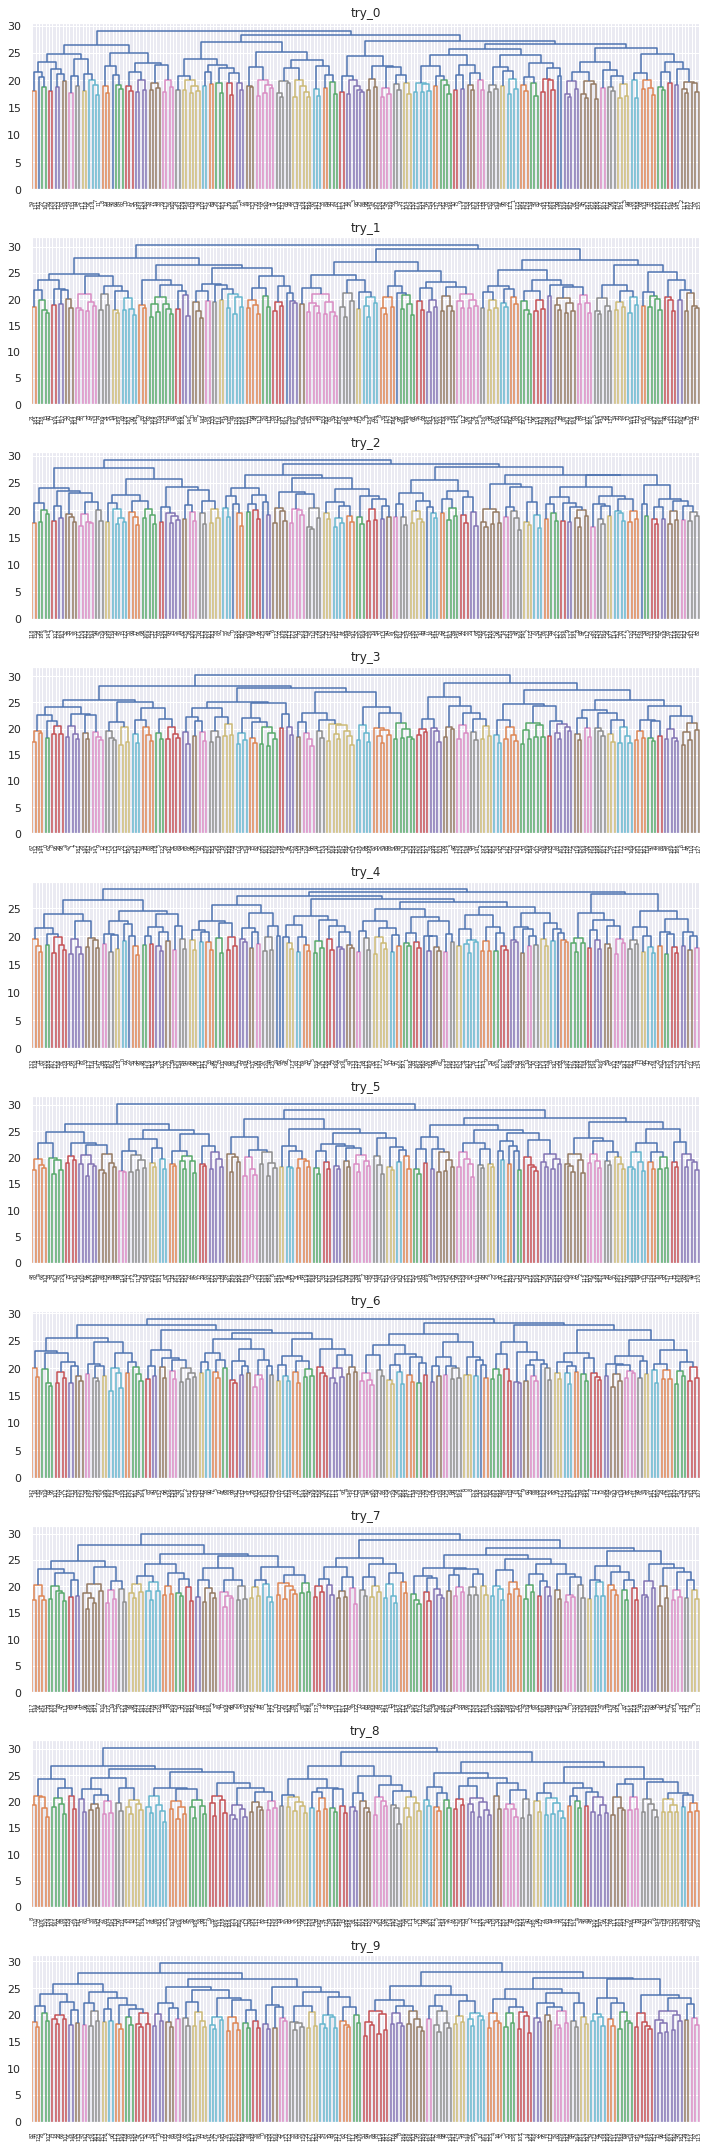

In [181]:
#デンドログラムを描く
#ランダム200個ずつ抽出し、都度デンドログラム作成
#200レコード×10回抽出
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

fig, axes = plt.subplots(10, 1, figsize=(10, 30))
sns.set(font_scale=1)

for i ,ax in tqdm.tqdm(enumerate(axes.ravel())):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_scaled = scaler.transform(X_train.sample(n=200))
    result = linkage(X_scaled, method='ward')
    dendrogram(result, ax=ax)
    ax.set_title('try_'+str(i))
    
plt.tight_layout()
plt.show()

In [182]:
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

#t=3.1~3.5あたりで区切るとよいか
cluster_num = []

for i in range(0,1000):
    scalaer = StandardScaler()
    scaler.fit(X_train)
    X_scaled = scaler.transform(X_train.sample(n=200))
    result = linkage(X_scaled, method='ward')
    c_num = []
    for t in np.arange(3.1, 3.6, 0.1):
        c_num.append(len(np.unique(fcluster(result, t=t, criterion='distance'))))
        #c_num.append({'{:.1f}'.format(t):len(np.unique(fcluster(result, t=t, criterion='distance')))})
    cluster_num.append(c_num)

t=3.1~3.5での階層クラスタリング数、レコード200×1000回ランダム抽出


100%|██████████| 5/5 [00:00<00:00, 57.08it/s]


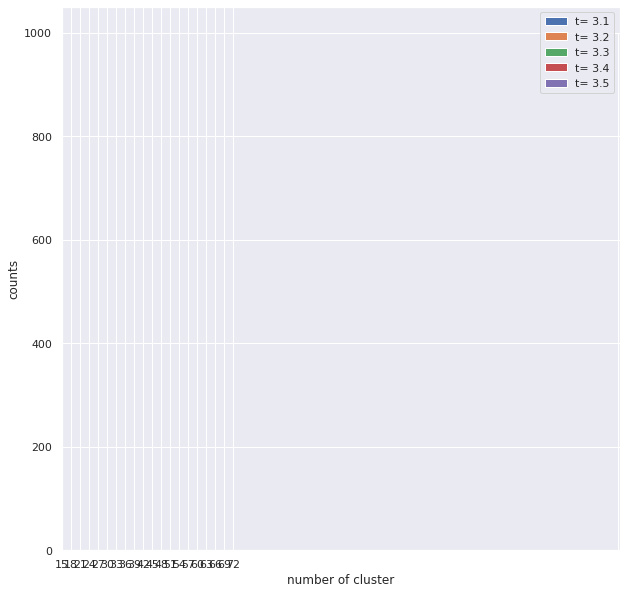

In [183]:
#200レコード×ランダム1000回抽出(ランダムなので毎回結果変わる)
#おおよそ、3.1～3.4まででクラスタ数は10個ずつ減少
print('t=3.1~3.5での階層クラスタリング数、レコード200×1000回ランダム抽出')

sns.set(rc={'figure.figsize':(10,10)},font_scale=1)
for i in tqdm.tqdm(range(0, 5)):
    num = []
    for n in range(0, 1000):
        num.append(cluster_num[n][i])
    plt.hist(num, label='t= 3.'+str(i+1))
    plt.xlabel('number of cluster')
    plt.ylabel('counts')
    plt.xticks(np.arange(15, 75, 3))
    plt.legend()

In [ ]:
# #訓練データとテストデータのデータ傾向が似ているため、訓練・テストデータ両方を結合した形で処理をする
# #デンドログラムから、クラスタt=3.3で試す(クラスタ数が相対的に少ないため)
# from scipy.cluster.hierarchy import linkage, fcluster
# from sklearn.preprocessing import MinMaxScaler

# statics = pd.DataFrame()
# scaler = MinMaxScaler()
# scaler.fit(tmp)
# tmp_scaled = scaler.transform(tmp)
# tm_result = linkage(tmp_scaled, method='ward')
# # statics['cluster'] = fcluster(tm_result, t=3.3, criterion='distance')

- 階層的クラスタリングを行ったが、メモリの都合で計算できない
- デンドログラムのクラスタt=3.3を参考に、クラスタ数33でk-means法により計算する

In [184]:
# #k-meansによるクラスタリングを行う
# #訓練データとテストデータのデータ傾向が似ているため、訓練・テストデータ両方を結合した形で処理をする
# #デンドログラムから、クラスタ数33で試す(クラスタ数が相対的に少ないため)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

kmeans = KMeans(n_clusters=33, max_iter=200, verbose=1)
scaler = StandardScaler()
tmp_scaled = scaler.fit_transform(tmp)

statics['cluster'] = kmeans.fit_predict(tmp_scaled)


Initialization complete
Iteration 0, inertia 126946944.0
Iteration 1, inertia 78301376.0
Iteration 2, inertia 78198632.0
Iteration 3, inertia 78179600.0
Iteration 4, inertia 78168704.0
Iteration 5, inertia 78159504.0
Iteration 6, inertia 78151712.0
Iteration 7, inertia 78145328.0
Iteration 8, inertia 78139568.0
Iteration 9, inertia 78134240.0
Iteration 10, inertia 78129040.0
Iteration 11, inertia 78124920.0
Iteration 12, inertia 78121240.0
Iteration 13, inertia 78117624.0
Iteration 14, inertia 78114304.0
Iteration 15, inertia 78111136.0
Iteration 16, inertia 78108336.0
Iteration 17, inertia 78105856.0
Iteration 18, inertia 78103616.0
Iteration 19, inertia 78101688.0
Iteration 20, inertia 78099640.0
Iteration 21, inertia 78097872.0
Iteration 22, inertia 78096248.0
Iteration 23, inertia 78094720.0
Iteration 24, inertia 78093264.0
Iteration 25, inertia 78092224.0
Iteration 26, inertia 78091024.0
Iteration 27, inertia 78089920.0
Iteration 28, inertia 78088920.0
Iteration 29, inertia 780876

In [185]:
statics

mean        std        max        min          sum      skew  \
0       7.281590   9.331540  43.112701 -21.449400  1456.318115  0.101580   
1       7.076818  10.336129  40.563202 -47.379700  1415.363525 -0.351734   
2       6.204483   8.753386  33.882000 -22.403799  1240.896606 -0.056957   
3       6.441160   9.594064  38.101501 -35.165901  1288.231934 -0.480116   
4       6.771155  11.287122  41.103699 -65.486298  1354.230957 -1.463426   
...          ...        ...        ...        ...          ...       ...   
399995  7.296561   9.737439  35.324600 -32.688301  1459.312256 -0.350197   
399996  6.413305  10.149714  41.188801 -48.344601  1282.661011 -0.856926   
399997  6.284328   9.672846  45.703602 -22.276199  1256.865723 -0.041529   
399998  6.396548   9.718346  35.001900 -40.050999  1279.309692 -0.627442   
399999  6.537965   9.873420  31.447599 -24.705601  1307.593018 -0.285032   

            kurt      med  cluster  
0       1.331023  6.77040       29  
1       4.110215  7.22315       14  
2       0.546438  5.89940       30  
3       2.630499  6.70260       21  
4       9.787399  6.94735       26  
...          ...      ...      ...  
399995  2.124364  6.96660       28  
399996  4.773714  6.39060        8  
399997  1.682290  6.76620       30  
399998  2.886006  6.89120       32  
399999  1.117718  6.12130       31  

[400000 rows x 9 columns]

In [186]:
tmp[['mean', 'std', 'max', 'min', 'sum', 'skew', 'kurt', 'med', 'cluster']] =  statics

In [187]:
tmp

var_0   var_1    var_2   var_3    var_4    var_5   var_6      var_7  \
0        8.9255 -6.7863  11.9081  5.0930  11.4607  -9.2834  5.1187  18.626600   
1       11.5006 -4.1473  13.8588  5.3890  12.3622   7.0433  5.6208  16.533800   
2        8.6093 -2.7457  12.0805  7.8928  10.5825  -9.0837  6.9427  14.615500   
3       11.0604 -2.1518   8.9522  7.1957  12.5846  -1.8361  5.8428  14.925000   
4        9.8369 -1.4834  12.8746  6.6375  12.2772   2.4486  5.9405  19.251400   
...         ...     ...      ...     ...      ...      ...     ...        ...   
199995  13.1678  1.0136  10.4333  6.7997   8.5974  -4.1641  4.8579  14.762500   
199996   9.7171 -9.1462   7.3443  9.1421  12.8936   3.0191  5.6888  18.886200   
199997  11.6360  2.2769  11.2074  7.7649  12.6796  11.3224  5.3883  18.379400   
199998  13.5745 -0.5134  13.6584  7.4855  11.2241 -11.3037  4.1959  16.827999   
199999  10.4664  1.8070  10.2277  6.0654  10.0258   1.0789  4.8879  14.489200   

         var_8   var_9  ...    var_199      mean        std        max  \
0      -4.9200  5.7470  ...  -1.091400  7.281590   9.331540  43.112701   
1       3.1468  8.0851  ...   1.951800  7.076818  10.336129  40.563202   
2      -4.9193  5.9525  ...   0.396500  6.204483   8.753386  33.882000   
3      -5.8609  8.2450  ...  -8.999600  6.441160   9.594064  38.101501   
4       6.2654  7.6784  ...  -8.810400  6.771155  11.287122  41.103699   
...        ...     ...  ...        ...       ...        ...        ...   
199995 -2.7239  6.9937  ...   4.880100  6.745413   9.568606  35.492298   
199996  5.0915  6.3545  ... -20.768900  6.753499  10.308091  38.810501   
199997  1.6603  5.7341  ... -22.276199  6.874692   9.821335  43.030701   
199998  5.3208  8.9032  ...  -0.212200  6.940878  10.989741  46.491501   
199999 -0.5902  7.8362  ...  -7.709400  6.798109   9.307795  33.430000   

              min          sum      skew      kurt      med  cluster  
0      -21.449400  1456.318115  0.101580  1.331023  6.77040       29  
1      -47.379700  1415.363525 -0.351734  4.110215  7.22315       14  
2      -22.403799  1240.896606 -0.056957  0.546438  5.89940       30  
3      -35.165901  1288.231934 -0.480116  2.630499  6.70260       21  
4      -65.486298  1354.230957 -1.463426  9.787399  6.94735       26  
...           ...          ...       ...       ...      ...      ...  
199995 -23.606400  1349.082520 -0.048360  0.815615  6.41060       19  
199996 -39.640598  1350.699707 -0.553757  2.620481  6.57875       15  
199997 -49.500702  1374.938354 -0.750798  5.837305  6.40910        4  
199998 -42.970402  1388.175659 -0.175745  3.526916  6.69070       32  
199999 -25.993299  1359.621704 -0.109657  1.189765  7.11685       10  

[400000 rows x 209 columns]

In [87]:
X_train.values

array([[  8.9255,  -6.7863,  11.9081, ...,   8.5635,  12.7803,  -1.0914],
       [ 11.5006,  -4.1473,  13.8588, ...,   8.7889,  18.356 ,   1.9518],
       [  8.6093,  -2.7457,  12.0805, ...,   8.2675,  14.7222,   0.3965],
       ...,
       [ 11.2232,  -5.0518,  10.5127, ...,   8.7155,  13.8329,   4.1995],
       [  9.7148,  -8.6098,  13.6104, ...,  10.0342,  15.5289, -13.9001],
       [ 10.8762,  -5.7105,  12.1183, ...,   8.1857,  12.1284,   0.1385]],
      dtype=float32)

In [90]:
train

ID_code  target    var_0   var_1    var_2   var_3    var_4  \
0            train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607   
1            train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622   
2            train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825   
3            train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846   
4            train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772   
...              ...     ...      ...     ...      ...     ...      ...   
199995  train_199995       0  11.4880 -0.4956   8.2622  3.5142  10.3404   
199996  train_199996       0   4.9149 -2.4484  16.7052  6.6345   8.3096   
199997  train_199997       0  11.2232 -5.0518  10.5127  5.6456   9.3410   
199998  train_199998       0   9.7148 -8.6098  13.6104  5.7930  12.5173   
199999  train_199999       0  10.8762 -5.7105  12.1183  8.0328  11.5577   

          var_5   var_6    var_7  ...  var_190  var_191  var_192  var_193  \
0       -9.2834  5.1187  18.6266  ...   4.4354   3.9642   3.1364   1.6910   
1        7.0433  5.6208  16.5338  ...   7.6421   7.7214   2.5837  10.9516   
2       -9.0837  6.9427  14.6155  ...   2.9057   9.7905   1.6704   1.6858   
3       -1.8361  5.8428  14.9250  ...   4.4666   4.7433   0.7178   1.4214   
4        2.4486  5.9405  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942   
...         ...     ...      ...  ...      ...      ...      ...      ...   
199995  11.6081  5.6709  15.1516  ...   6.1415  13.2305   3.9901   0.9388   
199996 -10.5628  5.8802  21.5940  ...   4.9611   4.6549   0.6998   1.8341   
199997  -5.4086  4.5555  21.5571  ...   4.0651   5.4414   3.1032   4.8793   
199998   0.5339  6.0479  17.0152  ...   2.6840   8.6587   2.7337  11.1178   
199999   0.3488  5.2839  15.2058  ...   8.9842   1.6893   0.1276   0.3766   

          var_194  var_195  var_196  var_197    var_198  var_199  
0       18.522699  -2.3978   7.8784   8.5635  12.780300  -1.0914  
1       15.430500   2.0339   8.1267   8.7889  18.356001   1.9518  
2       21.604200   3.1417  -6.5213   8.2675  14.722200   0.3965  
3       23.034700  -1.2706  -2.9275  10.2922  17.969700  -8.9996  
4       13.287600  -1.5121   3.9267   9.5031  17.997400  -8.8104  
...           ...      ...      ...      ...        ...      ...  
199995  18.024900  -1.7939   2.1661   8.5326  16.666000 -17.8661  
199996  22.271700   1.7337  -2.1651   6.7419  15.905400   0.3388  
199997  23.531099  -1.5736   1.2832   8.7155  13.832900   4.1995  
199998  20.415800  -0.0786   6.7980  10.0342  15.528900 -13.9001  
199999  15.210100  -2.4907  -2.2342   8.1857  12.128400   0.1385  

[200000 rows x 202 columns]

In [91]:
test

var_0   var_1    var_2   var_3    var_4    var_5   var_6    var_7  \
0        8.9255 -6.7863  11.9081  5.0930  11.4607  -9.2834  5.1187  18.6266   
1       11.5006 -4.1473  13.8588  5.3890  12.3622   7.0433  5.6208  16.5338   
2        8.6093 -2.7457  12.0805  7.8928  10.5825  -9.0837  6.9427  14.6155   
3       11.0604 -2.1518   8.9522  7.1957  12.5846  -1.8361  5.8428  14.9250   
4        9.8369 -1.4834  12.8746  6.6375  12.2772   2.4486  5.9405  19.2514   
...         ...     ...      ...     ...      ...      ...     ...      ...   
199995  11.4880 -0.4956   8.2622  3.5142  10.3404  11.6081  5.6709  15.1516   
199996   4.9149 -2.4484  16.7052  6.6345   8.3096 -10.5628  5.8802  21.5940   
199997  11.2232 -5.0518  10.5127  5.6456   9.3410  -5.4086  4.5555  21.5571   
199998   9.7148 -8.6098  13.6104  5.7930  12.5173   0.5339  6.0479  17.0152   
199999  10.8762 -5.7105  12.1183  8.0328  11.5577   0.3488  5.2839  15.2058   

         var_8   var_9  ...  var_190  var_191  var_192  var_193    var_194  \
0      -4.9200  5.7470  ...   4.4354   3.9642   3.1364   1.6910  18.522699   
1       3.1468  8.0851  ...   7.6421   7.7214   2.5837  10.9516  15.430500   
2      -4.9193  5.9525  ...   2.9057   9.7905   1.6704   1.6858  21.604200   
3      -5.8609  8.2450  ...   4.4666   4.7433   0.7178   1.4214  23.034700   
4       6.2654  7.6784  ...  -1.4905   9.5214  -0.1508   9.1942  13.287600   
...        ...     ...  ...      ...      ...      ...      ...        ...   
199995 -0.6209  5.6669  ...   6.1415  13.2305   3.9901   0.9388  18.024900   
199996 -3.6797  6.0019  ...   4.9611   4.6549   0.6998   1.8341  22.271700   
199997  0.1202  6.1629  ...   4.0651   5.4414   3.1032   4.8793  23.531099   
199998 -2.1926  8.7542  ...   2.6840   8.6587   2.7337  11.1178  20.415800   
199999 -0.4541  9.3688  ...   8.9842   1.6893   0.1276   0.3766  15.210100   

        var_195  var_196  var_197    var_198  var_199  
0       -2.3978   7.8784   8.5635  12.780300  -1.0914  
1        2.0339   8.1267   8.7889  18.356001   1.9518  
2        3.1417  -6.5213   8.2675  14.722200   0.3965  
3       -1.2706  -2.9275  10.2922  17.969700  -8.9996  
4       -1.5121   3.9267   9.5031  17.997400  -8.8104  
...         ...      ...      ...        ...      ...  
199995  -1.7939   2.1661   8.5326  16.666000 -17.8661  
199996   1.7337  -2.1651   6.7419  15.905400   0.3388  
199997  -1.5736   1.2832   8.7155  13.832900   4.1995  
199998  -0.0786   6.7980  10.0342  15.528900 -13.9001  
199999  -2.4907  -2.2342   8.1857  12.128400   0.1385  

[200000 rows x 200 columns]

In [88]:
y_test

var_0   var_1    var_2   var_3    var_4    var_5   var_6    var_7  \
0        8.9255 -6.7863  11.9081  5.0930  11.4607  -9.2834  5.1187  18.6266   
1       11.5006 -4.1473  13.8588  5.3890  12.3622   7.0433  5.6208  16.5338   
2        8.6093 -2.7457  12.0805  7.8928  10.5825  -9.0837  6.9427  14.6155   
3       11.0604 -2.1518   8.9522  7.1957  12.5846  -1.8361  5.8428  14.9250   
4        9.8369 -1.4834  12.8746  6.6375  12.2772   2.4486  5.9405  19.2514   
...         ...     ...      ...     ...      ...      ...     ...      ...   
199995  11.4880 -0.4956   8.2622  3.5142  10.3404  11.6081  5.6709  15.1516   
199996   4.9149 -2.4484  16.7052  6.6345   8.3096 -10.5628  5.8802  21.5940   
199997  11.2232 -5.0518  10.5127  5.6456   9.3410  -5.4086  4.5555  21.5571   
199998   9.7148 -8.6098  13.6104  5.7930  12.5173   0.5339  6.0479  17.0152   
199999  10.8762 -5.7105  12.1183  8.0328  11.5577   0.3488  5.2839  15.2058   

         var_8   var_9  ...  var_190  var_191  var_192  var_193    var_194  \
0      -4.9200  5.7470  ...   4.4354   3.9642   3.1364   1.6910  18.522699   
1       3.1468  8.0851  ...   7.6421   7.7214   2.5837  10.9516  15.430500   
2      -4.9193  5.9525  ...   2.9057   9.7905   1.6704   1.6858  21.604200   
3      -5.8609  8.2450  ...   4.4666   4.7433   0.7178   1.4214  23.034700   
4       6.2654  7.6784  ...  -1.4905   9.5214  -0.1508   9.1942  13.287600   
...        ...     ...  ...      ...      ...      ...      ...        ...   
199995 -0.6209  5.6669  ...   6.1415  13.2305   3.9901   0.9388  18.024900   
199996 -3.6797  6.0019  ...   4.9611   4.6549   0.6998   1.8341  22.271700   
199997  0.1202  6.1629  ...   4.0651   5.4414   3.1032   4.8793  23.531099   
199998 -2.1926  8.7542  ...   2.6840   8.6587   2.7337  11.1178  20.415800   
199999 -0.4541  9.3688  ...   8.9842   1.6893   0.1276   0.3766  15.210100   

        var_195  var_196  var_197    var_198  var_199  
0       -2.3978   7.8784   8.5635  12.780300  -1.0914  
1        2.0339   8.1267   8.7889  18.356001   1.9518  
2        3.1417  -6.5213   8.2675  14.722200   0.3965  
3       -1.2706  -2.9275  10.2922  17.969700  -8.9996  
4       -1.5121   3.9267   9.5031  17.997400  -8.8104  
...         ...      ...      ...        ...      ...  
199995  -1.7939   2.1661   8.5326  16.666000 -17.8661  
199996   1.7337  -2.1651   6.7419  15.905400   0.3388  
199997  -1.5736   1.2832   8.7155  13.832900   4.1995  
199998  -0.0786   6.7980  10.0342  15.528900 -13.9001  
199999  -2.4907  -2.2342   8.1857  12.128400   0.1385  

[200000 rows x 200 columns]

In [89]:
test

var_0   var_1    var_2   var_3    var_4    var_5   var_6    var_7  \
0        8.9255 -6.7863  11.9081  5.0930  11.4607  -9.2834  5.1187  18.6266   
1       11.5006 -4.1473  13.8588  5.3890  12.3622   7.0433  5.6208  16.5338   
2        8.6093 -2.7457  12.0805  7.8928  10.5825  -9.0837  6.9427  14.6155   
3       11.0604 -2.1518   8.9522  7.1957  12.5846  -1.8361  5.8428  14.9250   
4        9.8369 -1.4834  12.8746  6.6375  12.2772   2.4486  5.9405  19.2514   
...         ...     ...      ...     ...      ...      ...     ...      ...   
199995  11.4880 -0.4956   8.2622  3.5142  10.3404  11.6081  5.6709  15.1516   
199996   4.9149 -2.4484  16.7052  6.6345   8.3096 -10.5628  5.8802  21.5940   
199997  11.2232 -5.0518  10.5127  5.6456   9.3410  -5.4086  4.5555  21.5571   
199998   9.7148 -8.6098  13.6104  5.7930  12.5173   0.5339  6.0479  17.0152   
199999  10.8762 -5.7105  12.1183  8.0328  11.5577   0.3488  5.2839  15.2058   

         var_8   var_9  ...  var_190  var_191  var_192  var_193    var_194  \
0      -4.9200  5.7470  ...   4.4354   3.9642   3.1364   1.6910  18.522699   
1       3.1468  8.0851  ...   7.6421   7.7214   2.5837  10.9516  15.430500   
2      -4.9193  5.9525  ...   2.9057   9.7905   1.6704   1.6858  21.604200   
3      -5.8609  8.2450  ...   4.4666   4.7433   0.7178   1.4214  23.034700   
4       6.2654  7.6784  ...  -1.4905   9.5214  -0.1508   9.1942  13.287600   
...        ...     ...  ...      ...      ...      ...      ...        ...   
199995 -0.6209  5.6669  ...   6.1415  13.2305   3.9901   0.9388  18.024900   
199996 -3.6797  6.0019  ...   4.9611   4.6549   0.6998   1.8341  22.271700   
199997  0.1202  6.1629  ...   4.0651   5.4414   3.1032   4.8793  23.531099   
199998 -2.1926  8.7542  ...   2.6840   8.6587   2.7337  11.1178  20.415800   
199999 -0.4541  9.3688  ...   8.9842   1.6893   0.1276   0.3766  15.210100   

        var_195  var_196  var_197    var_198  var_199  
0       -2.3978   7.8784   8.5635  12.780300  -1.0914  
1        2.0339   8.1267   8.7889  18.356001   1.9518  
2        3.1417  -6.5213   8.2675  14.722200   0.3965  
3       -1.2706  -2.9275  10.2922  17.969700  -8.9996  
4       -1.5121   3.9267   9.5031  17.997400  -8.8104  
...         ...      ...      ...        ...      ...  
199995  -1.7939   2.1661   8.5326  16.666000 -17.8661  
199996   1.7337  -2.1651   6.7419  15.905400   0.3388  
199997  -1.5736   1.2832   8.7155  13.832900   4.1995  
199998  -0.0786   6.7980  10.0342  15.528900 -13.9001  
199999  -2.4907  -2.2342   8.1857  12.128400   0.1385  

[200000 rows x 200 columns]

In [47]:
# tmp.to_csv('tmp.csv', index=False)

In [188]:
#訓練データとテストデータの分割
tmp_train = tmp[:len(X_train)]
tmp_test = tmp[len(X_train):]

In [189]:
tmp_train.shape, tmp_test.shape

((200000, 209), (200000, 209))

In [ ]:
# #xgboostの精度を確認
# #繰り返し回数を2000に増やし、精度向上を狙う
# %time
# kf = KFold(n_splits=4, shuffle=True, random_state=0)
# for tr_idx, va_idx in kf.split(tmp_train):
#     tr_x, va_x = tmp_train.iloc[tr_idx], tmp_train.iloc[va_idx]
#     tr_y, va_y = y_train.iloc[tr_idx], y_train.iloc[va_idx]
    
#     dtrain = xgb.DMatrix(tr_x, label=tr_y)
#     dvalid = xgb.DMatrix(va_x, label=va_y)
#     # dtest = xgb.DMatrix(tmp_test)
    
#     params = {'objective':'binary:logistic', 'learning_rate':0.01, 'random_state':0, 'eval_metric':'logloss'}
#     num_round = 2000
    
#     watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
#     model = xgb.train(params, dtrain, num_round, evals=watchlist, early_stopping_rounds=1800)
    
#     va_pred = model.predict(dvalid, ntree_limit=model.best_ntree_limit)
#     score = log_loss(va_y, va_pred)
#     auc = roc_auc_score(va_y, va_pred)
#     print(f'logloss: {score:.4f} auc: {auc:.4f}')

In [197]:
#lightgbmの精度を確認
%time
scores = []
aucs = []
pred_lgbs = []
kf = KFold(n_splits=4, shuffle=True, random_state=0)
for tr_idx, va_idx in kf.split(tmp_train):
    tr_x, va_x = tmp_train.iloc[tr_idx], tmp_train.iloc[va_idx]
    tr_y, va_y = y_train.iloc[tr_idx], y_train.iloc[va_idx]
    
    lgb_train = lgb.Dataset(tr_x, tr_y)
    lgb_eval = lgb.Dataset(va_x, va_y)
    
    params = {'objective': 'binary', 'seed': 0, 'verbose': 0, 'metrics': 'binary_logloss'}
    num_round = 4000
    
    model = lgb.train(params, lgb_train, num_boost_round=num_round,
                      valid_names=['train','valid'], valid_sets=[lgb_train, lgb_eval])
    va_pred = model.predict(va_x)
    score = log_loss(va_y, va_pred)
    scores.append(score)
    auc = roc_auc_score(va_y, va_pred)
    aucs.append(auc)
    print(f'logloss: {score:.4f} auc: {auc:.4f}')
    pred_lgb = model.predict(tmp_test)
    pred_lgbs.append(pred_lgb)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.200143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	train's binary_logloss: 0.3131	valid's binary_logloss: 0.318198
[2]	train's binary_logloss: 0.305725	valid's binary_logloss: 0.311346
[3]	train's binary_logloss: 0.300209	valid's binary_logloss: 0.306474
[4]	train's binary_logloss: 0.295824	valid's binary_logloss: 0.302609
[5]	train's binary_logloss: 0.292244	valid's binary_logloss: 0.299524
[6]	train's binary_logloss: 0.289089	valid's binary_logloss: 0.296757
[7]	train's binary_logloss: 0.286428	valid's binary_logloss: 0.294474
[8]	train's binary_logloss: 0.28399	valid's binary_logloss: 0.29244
[9]	train's binary_logloss: 0.281847	valid's binary_logloss: 0.290748
[10]	train's binary_logloss: 0.279772	valid's binary_logloss: 0.289178
[11]	train's binary_logloss: 0.277808	valid's binary_logloss: 0.287698
[12

In [198]:
pred_lgbs

[array([4.79753786e-03, 8.91610766e-02, 5.01849034e-03, ...,
        6.48748137e-05, 1.12995850e-02, 2.88743056e-03]),
 array([6.02895232e-02, 3.32692982e-02, 3.70064621e-02, ...,
        2.47908739e-05, 2.09415235e-03, 4.47027117e-03]),
 array([1.64911876e-02, 1.76566781e-01, 3.15671060e-02, ...,
        2.57822279e-05, 8.25899610e-03, 1.35920194e-03]),
 array([0.01081043, 0.06095047, 0.01119708, ..., 0.00013315, 0.00362966,
        0.0065714 ])]

In [199]:
#lightgbmのバリデーションの回数(4回)におけるテストデータ予測値を平均
lgb_prediction = pd.DataFrame()
for i, pred in enumerate(pred_lgbs):
    lgb_prediction['pred_'+str(i)] = pred

In [200]:
#lightgbmのバリデーションの回数(4回)におけるテストデータ予測値を平均
mean_pred_lgb = pd.DataFrame()
for i in tqdm.tqdm(range(0, lgb_prediction.shape[0])):
    mean_pred_lgb.loc[i,'target'] = lgb_prediction.loc[i, :].mean()

100%|██████████| 200000/200000 [11:59<00:00, 278.16it/s]


In [201]:
mean_pred_lgb

target
0       0.023097
1       0.089987
2       0.021197
3       0.025197
4       0.004291
...          ...
199995  0.000489
199996  0.000364
199997  0.000062
199998  0.006321
199999  0.003822

[200000 rows x 1 columns]

In [202]:
#モデル一つで出力
test_santander = mean_pred_lgb
df_model = pd.concat([test_id, test_santander], axis=1)
df_model.to_csv('submission.csv', index=False)

In [196]:
df_model

ID_code    target
0            test_0  0.056357
1            test_1  0.218010
2            test_2  0.172079
3            test_3  0.078649
4            test_4  0.026096
...             ...       ...
199995  test_199995  0.013546
199996  test_199996  0.005810
199997  test_199997  0.002567
199998  test_199998  0.068672
199999  test_199999  0.027698

[200000 rows x 2 columns]